In [1]:
from matplotlib import pyplot as plt
from random import random
import numpy as np
from datetime import date
import pandas as pd
from scipy.stats import ttest_rel
from matplotlib.gridspec import GridSpec
from analysis import *
plt.rcParams.update({'pdf.fonttype': 'truetype'})

In [2]:
datasets = ['titanic','tic-tac-toe','iris','breast_cancer','load_wine',
            'IBM_HR', 'telco_churn', 'GenderRecognition',
             'banknote', 'liver', 'magic', 'adult', 'digits5',
            'insurance','make_friedman1','make_friedman2','make_friedman3',
            'wage', 'Demographics','gdp','used_cars','load_diabetes',
            'boston',
            'world_happiness_indicator',  'who_life_expectancy', 'mobile_prices', 'suicide_rates_cleaned','videogamesales',
            'red_wine_quality',
            'covid_vic','covid', 'bicycle','ships','smoking'
           ]
dataset_names = ['titanic','tic-tac-toe','iris','breast','wine',
            'IBM HR', 'telco', 'gender',
            'banknote', 'liver', 'magic', 'adult', 'digits5',
            'insurance','friedman1','friedman2',
                 'friedman3','wage', 'demog.','gdp','used cars','diabetes',
            'boston','happiness', 'life expect.', 'mobile', 'suicide','videogame',
             'red wine',
            'covid vic','covid', 'bicycle','ships','smoking']
#             'covid_vic','bicycle','smoking']
algo_names = ['mwg_boosting_',
    'gpe_boosting_', 
    'xgb_keep_', 
    'orth_fc_Newton-CG',# 'orth_fc_Newton-CG*']
             ]
cols=[10, 10, 10, 5,6, 
        3, 4, 4, 
       10, 10, 5, 5, 3,
        10, 4,10, 10, 
      10,
       2, 20, 10, 5, 4, 10, 5, 4, 3, 3,
       5,
        10, 10, 10,10, 10,
     ]
max_comp=50
repeats=[0]*34
def all_risks(datasets, algo_names):
    train_risks={}
    test_risks={}
    for i in range(len(datasets)):
#         print(datasets[i])
        train_risks[datasets[i]]={}
        test_risks[datasets[i]]={}
        for algo in algo_names:
            train, test,_=get_all_risks(datasets[i], algo, col=cols[i], 
                                        location='../experiment_output_greedy' if algo=='orth_fc_Newton-CG*' else '../experiment_output_20231226varreg_new',
                                        max_length=50, repeat=5,
                                       max_components=max_comp+1)
            print(datasets[i], algo, len(set(train[0])))
            train_risks[datasets[i]][algo]=train/get_max_risk(datasets[i])
            test_risks[datasets[i]][algo]=test/get_max_risk(datasets[i])
    return train_risks, test_risks

all_risks(datasets, algo_names)

[0.82043111 0.7265736  0.68636457 0.66732695 0.65117278 0.64432791
 0.63903566 0.60569354 0.60145789 0.59939135 0.59541599 0.59293323
 0.5918736  0.58211406 0.58060996] [0.86723376 0.7530386  0.72954692 0.70317232 0.68918194 0.67118747
 0.66902677 0.65983685 0.64241565 0.65123602 0.64510673 0.63839758
 0.64148436 0.64031045 0.63747692] [ 2.  5.  8. 11. 15. 17. 21. 24. 30. 30. 35. 39. 41. 47. 51.]
[0.82043111 0.7265736  0.68636457 0.66732695 0.65117278 0.64432791
 0.63903566 0.60569354 0.60145789 0.59939135 0.59541599 0.59293323
 0.5918736  0.58211406 0.58060996]
[0.86723376 0.7530386  0.72954692 0.70317232 0.68918194 0.67118747
 0.66902677 0.65983685 0.64241565 0.65123602 0.64510673 0.63839758
 0.64148436 0.64031045 0.63747692]
titanic mwg_boosting_ 15
[0.78684961 0.63360868 0.59910738 0.58950948 0.61047291 0.59796808
 0.58044656 0.57679121 0.59156833 0.5599049  0.5906173  0.58717021
 0.57970211 0.57443492 0.56947336] [0.82129459 0.68367607 0.67164257 0.663743   0.66205105 0.65687191
 

[9.35080525e+08 7.99623865e+08 7.29467678e+08 7.17022992e+08
 6.99673084e+08 6.66910738e+08 6.63765824e+08 6.54999936e+08
 6.48513917e+08 6.35962267e+08 6.78048170e+08 6.73204119e+08
 6.72220716e+08 6.71262697e+08 6.69754101e+08 6.69405414e+08]
wage mwg_boosting_ 16
[9.86832435e+08 8.34192347e+08 7.55518933e+08 6.83466993e+08
 6.72339432e+08 6.58744315e+08 6.51259309e+08 6.18208897e+08
 6.15327818e+08 5.85352773e+08 5.83460354e+08] [9.35374236e+08 9.18019108e+08 8.44392764e+08 7.60990983e+08
 7.48550608e+08 7.36243026e+08 7.43312242e+08 8.15241972e+08
 7.81362824e+08 7.54964123e+08 7.54964123e+08] [ 1.  7. 10. 15. 18. 22. 28. 38. 40. 47.]
[9.86832435e+08 8.34192347e+08 7.55518933e+08 6.83466993e+08
 6.72339432e+08 6.58744315e+08 6.51259309e+08 6.18208897e+08
 6.15327818e+08 5.85352773e+08 5.83460354e+08]
[9.35374236e+08 9.18019108e+08 8.44392764e+08 7.60990983e+08
 7.48550608e+08 7.36243026e+08 7.43312242e+08 8.15241972e+08
 7.81362824e+08 7.54964123e+08 7.54964123e+08]
wage gpe_boosti

[362.13148872 304.06691911 275.26747039 267.93087081 265.74869131
 265.30598345 265.24982719 265.22855906 265.22078896 265.2161926
 265.21317796 265.21198256 265.21096176 265.2098981  265.20920953
 265.20881588 265.2085155  265.20840093 265.20839435] [349.10450085 292.96730166 263.31143935 256.85316426 255.32828179
 254.89313131 255.15652191 255.32809979 255.3408795  255.32216748
 255.29512587 255.2955892  255.29369191 255.29329387 255.29200868
 255.28999482 255.29001445 255.29044199 255.29057804] [ 1.  4.  6.  9. 11. 13. 17. 20. 23. 27. 30. 32. 35. 37. 40. 42. 44. 47.]
[362.13148872 304.06691911 275.26747039 267.93087081 265.74869131
 265.30598345 265.24982719 265.22855906 265.22078896 265.2161926
 265.21317796 265.21198256 265.21096176 265.2098981  265.20920953
 265.20881588 265.2085155  265.20840093 265.20839435]
[349.10450085 292.96730166 263.31143935 256.85316426 255.32828179
 254.89313131 255.15652191 255.32809979 255.3408795  255.32216748
 255.29512587 255.2955892  255.29369191 

({'titanic': {'mwg_boosting_': array([[1.        , 0.96606652, 0.82043111, 0.82043111, 0.82043111,
           0.7265736 , 0.7265736 , 0.7265736 , 0.68636457, 0.68636457,
           0.68636457, 0.66732695, 0.66732695, 0.66732695, 0.66732695,
           0.65117278, 0.65117278, 0.64432791, 0.64432791, 0.64432791,
           0.64432791, 0.63903566, 0.63903566, 0.63903566, 0.60569354,
           0.60569354, 0.60569354, 0.60569354, 0.60569354, 0.60569354,
           0.59939135, 0.59939135, 0.59939135, 0.59939135, 0.59939135,
           0.59541599, 0.59541599, 0.59541599, 0.59541599, 0.59293323,
           0.59293323, 0.5918736 , 0.5918736 , 0.5918736 , 0.5918736 ,
           0.5918736 , 0.5918736 , 0.58211406, 0.58211406, 0.58211406,
           0.58211406]]),
   'gpe_boosting_': array([[1.        , 0.96606652, 0.96606652, 0.96606652, 0.96606652,
           0.78684961, 0.78684961, 0.78684961, 0.63360868, 0.63360868,
           0.63360868, 0.63360868, 0.59910738, 0.59910738, 0.59910738,
      

In [3]:
comps_algo={}
for algo in algo_names:
    comps_algo[algo]={'comps':[], 'rules':[], 'comp_rule':[]}
    for dataset in datasets:
        for repeat in range(5):
            comps, rules=get_components_from_file(dataset, algo, repeat=repeat, col=cols[datasets.index(dataset)], 
                                                  location='../experiment_output_greedy' 
                                                  if algo=='orth_fc_Newton-CG*'
                                                  else '../experiment_output_20231226varreg_new',)
            print(algo, repeat, dataset, comps, rules)
            if len(comps)>0:
                num_comps=comps[-1]
                print(dataset, algo, repeat, num_comps, rules, num_comps/rules)
#                 if num_comps<40:
#                     continue
                comps_algo[algo]['comps'].append(num_comps)
                comps_algo[algo]['rules'].append(rules)
                comps_algo[algo]['comp_rule'].append(num_comps/rules)
comps_algo

mwg_boosting_ 0 titanic [ 2.  5.  8. 11. 15. 17. 21. 24. 30. 30. 35. 39. 41. 47. 51. 57. 58. 65.
 67. 73. 73. 73. 73. 73. 73. 73. 73. 73. 73. 73.] 29
titanic mwg_boosting_ 0 73.0 29 2.5172413793103448
mwg_boosting_ 1 titanic [ 2.  5.  8. 12. 16. 18. 22. 24. 30. 33. 38. 42. 44. 57.] 13
titanic mwg_boosting_ 1 57.0 13 4.384615384615385
mwg_boosting_ 2 titanic [ 2.  6.  9. 13. 16. 20. 24. 28. 33. 37. 41. 43. 48. 56.] 13
titanic mwg_boosting_ 2 56.0 13 4.3076923076923075
mwg_boosting_ 3 titanic [ 2.  5.  8. 13. 17. 20. 24. 27. 31. 34. 40. 43. 47. 49. 53.] 14
titanic mwg_boosting_ 3 53.0 14 3.7857142857142856
mwg_boosting_ 4 titanic [ 2.  5.  8. 11. 15. 18. 24. 27. 29. 32. 36. 39. 43. 46. 50.] 14
titanic mwg_boosting_ 4 50.0 14 3.5714285714285716
mwg_boosting_ 0 tic-tac-toe [ 2.  4.  8. 10. 14. 18. 20. 24. 27. 29. 34. 34. 36. 38. 42. 45. 47. 52.]The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
 17
tic-tac-toe

mwg_boosting_ 1 load_diabetes [ 1.  4.  6.  9. 12. 15. 17. 20. 23. 25. 29. 34. 36. 35. 38. 43. 45. 49.
 53.] 18
load_diabetes mwg_boosting_ 1 53.0 18 2.9444444444444446
mwg_boosting_ 2 load_diabetes [ 1.  3.  5.  7.  9. 11. 14. 16. 19. 22. 26. 28. 31. 33. 37. 43. 47. 50.] 17
load_diabetes mwg_boosting_ 2 50.0 17 2.9411764705882355
mwg_boosting_ 3 load_diabetes [ 1.  3.  6. 10. 12. 14. 16. 19. 22. 26. 29. 33. 35. 39. 43. 45. 49. 52.] 17
load_diabetes mwg_boosting_ 3 52.0 17 3.0588235294117645
mwg_boosting_ 4 load_diabetes [ 1.  4.  6.  7.  9. 14. 16. 18. 20. 22. 24. 27. 30. 34. 38. 42. 45. 49.
 52.] 18
load_diabetes mwg_boosting_ 4 52.0 18 2.888888888888889
mwg_boosting_ 0 boston [ 1.  4.  6.  8. 10. 14. 16. 20. 22. 25. 27. 31. 28. 36. 35. 38. 41. 49.
 51.] 18
boston mwg_boosting_ 0 51.0 18 2.8333333333333335
mwg_boosting_ 1 boston [ 1.  4.  5.  8. 10. 12. 16. 19. 21. 26. 27. 29. 30. 32. 40. 44. 46. 45.
 51.] 18
boston mwg_boosting_ 1 51.0 18 2.8333333333333335
mwg_boosting_ 2 boston [ 

gpe_boosting_ 0 liver [ 5.  9. 13. 17. 20. 25. 32. 39. 43. 50.] 9
liver gpe_boosting_ 0 50.0 9 5.555555555555555
gpe_boosting_ 1 liver [ 3.  8. 12. 19. 23. 29. 31. 37. 42. 48. 56.] 10
liver gpe_boosting_ 1 56.0 10 5.6
gpe_boosting_ 2 liver [ 3.  8. 13. 17. 22. 27. 33. 38. 44. 49. 54.] 10
liver gpe_boosting_ 2 54.0 10 5.4
gpe_boosting_ 3 liver [ 4.  7. 14. 18. 21. 29. 30. 34. 36. 41. 43. 50.] 11
liver gpe_boosting_ 3 50.0 11 4.545454545454546
gpe_boosting_ 4 liver [ 4.  8. 13. 17. 23. 29. 36. 40. 45. 48. 51.] 10
liver gpe_boosting_ 4 51.0 10 5.1
gpe_boosting_ 0 magic [ 2.  5.  8. 12. 17. 23. 27. 31. 35. 41. 45. 48. 55.] 12
magic gpe_boosting_ 0 55.0 12 4.583333333333333
gpe_boosting_ 1 magic [ 2.  5.  8. 12. 17. 23. 27. 31. 37. 42. 47. 49. 51.] 12
magic gpe_boosting_ 1 51.0 12 4.25
gpe_boosting_ 2 magic [ 2.  5.  9. 13. 16. 22. 27. 30. 32. 36. 43. 49. 56.] 12
magic gpe_boosting_ 2 56.0 12 4.666666666666667
gpe_boosting_ 3 magic [ 2.  5.  9. 13. 18. 25. 29. 34. 39. 39. 46. 48. 50.] 12
ma

xgb_keep_ 0 tic-tac-toe [ 2.  6. 10. 15. 19. 23. 27. 33. 37. 42. 47. 51.] 11
tic-tac-toe xgb_keep_ 0 51.0 11 4.636363636363637
xgb_keep_ 1 tic-tac-toe [ 2.  6. 10. 14. 20. 24. 28. 32. 37. 41. 44. 50.] 11
tic-tac-toe xgb_keep_ 1 50.0 11 4.545454545454546
xgb_keep_ 2 tic-tac-toe [ 2.  6. 10. 14. 19. 23. 27. 31. 35. 39. 43. 48. 52.] 12
tic-tac-toe xgb_keep_ 2 52.0 12 4.333333333333333
xgb_keep_ 3 tic-tac-toe [ 2.  6. 10. 14. 19. 23. 27. 31. 35. 39. 43. 47. 53.] 12
tic-tac-toe xgb_keep_ 3 53.0 12 4.416666666666667
xgb_keep_ 4 tic-tac-toe [ 2.  6. 10. 14. 18. 22. 25. 29. 33. 37. 41. 46. 52.] 12
tic-tac-toe xgb_keep_ 4 52.0 12 4.333333333333333
xgb_keep_ 0 iris [ 4.  9. 12. 15. 19. 21. 26. 31. 34. 36. 41. 47. 52.] 12
iris xgb_keep_ 0 52.0 12 4.333333333333333
xgb_keep_ 1 iris [ 2.  8. 10. 14. 19. 21. 24. 29. 34. 39. 42. 47. 50. 53.] 13
iris xgb_keep_ 1 53.0 13 4.076923076923077
xgb_keep_ 2 iris [ 3.  8. 10. 12. 16. 19. 23. 27. 30. 35. 37. 43. 47. 52.] 13
iris xgb_keep_ 2 52.0 13 4.0
xgb_keep

xgb_keep_ 1 suicide_rates_cleaned [ 2.  4.  7. 10. 12. 13. 15. 16. 18. 19. 22. 24. 26. 27. 30. 32. 35. 37.
 38. 40. 43. 46. 48. 49. 51.] 24
suicide_rates_cleaned xgb_keep_ 1 51.0 24 2.125
xgb_keep_ 2 suicide_rates_cleaned [ 2.  4.  7.  8. 10. 11. 14. 16. 18. 19. 22. 24. 27. 29.  0.] 14
suicide_rates_cleaned xgb_keep_ 2 0.0 14 0.0
xgb_keep_ 3 suicide_rates_cleaned [] 0
xgb_keep_ 4 suicide_rates_cleaned [] 0
xgb_keep_ 0 videogamesales [ 1.  3.  4.  6.  8. 10. 12. 15. 17. 18. 21. 23. 25. 28. 30. 32. 35. 37.
 39. 42. 44. 46. 49. 51.] 23
videogamesales xgb_keep_ 0 51.0 23 2.217391304347826
xgb_keep_ 1 videogamesales [] 0
xgb_keep_ 2 videogamesales [] 0
xgb_keep_ 3 videogamesales [] 0
xgb_keep_ 4 videogamesales [] 0
xgb_keep_ 0 red_wine_quality [ 1.  4.  6. 12. 16. 23. 27. 33. 41. 50. 49. 57.] 11
red_wine_quality xgb_keep_ 0 57.0 11 5.181818181818182
xgb_keep_ 1 red_wine_quality [] 0
xgb_keep_ 2 red_wine_quality [] 0
xgb_keep_ 3 red_wine_quality [] 0
xgb_keep_ 4 red_wine_quality [] 0
xgb_kee

orth_fc_Newton-CG 4 make_friedman3 [ 1.  4.  7. 11. 15. 20. 24. 30. 34. 42. 47. 50.] 11
make_friedman3 orth_fc_Newton-CG 4 50.0 11 4.545454545454546
orth_fc_Newton-CG 0 wage [ 1.  7. 11. 14. 19. 23. 28. 34. 37. 41. 47. 53.] 11
wage orth_fc_Newton-CG 0 53.0 11 4.818181818181818
orth_fc_Newton-CG 1 wage [ 1.  7. 10. 15. 21. 24. 29. 32. 37. 43. 49. 54.] 11
wage orth_fc_Newton-CG 1 54.0 11 4.909090909090909
orth_fc_Newton-CG 2 wage [ 1.  7. 10. 14. 20. 25. 29. 36. 42. 46. 52.] 10
wage orth_fc_Newton-CG 2 52.0 10 5.2
orth_fc_Newton-CG 3 wage [ 1.  6.  9. 14. 20. 25. 29. 35. 41. 46. 53.] 10
wage orth_fc_Newton-CG 3 53.0 10 5.3
orth_fc_Newton-CG 4 wage [ 1.  5. 11. 14. 21. 25. 28. 35. 42. 49. 53.] 10
wage orth_fc_Newton-CG 4 53.0 10 5.3
orth_fc_Newton-CG 0 Demographics [ 1.  3.  5.  7. 11. 13. 16. 19. 22. 26. 31. 35. 38. 41. 44. 47. 50.] 16
Demographics orth_fc_Newton-CG 0 50.0 16 3.125
orth_fc_Newton-CG 1 Demographics [ 1.  3.  5.  7. 11. 14. 17. 20. 24. 28. 31. 35. 37. 41. 44. 48. 52.] 16
D

{'mwg_boosting_': {'comps': [73.0,
   57.0,
   56.0,
   53.0,
   50.0,
   52.0,
   52.0,
   53.0,
   50.0,
   53.0,
   52.0,
   51.0,
   52.0,
   52.0,
   52.0,
   51.0,
   57.0,
   53.0,
   53.0,
   51.0,
   50.0,
   50.0,
   51.0,
   52.0,
   50.0,
   51.0,
   50.0,
   52.0,
   50.0,
   52.0,
   53.0,
   50.0,
   51.0,
   50.0,
   51.0,
   50.0,
   55.0,
   53.0,
   51.0,
   50.0,
   102.0,
   99.0,
   97.0,
   102.0,
   0.0,
   50.0,
   51.0,
   50.0,
   50.0,
   51.0,
   51.0,
   51.0,
   51.0,
   52.0,
   50.0,
   50.0,
   50.0,
   50.0,
   0.0,
   50.0,
   51.0,
   51.0,
   51.0,
   39.0,
   51.0,
   77.0,
   52.0,
   55.0,
   51.0,
   52.0,
   52.0,
   53.0,
   52.0,
   52.0,
   50.0,
   52.0,
   51.0,
   51.0,
   51.0,
   53.0,
   50.0,
   52.0,
   51.0,
   52.0,
   51.0,
   74.0,
   51.0,
   56.0,
   52.0,
   50.0,
   51.0,
   51.0,
   50.0,
   50.0,
   51.0,
   20.0,
   21.0,
   22.0,
   24.0,
   22.0,
   0.0,
   51.0,
   50.0,
   53.0,
   50.0,
   52.0,
   53.0,
   50.0,
   

In [4]:
for algo in algo_names:
    rules=comps_algo[algo]['rules']
    comps=comps_algo[algo]['comps']
    crs=comps_algo[algo]['comp_rule']
    print(algo, sum(rules)/len(rules), sum(comps)/sum(rules), sum(rules)/len(rules)* sum(comps)/sum(rules))

mwg_boosting_ 18.651898734177216 2.5446216491347133 47.4620253164557
gpe_boosting_ 14.728395061728396 3.268650461022632 48.14197530864198
xgb_keep_ 14.6 3.252568493150685 47.487500000000004
orth_fc_Newton-CG 12.860759493670885 3.7303149606299213 47.974683544303794


In [5]:
trains, tests = all_risks(datasets, algo_names)
today = date.today()
repeat=1
compare_test_file="../analysis_results/compare_test"+str(today)+"normal.csv"
compare_train_file="../analysis_results/compare_train"+str(today)+"normal.csv"
compare_test_log_file="../analysis_results/compare_test"+str(today)+"log.csv"
compare_train_log_file="../analysis_results/compare_train"+str(today)+"log.csv"
f = open(compare_test_file, 'w')
f2 = open(compare_train_file, 'w')
f3 = open(compare_test_log_file, 'w')
f4 = open(compare_train_log_file, 'w')
f.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,max_comp+2)]) for algo in algo_names])+'\n')
f2.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,max_comp+2)]) for algo in algo_names])+'\n')
f3.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,max_comp+2)]) for algo in algo_names])+'\n')
f4.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,max_comp+2)]) for algo in algo_names])+'\n')
for dataset in datasets:
    f.write(dataset+',')
    f2.write(dataset+',')
    f3.write(dataset+',')
    f4.write(dataset+',')
    for algo in algo_names:
        f.write(','.join([str(x) for x in tests[dataset][algo][0]])+',')
        f2.write(','.join([str(x) for x in trains[dataset][algo][0]])+',')
        f3.write(','.join([str(x) for x in np.log(tests[dataset][algo][0])])+',')
        f4.write(','.join([str(x) for x in np.log(trains[dataset][algo][0])])+',')
    f.write('\n')
    f2.write('\n')
    f3.write('\n')
    f4.write('\n')
f.close()
f2.close()
f3.close()
f4.close()
print('done')

[0.82043111 0.7265736  0.68636457 0.66732695 0.65117278 0.64432791
 0.63903566 0.60569354 0.60145789 0.59939135 0.59541599 0.59293323
 0.5918736  0.58211406 0.58060996] [0.86723376 0.7530386  0.72954692 0.70317232 0.68918194 0.67118747
 0.66902677 0.65983685 0.64241565 0.65123602 0.64510673 0.63839758
 0.64148436 0.64031045 0.63747692] [ 2.  5.  8. 11. 15. 17. 21. 24. 30. 30. 35. 39. 41. 47. 51.]
[0.82043111 0.7265736  0.68636457 0.66732695 0.65117278 0.64432791
 0.63903566 0.60569354 0.60145789 0.59939135 0.59541599 0.59293323
 0.5918736  0.58211406 0.58060996]
[0.86723376 0.7530386  0.72954692 0.70317232 0.68918194 0.67118747
 0.66902677 0.65983685 0.64241565 0.65123602 0.64510673 0.63839758
 0.64148436 0.64031045 0.63747692]
titanic mwg_boosting_ 15
[0.78684961 0.63360868 0.59910738 0.58950948 0.61047291 0.59796808
 0.58044656 0.57679121 0.59156833 0.5599049  0.5906173  0.58717021
 0.57970211 0.57443492 0.56947336] [0.82129459 0.68367607 0.67164257 0.663743   0.66205105 0.65687191
 

make_friedman1 gpe_boosting_ 18
[22.88413892 17.22582709 13.82138014 11.67600556 10.17804409  9.81638055
  9.51499884  9.1328424   8.98773446  8.76854732  8.56994374  8.372356  ] [23.74587856 19.65059311 15.07171734 12.44010822 10.50288693 10.68746804
 10.78297832 11.24185528 11.32701246 11.577843   11.63025433 11.62527683] [ 1.  4.  7. 10. 13. 20. 25. 34. 36. 42. 49.]
[22.88413892 17.22582709 13.82138014 11.67600556 10.17804409  9.81638055
  9.51499884  9.1328424   8.98773446  8.76854732  8.56994374  8.372356  ]
[23.74587856 19.65059311 15.07171734 12.44010822 10.50288693 10.68746804
 10.78297832 11.24185528 11.32701246 11.577843   11.63025433 11.62527683]
make_friedman1 xgb_keep_ 12
[22.87642864 15.34229323 13.16644355 11.25583338 10.16393594  9.72052295
  9.47358425  9.2030647   8.99909336  8.74032713  8.50681174] [23.71108118 17.90869359 14.54825053 11.60285873 10.44048226 10.56629397
 10.62738335 10.61716713 10.56108395 10.75268453 10.83176019] [ 1.  4.  7. 10. 13. 20. 28. 35. 42.

[9.86832435e+08 8.34192347e+08 7.55518933e+08 6.83466993e+08
 6.72339432e+08 6.58744315e+08 6.51259309e+08 6.18208897e+08
 6.15327818e+08 5.85352773e+08 5.83460354e+08] [9.35374236e+08 9.18019108e+08 8.44392764e+08 7.60990983e+08
 7.48550608e+08 7.36243026e+08 7.43312242e+08 8.15241972e+08
 7.81362824e+08 7.54964123e+08 7.54964123e+08] [ 1.  7. 10. 15. 18. 22. 28. 38. 40. 47.]
[9.86832435e+08 8.34192347e+08 7.55518933e+08 6.83466993e+08
 6.72339432e+08 6.58744315e+08 6.51259309e+08 6.18208897e+08
 6.15327818e+08 5.85352773e+08 5.83460354e+08]
[9.35374236e+08 9.18019108e+08 8.44392764e+08 7.60990983e+08
 7.48550608e+08 7.36243026e+08 7.43312242e+08 8.15241972e+08
 7.81362824e+08 7.54964123e+08 7.54964123e+08]
wage gpe_boosting_ 11
[9.86832435e+08 8.36466590e+08 7.53308125e+08 6.86531840e+08
 6.75394105e+08 6.52592080e+08 6.26841658e+08 6.18078724e+08
 6.15327799e+08 5.85352767e+08 5.83460349e+08] [9.35374234e+08 9.14770181e+08 8.53030601e+08 7.74598774e+08
 7.62230118e+08 7.75645866e+08

[13.77325485  8.83897437  5.71830285  1.59213681  2.27337863  1.97768732
  1.96683819  2.38387953  2.20872647  2.48098403  2.29198865  2.38561164
  2.3854105   2.41173645  2.56900662  2.84409215  2.87621597  2.89645352
  2.96124808  2.96124808  2.96124808  2.96124808  2.96124808  2.96124808
  2.96124808  2.96124808  2.96124808  2.96124808  2.96124808  2.96124808]
covid_vic orth_fc_Newton-CG 19
[543.58784241 444.84738449 378.98849279 356.10728628 347.35271995
 331.2560782  320.01933997 323.5644916  320.76896026 308.40624098
 306.05453828 305.87765428 300.9113695  300.4958382  299.12011535
 294.5345437  293.37195939] [759.39439439 594.36405659 511.64794921 491.44007785 486.67661163
 463.69977556 438.45314023 462.12028349 449.01823443 417.77141231
 407.25319836 426.22100525 392.16221327 394.12252528 401.51977449
 396.67440047 374.91315968] [ 2.  5.  8. 11. 14. 17. 21. 20. 23. 29. 33. 32. 40. 42. 45. 48.]
[543.58784241 444.84738449 378.98849279 356.10728628 347.35271995
 331.2560782  320.0

[1.96057873 1.02561665 1.21537766 0.50777879 0.67495277 0.77944796
 0.86977253 0.65836844 0.72359321 0.63794923 0.69131077 0.61229405
 0.68258127 0.634032   0.61608861 0.5437681  0.58499568 0.54963709
 0.58431383 0.5269665  0.52468179 0.56848119 0.47308875 0.53687831
 0.44785326 0.5336372 ]
smoking mwg_boosting_ 24
[2.35662263 1.37020089 1.2163837  1.03950631 0.80152114 0.68213529
 0.572973   0.50888833 0.460251   0.41406537 0.38384172 0.32127138
 0.30876232 0.28557279 0.25602335 0.23200949 0.20919854] [4.00512001 2.64221256 1.8339035  1.8339035  1.8339035  1.8339035
 1.59341688 1.62000804 1.62000804 1.35069016 1.35069016 1.2049078
 1.08920334 1.08920334 0.94090521 0.90885585 0.90885585] [ 2.  4.  7. 11. 15. 18. 20. 23. 26. 29. 33. 36. 39. 42. 46. 50.]
[2.35662263 1.37020089 1.2163837  1.03950631 0.80152114 0.68213529
 0.572973   0.50888833 0.460251   0.41406537 0.38384172 0.32127138
 0.30876232 0.28557279 0.25602335 0.23200949 0.20919854]
[4.00512001 2.64221256 1.8339035  1.8339035  1

In [6]:
# datasets = ['titanic','tic-tac-toe','iris','breast_cancer','load_wine',
#             'IBM_HR', 'telco_churn', 'GenderRecognition',
#             'banknote', 'liver', 'magic', 'adult', 'digits5',
#             'insurance','make_friedman1',
#             'make_friedman2','make_friedman3','wage', 'Demographics','gdp','used_cars','load_diabetes',
#             'boston','world_happiness_indicator', 'who_life_expectancy', 'mobile_prices', 'suicide_rates_cleaned','videogamesales',
#              'red_wine_quality',
#             'covid_vic','covid', 'bicycle','ships','smoking']
# dataset_names = ['titanic','tic-tac-toe','iris','breast','wine',
#             'IBM HR', 'telco', 'gender',
#             'banknote', 'liver', 'magic', 'adult', 'digits5',
#             'insurance','friedman1',
#             'friedman2','friedman3','wage', 'demog.','gdp','used cars','diabetes',
#             'boston','happiness', 'life expect.', 'mobile', 'suicide','videogame',
#              'red wine',
#             'covid vic','covid', 'bicycle','ships','smoking']
# #             'covid_vic','bicycle','smoking']
# algo_names = ['mwg_boosting_',
#     'gpe_boosting_', 
#     'xgb_keep_', 
#     'orth_fc_Newton-CG', 'orth_fc_Newton-CG*']

In [7]:
path = '../analysis_results/'
today=str(date.today())
tests_normal=pd.read_csv(path+'compare_test'+today+'normal.csv',index_col=False)
trains_normal=pd.read_csv(path+'compare_train'+today+'normal.csv',index_col=False)

In [8]:
train_datasets={}
test_datasets={}
max_comp=50
j=-1
for dataset in datasets:
    j+=1
    train_datasets[dataset]={}
    test_datasets[dataset]={}
    for algo in algo_names:
#         print(algo)
        if j==j:
            train_datasets[dataset][algo]=[(trains_normal[[algo+str(i) for i in range(1, max_comp)]].iloc[j])]
            test_datasets[dataset][algo]=[(tests_normal[[algo+str(i) for i in range(1, max_comp)]].iloc[j])]
        else:
            train_datasets[dataset][algo].append(trains_normal[[algo+str(i) for i in range(1, max_comp)]].iloc[j])
            test_datasets[dataset][algo].append(tests_normal[[algo+str(i) for i in range(1, max_comp)]].iloc[j])

In [9]:
trains, tests = all_risks(datasets, algo_names)
today = date.today()
compare_test_file="../analysis_results/compare_test"+str(today)+"normal.csv"
compare_train_file="../analysis_results/compare_train"+str(today)+"normal.csv"
compare_test_log_file="../analysis_results/compare_test"+str(today)+"log.csv"
compare_train_log_file="../analysis_results/compare_train"+str(today)+"log.csv"
f = open(compare_test_file, 'w')
f2 = open(compare_train_file, 'w')
f3 = open(compare_test_log_file, 'w')
f4 = open(compare_train_log_file, 'w')
f.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,max_comp+2)]) for algo in algo_names])+'\n')
f2.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,max_comp+2)]) for algo in algo_names])+'\n')
f3.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,max_comp+2)]) for algo in algo_names])+'\n')
f4.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,max_comp+2)]) for algo in algo_names])+'\n')
for dataset in datasets:
    f.write(dataset+',')
    f2.write(dataset+',')
    f3.write(dataset+',')
    f4.write(dataset+',')
    for algo in algo_names:
        f.write(','.join([str(x) for x in tests[dataset][algo][0]])+',')
        f2.write(','.join([str(x) for x in trains[dataset][algo][0]])+',')
        f3.write(','.join([str(x) for x in np.log(tests[dataset][algo][0])])+',')
        f4.write(','.join([str(x) for x in np.log(trains[dataset][algo][0])])+',')
    f.write('\n')
    f2.write('\n')
    f3.write('\n')
    f4.write('\n')
f.close()
f2.close()
f3.close()
f4.close()
print('done')

[0.82043111 0.7265736  0.68636457 0.66732695 0.65117278 0.64432791
 0.63903566 0.60569354 0.60145789 0.59939135 0.59541599 0.59293323
 0.5918736  0.58211406 0.58060996] [0.86723376 0.7530386  0.72954692 0.70317232 0.68918194 0.67118747
 0.66902677 0.65983685 0.64241565 0.65123602 0.64510673 0.63839758
 0.64148436 0.64031045 0.63747692] [ 2.  5.  8. 11. 15. 17. 21. 24. 30. 30. 35. 39. 41. 47. 51.]
[0.82043111 0.7265736  0.68636457 0.66732695 0.65117278 0.64432791
 0.63903566 0.60569354 0.60145789 0.59939135 0.59541599 0.59293323
 0.5918736  0.58211406 0.58060996]
[0.86723376 0.7530386  0.72954692 0.70317232 0.68918194 0.67118747
 0.66902677 0.65983685 0.64241565 0.65123602 0.64510673 0.63839758
 0.64148436 0.64031045 0.63747692]
titanic mwg_boosting_ 15
[0.78684961 0.63360868 0.59910738 0.58950948 0.61047291 0.59796808
 0.58044656 0.57679121 0.59156833 0.5599049  0.5906173  0.58717021
 0.57970211 0.57443492 0.56947336] [0.82129459 0.68367607 0.67164257 0.663743   0.66205105 0.65687191
 

[0.10382196 0.09001074 0.06179004 0.05564093 0.05239063 0.05080688
 0.05013279 0.04797926 0.04753439 0.04676401 0.04219932 0.04458835
 0.04431324 0.04264222 0.04211419 0.04123862 0.04072158 0.04022976]
make_friedman3 mwg_boosting_ 17
[0.09655586 0.05988148 0.04780468 0.04236628 0.03976997 0.03786404
 0.03735718 0.03594895 0.03581767 0.03475508 0.03465625 0.03455458
 0.03002219 0.02953243] [0.10382196 0.0688357  0.055678   0.05061146 0.04856219 0.04547892
 0.04569094 0.04375619 0.04380815 0.04283951 0.04295017 0.04262105
 0.04023027 0.03960958] [ 1.  5.  8. 11. 14. 16. 18. 22. 24. 28. 30. 32. 46.]
[0.09655586 0.05988148 0.04780468 0.04236628 0.03976997 0.03786404
 0.03735718 0.03594895 0.03581767 0.03475508 0.03465625 0.03455458
 0.03002219 0.02953243]
[0.10382196 0.0688357  0.055678   0.05061146 0.04856219 0.04547892
 0.04569094 0.04375619 0.04380815 0.04283951 0.04295017 0.04262105
 0.04023027 0.03960958]
make_friedman3 gpe_boosting_ 14
[0.09655586 0.05988158 0.04775985 0.04236629 0.0

covid_vic gpe_boosting_ 17
[48.76656071 14.69319008  8.84230694  6.31538487  4.60865239  3.61430304
  3.46757288  3.11669254  2.75424313  2.50379045  2.35772112  2.25829932
  2.18986557  2.09817391  2.0459997   2.00667925  1.94312827] [49.31094898 13.57356584  8.39582002  7.48068318  7.53370807  2.02312885
  2.9175396   3.30702557  3.31368116  2.91874333  2.44639207  2.08518318
  2.31472587  2.16061632  2.16061632  1.98942474  2.18894509] [ 2.  3.  6. 10. 11. 13. 15. 19. 21. 23. 31. 34. 39. 42. 45. 49.]
[48.76656071 14.69319008  8.84230694  6.31538487  4.60865239  3.61430304
  3.46757288  3.11669254  2.75424313  2.50379045  2.35772112  2.25829932
  2.18986557  2.09817391  2.0459997   2.00667925  1.94312827]
[49.31094898 13.57356584  8.39582002  7.48068318  7.53370807  2.02312885
  2.9175396   3.30702557  3.31368116  2.91874333  2.44639207  2.08518318
  2.31472587  2.16061632  2.16061632  1.98942474  2.18894509]
covid_vic xgb_keep_ 17
[12.50326918  9.98889592  4.04429295  3.30414334  2.

titanic mwg_boosting_ 0.6540074387876957 0.6959256744766569
titanic gpe_boosting_ 0.6469608404097955 0.7059439244445501
titanic xgb_keep_ 0.6448367722088684 0.7089972184662248
titanic orth_fc_Newton-CG 0.6160743071356216 0.7168305514759218


/tmp/ipykernel_1019/3932898186.py:32: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.gca().set_ylim(bottom=0)


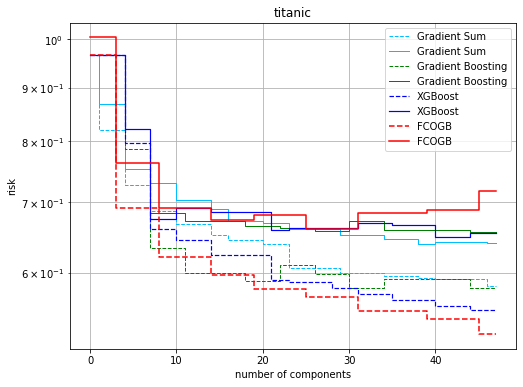

tic-tac-toe mwg_boosting_ 0.5564322789594874 0.5979644979950707
tic-tac-toe gpe_boosting_ 0.6429790974321232 0.6836318575066926
tic-tac-toe xgb_keep_ 0.5785245343665387 0.6294592037129099
tic-tac-toe orth_fc_Newton-CG 0.492558367589728 0.5657371931857984


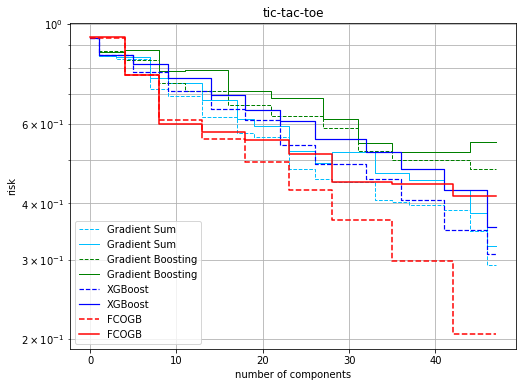

iris mwg_boosting_ 0.2623809625156815 0.5222212394100594
iris gpe_boosting_ 0.26084588796643265 0.43812641130343133
iris xgb_keep_ 0.33057874269500986 0.4552369146431709
iris orth_fc_Newton-CG 0.27814674373146675 0.6274054246585601


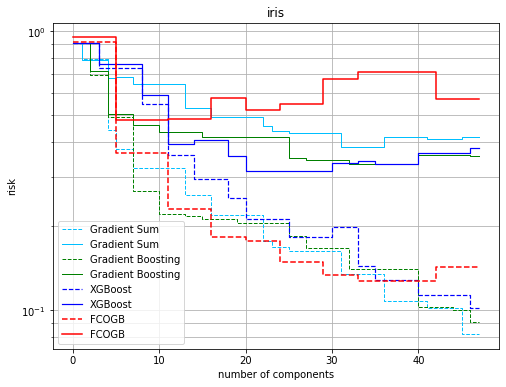

breast_cancer mwg_boosting_ 0.27674925085086877 0.2686573251648128
breast_cancer gpe_boosting_ 0.3112177931385476 0.36231425107762116
breast_cancer xgb_keep_ 0.31583380569836805 0.3399844323837123
breast_cancer orth_fc_Newton-CG 0.3512613960656178 0.4459434996953847


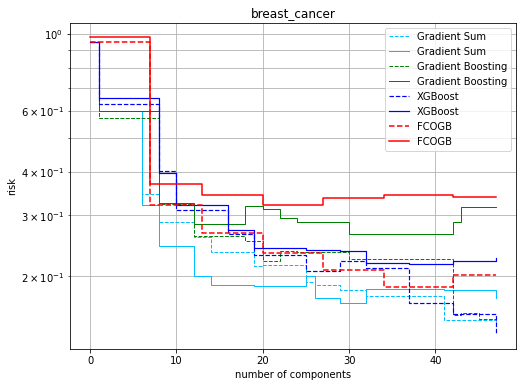

load_wine mwg_boosting_ 0.216919952791529 0.34750561057425317
load_wine gpe_boosting_ 0.2507927706663135 0.43095111197354685
load_wine xgb_keep_ 0.19406362241615804 0.40917938078245963
load_wine orth_fc_Newton-CG 0.26558576031224246 0.421694472164332


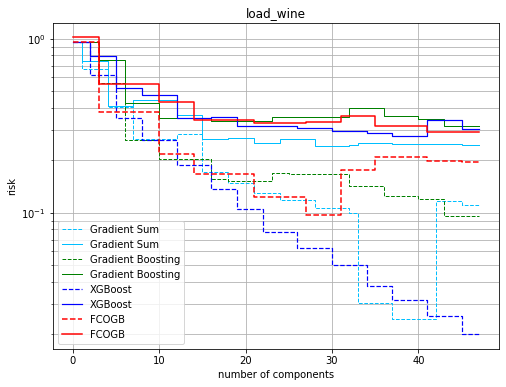

IBM_HR mwg_boosting_ 0.5676340538751103 0.639843344794221
IBM_HR gpe_boosting_ 0.5611428049871149 0.6459004248736104
IBM_HR xgb_keep_ 0.571716082251292 0.6360760294526152
IBM_HR orth_fc_Newton-CG 0.5589564283063193 0.6219014459611015


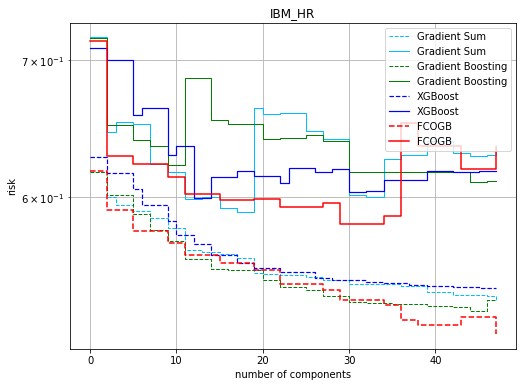

telco_churn mwg_boosting_ 0.679914584350224 0.6640181101295962
telco_churn gpe_boosting_ 0.6798499207480001 0.6742658198240101
telco_churn xgb_keep_ 0.675252494592053 0.662199328423434
telco_churn orth_fc_Newton-CG 0.6689553834212763 0.6604415639673861


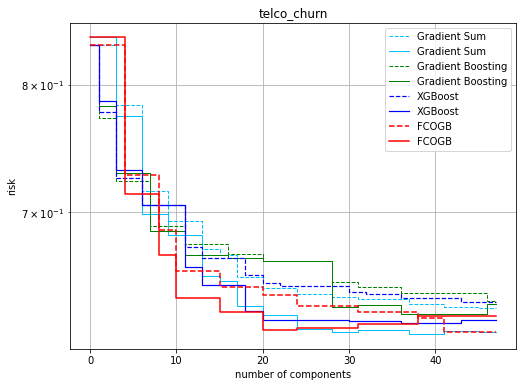

GenderRecognition mwg_boosting_ 0.2311306000208204 0.24449968531294952
GenderRecognition gpe_boosting_ 0.23224615183022346 0.24929497432406794
GenderRecognition xgb_keep_ 0.24980435234385104 0.26480113540169253
GenderRecognition orth_fc_Newton-CG 0.23348334117439498 0.25097251323957465


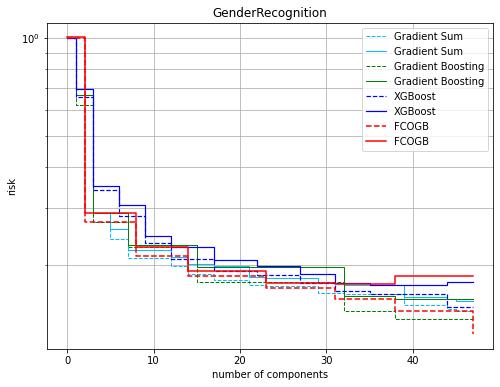

banknote mwg_boosting_ 0.3083147700842195 0.31581690072314983
banknote gpe_boosting_ 0.27085575904189735 0.2690569869903471
banknote xgb_keep_ 0.29267068352389153 0.30160342975806287
banknote orth_fc_Newton-CG 0.23429399466964634 0.23572366657697794


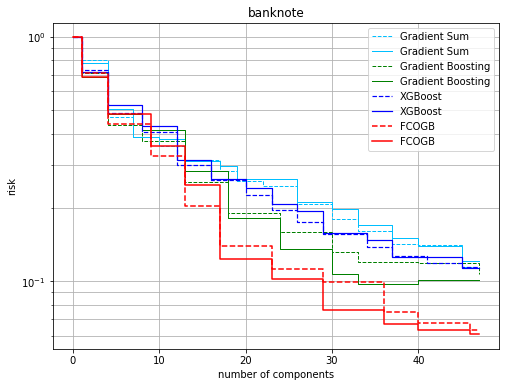

liver mwg_boosting_ 0.8156376212854214 0.8808830988722808
liver gpe_boosting_ 0.8376242002219352 0.9289031305403399
liver xgb_keep_ 0.8158669433255749 0.8734327370188053
liver orth_fc_Newton-CG 0.8344839647236229 0.8915543879373801


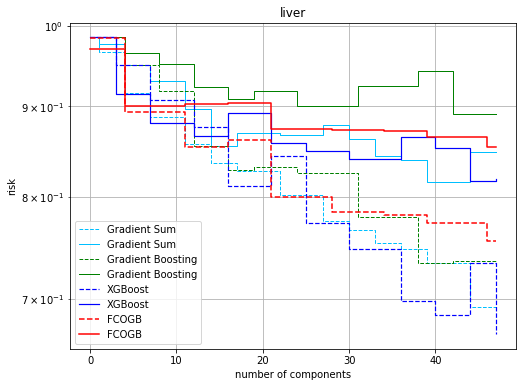

magic mwg_boosting_ 0.7175791573123519 0.6970869455255949
magic gpe_boosting_ 0.7079579078499189 0.692424696120177
magic xgb_keep_ 0.7098529830239434 0.6920338262167623
magic orth_fc_Newton-CG 0.7156400942873521 0.6960661674648937


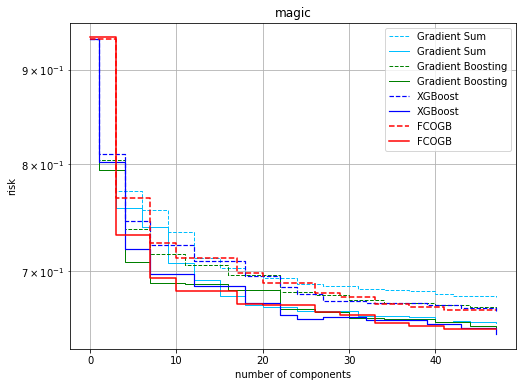

adult mwg_boosting_ 0.5950532806815508 0.6035974284510861
adult gpe_boosting_ 0.5961221456032794 0.6118709609989529
adult xgb_keep_ 0.5848586220656137 0.5977075657153444
adult orth_fc_Newton-CG 0.5955689758730255 0.6069342800135558


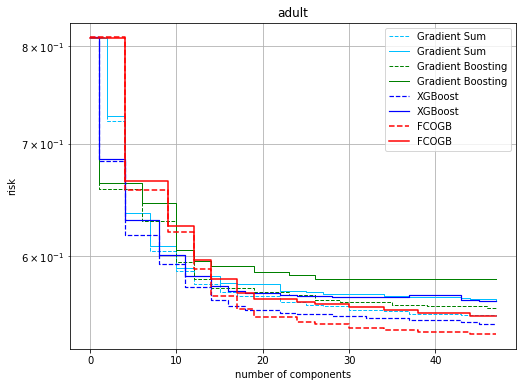

digits5 mwg_boosting_ 0.33395377657281694 0.33015546476154467
digits5 gpe_boosting_ 0.3138803557685353 0.3151392384913183
digits5 xgb_keep_ 0.3451828732583778 0.34253232129437056
digits5 orth_fc_Newton-CG 0.35603964190957316 0.35025794734808574


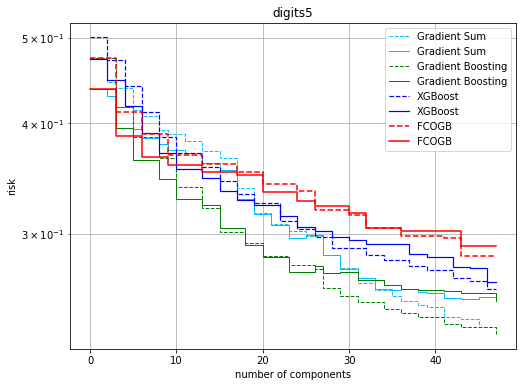

insurance mwg_boosting_ 0.13159353547908348 0.1329514113957213
insurance gpe_boosting_ 0.13241571470977034 0.13588934009278833
insurance xgb_keep_ 0.1343922145666202 0.1378119959769766
insurance orth_fc_Newton-CG 0.12361429177385745 0.1287377369235675


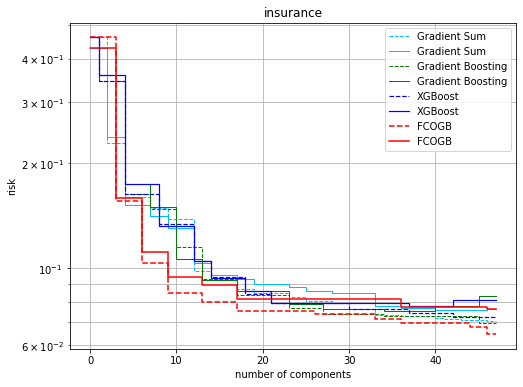

make_friedman1 mwg_boosting_ 0.06950340555672366 0.07165956283587895
make_friedman1 gpe_boosting_ 0.0742855127773344 0.07781423870978621
make_friedman1 xgb_keep_ 0.06865182545131598 0.07511565683648701
make_friedman1 orth_fc_Newton-CG 0.06808655125237095 0.07292244263371836


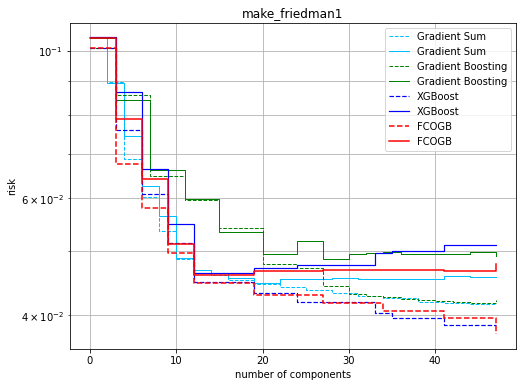

make_friedman2 mwg_boosting_ 0.08992136896853356 0.09112331555720685
make_friedman2 gpe_boosting_ 0.09580077443025545 0.09630027325363621
make_friedman2 xgb_keep_ 0.09195555070758085 0.09189048503349301
make_friedman2 orth_fc_Newton-CG 0.07576939299005052 0.07705579456746485


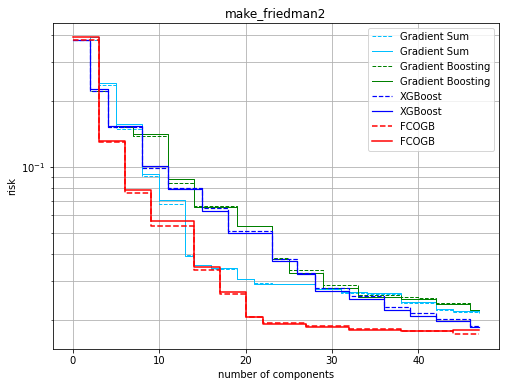

make_friedman3 mwg_boosting_ 0.04518347962039011 0.04835729175264942
make_friedman3 gpe_boosting_ 0.04287387575837981 0.04715447963614283
make_friedman3 xgb_keep_ 0.042317654484164684 0.046704021263669515
make_friedman3 orth_fc_Newton-CG 0.04114630266839799 0.044952018793311566


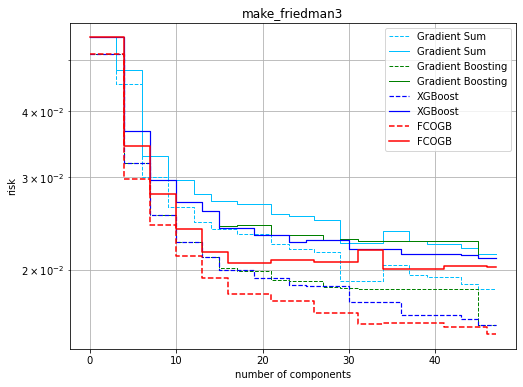

wage mwg_boosting_ 0.3705758523046164 0.3582117201513419
wage gpe_boosting_ 0.3635514093736229 0.4058889159273451
wage xgb_keep_ 0.3607589207246878 0.4122525750204168
wage orth_fc_Newton-CG 0.3541711780693189 0.3752931390445657


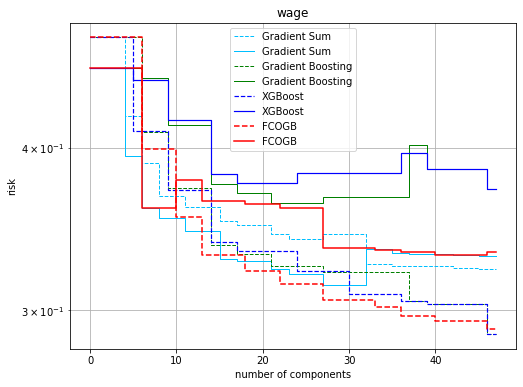

Demographics mwg_boosting_ 0.21476723610567633 0.21662435830936752
Demographics gpe_boosting_ 0.21411544695031698 0.2171213889470489
Demographics xgb_keep_ 0.21411400431017533 0.2175444576811382
Demographics orth_fc_Newton-CG 0.21234756068557714 0.21488559777809352


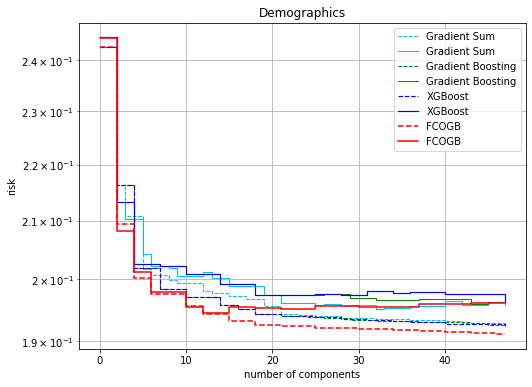

gdp mwg_boosting_ 0.02501466097492185 0.02715608494647196
gdp gpe_boosting_ 0.024911237612302604 0.02736000857977059
gdp xgb_keep_ 0.02489023599215447 0.027298688914962385
gdp orth_fc_Newton-CG 0.02467542565983355 0.026706628304690616


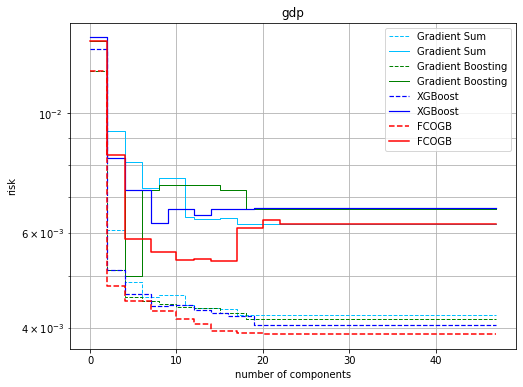

used_cars mwg_boosting_ 0.1388882972949428 0.1711898010327117
used_cars gpe_boosting_ 0.12317528651152418 0.13134574906870394
used_cars xgb_keep_ 0.13166417136483194 0.14134773490828298
used_cars orth_fc_Newton-CG 0.12105675812390657 0.13397896228395048


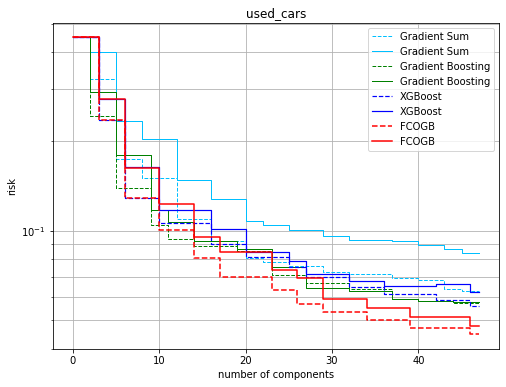

load_diabetes mwg_boosting_ 0.13866829249093623 0.14192458165663338
load_diabetes gpe_boosting_ 0.13911900792507892 0.14303998060160902
load_diabetes xgb_keep_ 0.13965909727582246 0.14680539878459223
load_diabetes orth_fc_Newton-CG 0.13413055911745447 0.14926170574579023


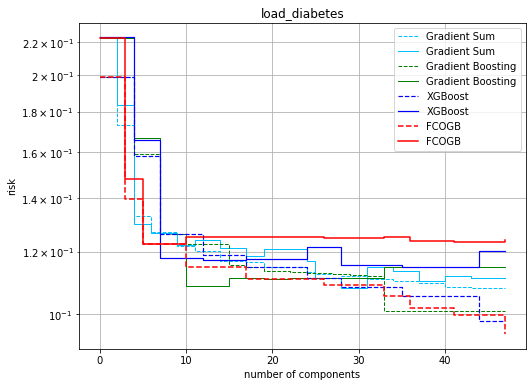

boston mwg_boosting_ 0.08712451648443213 0.07966039893309908
boston gpe_boosting_ 0.0872853094165602 0.08731182845181945
boston xgb_keep_ 0.08625583504263368 0.08924260010024171
boston orth_fc_Newton-CG 0.08248363474302034 0.08787741309197554


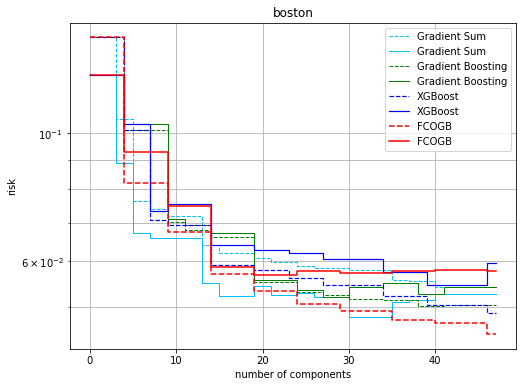

world_happiness_indicator mwg_boosting_ 0.031533590127909066 0.03374990601224066
world_happiness_indicator gpe_boosting_ 0.03143627998699086 0.039185353760150796
world_happiness_indicator xgb_keep_ 0.031235159998186005 0.0393943066138324
world_happiness_indicator orth_fc_Newton-CG 0.029768411954199648 0.03632589035892532


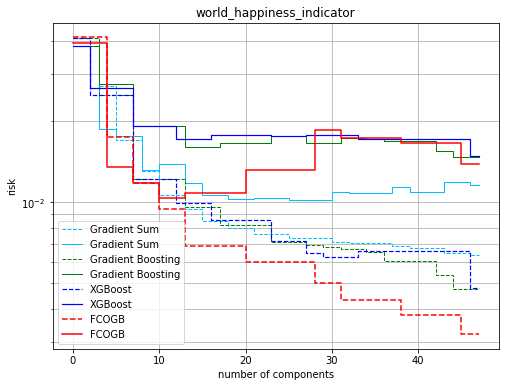

who_life_expectancy mwg_boosting_ 0.026273536737545546 0.02701792161961453
who_life_expectancy gpe_boosting_ 0.02665727567411293 0.027393395694629535
who_life_expectancy xgb_keep_ 0.026637465296390387 0.027368379522668535
who_life_expectancy orth_fc_Newton-CG 0.025740989822884083 0.026908119449251738


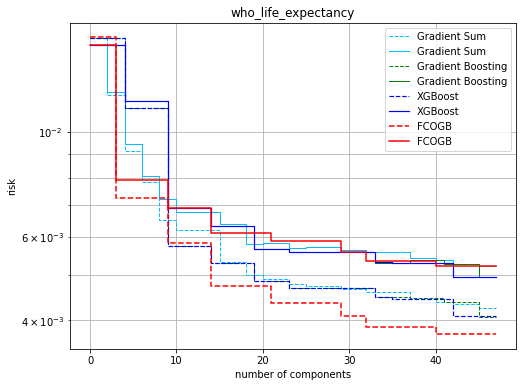

mobile_prices mwg_boosting_ 0.13224780591194507 0.13501670113580533
mobile_prices gpe_boosting_ 0.12486964887803664 0.13038957243507832
mobile_prices xgb_keep_ 0.12472154065882647 0.1304142552539717
mobile_prices orth_fc_Newton-CG 0.12679000747858066 0.13253261433908467


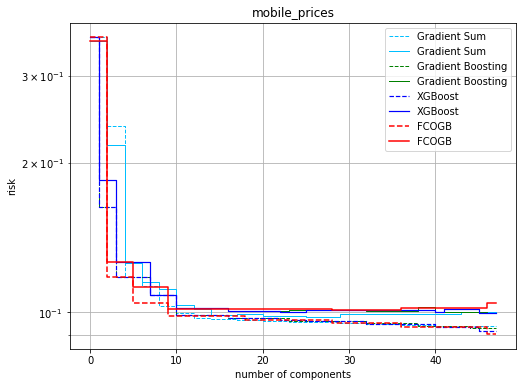

suicide_rates_cleaned mwg_boosting_ 0.543333255227174 0.521954953228882
suicide_rates_cleaned gpe_boosting_ 0.5345586594974714 0.5149652761117097
suicide_rates_cleaned xgb_keep_ 0.5349245940409568 0.5155672735429073
suicide_rates_cleaned orth_fc_Newton-CG 0.5322259025590228 0.5127671428564637


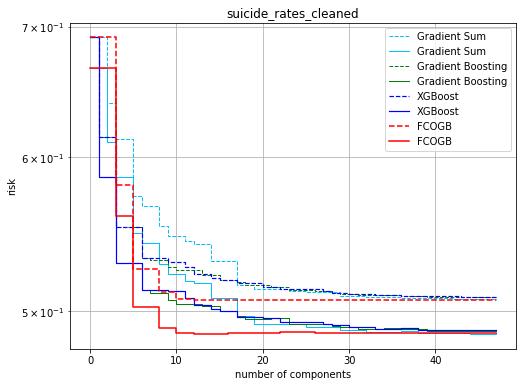

videogamesales mwg_boosting_ 0.953071690812994 0.7196552072460123
videogamesales gpe_boosting_ 0.9530715938143014 0.7196573403689005
videogamesales xgb_keep_ 0.9530715657986802 0.7196537172190225
videogamesales orth_fc_Newton-CG 0.9530700087242574 0.7196608161799911


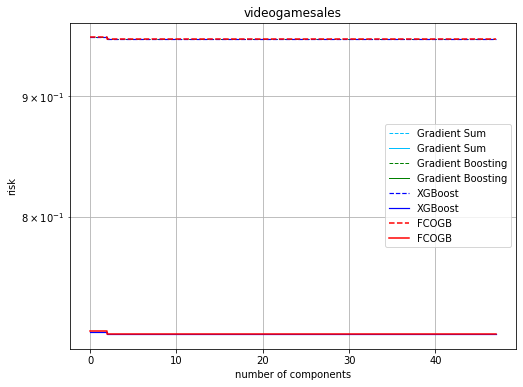

red_wine_quality mwg_boosting_ 0.03480408063816065 0.03536153682283055
red_wine_quality gpe_boosting_ 0.035139668033675735 0.03617419884792539
red_wine_quality xgb_keep_ 0.03470404587798885 0.03603954012604917
red_wine_quality orth_fc_Newton-CG 0.03441505389534101 0.03590269419016985


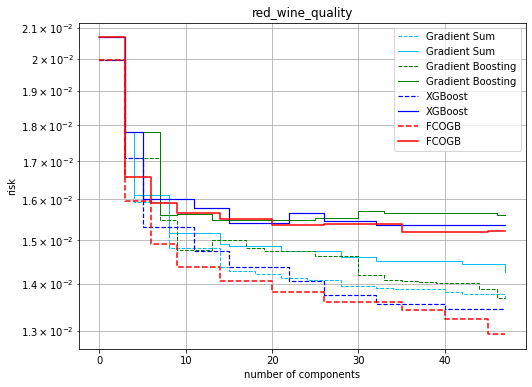

covid_vic mwg_boosting_ 0.13601351655365318 0.1650898497431194
covid_vic gpe_boosting_ 0.10271048745338379 0.08182150122814841
covid_vic xgb_keep_ 0.11449110279936453 0.115486701437201
covid_vic orth_fc_Newton-CG 0.08653760367085947 0.08610425208933482


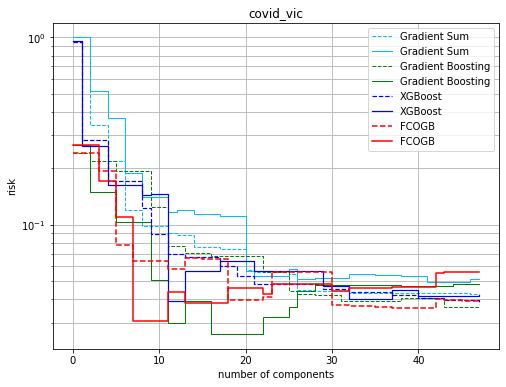

covid mwg_boosting_ 0.3308531575405966 0.44596913207345773
covid gpe_boosting_ 0.3581170847722873 0.3984703289497655
covid xgb_keep_ 0.8884486430417278 0.7356287379855454
covid orth_fc_Newton-CG 0.32098760802215337 0.39537477319316344


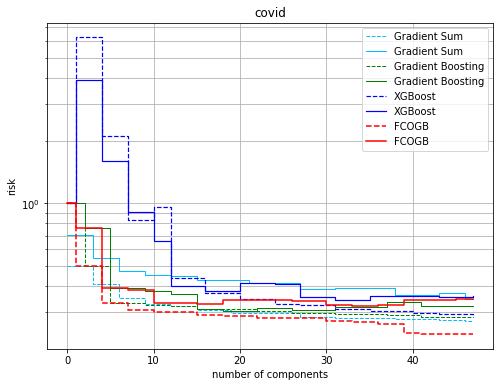

bicycle mwg_boosting_ 0.3031382147392713 0.35348595540375904
bicycle gpe_boosting_ 0.3092339690320938 0.46717564376454324
bicycle xgb_keep_ 0.3232833312649893 0.4458210475527549
bicycle orth_fc_Newton-CG 0.2755197801269648 0.31992746891058843


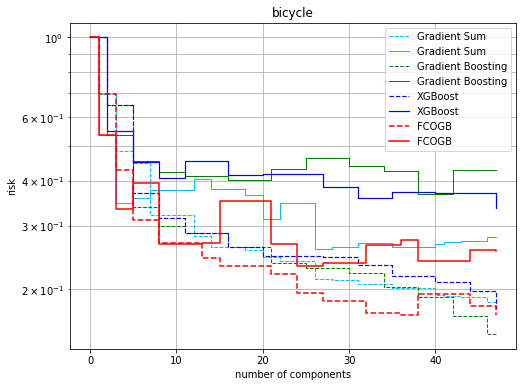

ships mwg_boosting_ 0.15680179240413422 0.18143223034765477
ships gpe_boosting_ 0.16417053332309217 0.18638530597912548
ships xgb_keep_ 1.9453304596803578 4.220828467410165
ships orth_fc_Newton-CG 0.16892416248159875 0.15532160299384065


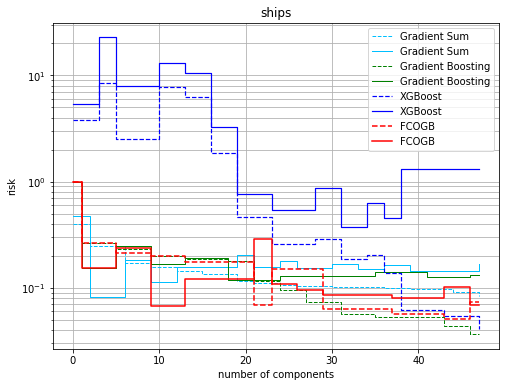

smoking mwg_boosting_ 0.10873251933887586 0.1183542573132161
smoking gpe_boosting_ 0.11049123788585592 0.2346459274326126
smoking xgb_keep_ 0.14612643292845767 0.3081054453865639
smoking orth_fc_Newton-CG 0.07224650748231075 0.08456435984199688


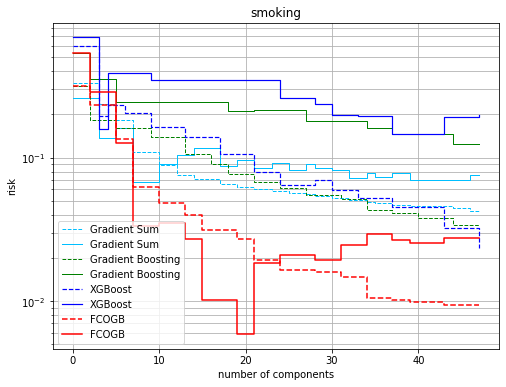

In [10]:
colours = {}
line_width = {}
width = [1, 1,1.2, 1.5]*4
i = 0
colors=['deepskyblue','green','blue','red','gold','cyan','brown','deepskyblue','purple', 'lime',
        'slategray','magenta','pink','olive','khaki']
label_map={'gpe_boosting_':'Gradient Boosting', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
           'orth_fc_Newton-CG': 'FCOGB', 'xgb_keep_': 'XGBoost', 
          'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting','orth_fc_Newton-CG*':'FCOGB Greedy',
          'mwg_boosting_': 'Gradient Sum'}
for dataset in datasets:
    plt.figure(figsize=(8,6))
    j=0
    for item in algo_names:
        color = colors[j]
        colours[item] = color
        line_width[item] = width[j]
        j+=1
        print(dataset, item, train_datasets[dataset][item][0].mean(), test_datasets[dataset][item][0].mean())
        plt.step(np.array(range(0,48)), 
                 np.array(train_datasets[dataset][item][0])[1:], '--', color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
        plt.step(np.array(range(0,48)), 
                 np.array(test_datasets[dataset][item][0])[1:], color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.title(dataset)
    plt.xlabel('number of components')
    plt.ylabel('risk')
    plt.yscale('log')
    plt.grid(visible=True, which='major')
    plt.grid(visible=True, which='minor')
    plt.gca().set_ylim(bottom=0)
    plt.legend()
    plt.savefig('figures/'+dataset+'.png', bbox_inches='tight', pad_inches=0)
    plt.show()

In [11]:
def sirus_components(dataset_name, location='output_CC50_20230824', max_length=30):
    num_components = np.array([])
    file_name = dataset_name+' 3.txt'
    file_path = location + '/' + file_name
    try:
        f=open(file_path, 'r')
    except Exception as e:
#         print(e)
#         print(file_path, 'does not exist')
        return num_components, 0
    j=-1
    num_rules=0
    components = 0
    for line in f:
        if 'Sample size' in line:
            j+=1
            if j != 0:
                num_components = np.append(num_components, components)
                if components >= 50:
                    break
            num_rules=0
            components = 0
        if j >= max_length:
#             print('break',num_rules)
            break
        if 'if' in line:
            num_rules+=1
            components += line.count('>')+line.count('<') + 2
#     print(num_rules)
    return num_components, num_rules

coms=[]
rules=[]
for dataset in datasets:
#     print(dataset)
    comp, rule = sirus_components(dataset)
    if rule>0:
        coms.append(comp[-1])
        rules.append(rule)

In [12]:
sum(rules)/len(rules), sum(coms)/sum(rules), sum(rules)/len(rules)* sum(coms)/sum(rules)

(14.807692307692308, 3.5324675324675323, 52.30769230769231)

In [13]:
path = '../analysis_results/'
today=str(date.today())
tests_normal=pd.read_csv(path+'compare_test'+today+'normal.csv',index_col=False)
trains_normal=pd.read_csv(path+'compare_train'+today+'normal.csv',index_col=False)
trains_log = pd.read_csv(path+'compare_train'+today+'log.csv',index_col=False)
tests_log=pd.read_csv(path+'compare_test'+today+'log.csv',index_col=False)

In [14]:
res_train_normal = {}
res_test_normal = {}
xgb_index=list(range(28))
for algo in algo_names:
    res_train_normal[algo]=[]
    res_test_normal[algo]=[]
    for i in range(1, 52):
        if algo!='xgb_keep_':
            res_train_normal[algo].append(trains_normal.mean(axis=0)[algo+str(i)])
            res_test_normal[algo].append(tests_normal.mean(axis=0)[algo+str(i)])
        else:
            res_train_normal[algo].append(trains_normal.iloc[xgb_index].mean(axis=0)[algo+str(i)])
            res_test_normal[algo].append(tests_normal.iloc[xgb_index].mean(axis=0)[algo+str(i)])
pd_train_normal=pd.DataFrame.from_dict(res_train_normal)
pd_test_normal=pd.DataFrame.from_dict(res_test_normal)
pd_train_normal

/tmp/ipykernel_1019/2150478037.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res_train_normal[algo].append(trains_normal.mean(axis=0)[algo+str(i)])
/tmp/ipykernel_1019/2150478037.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res_test_normal[algo].append(tests_normal.mean(axis=0)[algo+str(i)])
/tmp/ipykernel_1019/2150478037.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res_train_normal[algo].append(trains_normal.iloc[xgb_index].mean(axis=0)[algo+str(i)])
/tmp/ipykern

mwg_boosting_  gpe_boosting_  xgb_keep_  orth_fc_Newton-CG
0        1.000000       1.000000   1.000000           1.000000
1        0.564583       0.574173   0.570844           0.574231
2        0.505088       0.498583   0.510449           0.520586
3        0.459639       0.450679   0.489437           0.487630
4        0.427399       0.421313   0.456486           0.417576
5        0.379579       0.386903   0.422521           0.386196
6        0.363745       0.366287   0.407297           0.356084
7        0.345188       0.354035   0.398050           0.346152
8        0.323365       0.336241   0.387415           0.322860
9        0.316361       0.321531   0.361902           0.311581
10       0.312126       0.313883   0.355050           0.303781
11       0.308525       0.307430   0.348983           0.294424
12       0.306381       0.300654   0.339751           0.288798
13       0.299983       0.296478   0.328706           0.287692
14       0.292733       0.290028   0.327916           0.278307
15       0.288812       0.287796   0.319967           0.273116
16       0.283623       0.284830   0.318879           0.271685
17       0.281761       0.279510   0.310741           0.270507
18       0.276474       0.278948   0.309164           0.266892
19       0.275422       0.275383   0.304469           0.263851
20       0.271674       0.274313   0.301543           0.262744
21       0.270119       0.272592   0.298362           0.260663
22       0.268397       0.268467   0.298161           0.253849
23       0.265587       0.268360   0.293167           0.253264
24       0.261389       0.267420   0.291375           0.252735
25       0.260618       0.265336   0.290290           0.250472
26       0.259257       0.263918   0.285608           0.250156
27       0.256202       0.263045   0.282125           0.249011
28       0.254592       0.259682   0.281227           0.246831
29       0.253825       0.259208   0.280239           0.244461
30       0.252646       0.258830   0.280032           0.240636
31       0.251226       0.256658   0.278495           0.239660
32       0.249676       0.252318   0.277893           0.240910
33       0.248542       0.249683   0.275464           0.240148
34       0.244026       0.248918   0.273437           0.239359
35       0.243810       0.248210   0.272102           0.238186
36       0.243264       0.247329   0.271027           0.237083
37       0.242079       0.246576   0.267060           0.235356
38       0.240845       0.245790   0.264590           0.235077
39       0.240461       0.243743   0.264581           0.235160
40       0.239490       0.243650   0.264220           0.233845
41       0.238931       0.242159   0.262921           0.233523
42       0.237362       0.241813   0.260300           0.232712
43       0.239891       0.239099   0.259421           0.231023
44       0.239597       0.237997   0.259200           0.230558
45       0.236855       0.236565   0.259882           0.230025
46       0.234962       0.236178   0.259384           0.229352
47       0.232600       0.234589   0.256504           0.228896
48       0.231991       0.234127   0.253372           0.227446
49       0.230717       0.232183   0.252372           0.226845
50       0.230533       0.231851   0.252197           0.226845

/tmp/ipykernel_1019/667261052.py:31: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.gca().set_ylim(bottom=0)


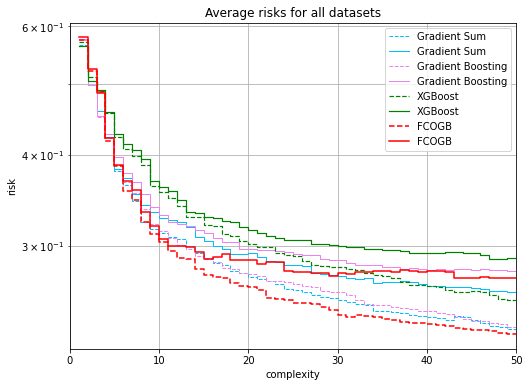

In [15]:
plt.figure(figsize=(8,6))
colours = {}
line_width = {}
width = [1,1, 1.2, 1.5]*4
i = 0
colors=['deepskyblue','violet','green','red','gold','blue','cyan','brown','deepskyblue','purple', 'lime',
        'slategray','magenta','pink','olive','khaki']
label_map={'gpe_boosting_':'Gradient Boosting', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
           'orth_fc_Newton-CG': 'FCOGB', 'xgb_keep_': 'XGBoost', 
          'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
          'mwg_boosting_': 'Gradient Sum','orth_fc_Newton-CG*':'FCOGB Greedy'
          }
for item in pd_train_normal:
    color = colors[i]
    colours[item] = color
    line_width[item] = width[i]
    i+=1
    plt.step(np.array(range(1,51)), 
             np.array(pd_train_normal[item])[1:], '--', color=colours[item],
             label=label_map[item],linewidth=line_width[item],where='post')
    plt.step(np.array(range(1,51)), 
             np.array(pd_test_normal[item])[1:], color=colours[item],
             label=label_map[item],linewidth=line_width[item],where='post')
plt.title("Average risks for all datasets")
plt.xlabel('complexity')
plt.ylabel('risk')
plt.yscale('log')
plt.xlim((0,50))
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor')
plt.gca().set_ylim(bottom=0)
plt.legend()
# plt.show()
plt.savefig('average_risks.pdf', bbox_inches='tight',pad_inches=0.01)

In [16]:
# AUC train
pd_train_normal.mean()

mwg_boosting_        0.299646
gpe_boosting_        0.301868
xgb_keep_            0.328129
orth_fc_Newton-CG    0.293309
dtype: float64

In [17]:
# AUC test
pd_test_normal.mean()

mwg_boosting_        0.317737
gpe_boosting_        0.327731
xgb_keep_            0.345234
orth_fc_Newton-CG    0.318869
dtype: float64

In [18]:
res_train_log = {}
res_test_log = {}
xgb_index=list(range(28))
for algo in algo_names:
    res_train_log[algo]=[]
    res_test_log[algo]=[]
    for i in range(1, 52):
        if algo!='xgb_keep_':
            res_train_log[algo].append(trains_log.mean(axis=0)[algo+str(i)])
            res_test_log[algo].append(tests_log.mean(axis=0)[algo+str(i)])
        else:
            res_train_log[algo].append(trains_log.iloc[xgb_index].mean(axis=0)[algo+str(i)])
            res_test_log[algo].append(tests_log.iloc[xgb_index].mean(axis=0)[algo+str(i)])
pd_train_log=pd.DataFrame.from_dict(res_train_log)
pd_test_log=pd.DataFrame.from_dict(res_test_log)

/tmp/ipykernel_1019/1259571411.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res_train_log[algo].append(trains_log.mean(axis=0)[algo+str(i)])
/tmp/ipykernel_1019/1259571411.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res_test_log[algo].append(tests_log.mean(axis=0)[algo+str(i)])
/tmp/ipykernel_1019/1259571411.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res_train_log[algo].append(trains_log.iloc[xgb_index].mean(axis=0)[algo+str(i)])
/tmp/ipykernel_1019/1259571411

In [19]:
trains_log.mean(axis=0)

/tmp/ipykernel_1019/293520618.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  trains_log.mean(axis=0)


mwg_boosting_1         0.000000
mwg_boosting_2        -1.039247
mwg_boosting_3        -1.111809
mwg_boosting_4        -1.247071
mwg_boosting_5        -1.348185
                         ...   
orth_fc_Newton-CG47   -2.338260
orth_fc_Newton-CG48   -2.336944
orth_fc_Newton-CG49   -2.347272
orth_fc_Newton-CG50   -2.352719
orth_fc_Newton-CG51   -2.352719
Length: 204, dtype: float64

In [20]:
sirus_train=pd.read_csv('./SIRUS_train.csv')
sirus_test=pd.read_csv('./SIRUS_test.csv')
sirus_complex=pd.read_csv('./SIRUS_complex.csv')

In [21]:
sirus_test_risks={}
sirus_test_log_risks={}
sirus_train_risks={}
sirus_train_log_risks={}
for dataset in datasets:
    if dataset in datasets[-5:]:
        continue
    train=np.array([])
    test=np.array([])
    for i in range(50):
        k=0
        if i==0:
            while k<sirus_complex[dataset][i]-1:
                train=np.append(train, 1/2.71828)
                test=np.append(test, 1/2.71828)
                k+=1
        else:
            while k<sirus_complex[dataset][i]-1:
                train=np.append(train, sirus_train[dataset][i-1]/get_max_risk(dataset))
                test=np.append(test, sirus_test[dataset][i-1]/get_max_risk(dataset))
                k+=1
                if len(train)>50:
                    break
        if len(train)>50:
            break
    sirus_test_risks[dataset]=test
    sirus_test_log_risks[dataset]=np.log(test)
    sirus_train_risks[dataset]=train
    sirus_train_log_risks[dataset]=np.log(train)
#     print(dataset, test, train)
sirus_test_pd=pd.DataFrame.from_dict(sirus_test_risks)
sirus_train_pd=pd.DataFrame.from_dict(sirus_train_risks)
sirus_train_pd.to_csv('sirus_train_normal.csv')
sirus_test_pd.to_csv('sirus_test_normal.csv')
sirus_test_log_pd=pd.DataFrame.from_dict(sirus_test_log_risks)
sirus_train_log_pd=pd.DataFrame.from_dict(sirus_train_log_risks)
sirus_test_log_pd.mean(axis=0)['titanic']

-0.1759691177436297

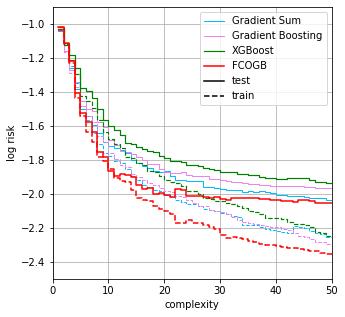

In [22]:
plt.figure(figsize=(5,5))
colours = {}
line_width = {}
width = [1,1, 1.2, 1.5]*4
i = 0
colors=['deepskyblue','violet','green','red','gold','blue','cyan','brown','deepskyblue','purple', 'lime',
        'slategray','magenta','pink','olive','khaki']
label_map={'gpe_boosting_':'Gradient Boosting', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
           'orth_fc_Newton-CG': 'FCOGB', 'xgb_keep_': 'XGBoost', 
          'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting','orth_fc_Newton-CG*':'FCOGB Greedy',
          'mwg_boosting_': 'Gradient Sum'}

for item in pd_train_log:
    color = colors[i]
    colours[item] = color
    line_width[item] = width[i]
    i+=1
    plt.step(np.array(range(1,51)), 
             np.array(pd_train_log[item])[1:], '--', color=colours[item],
             linewidth=line_width[item],where='post')
    plt.step(np.array(range(1,51)), 
             np.array(pd_test_log[item])[1:], color=colours[item],
             label=label_map[item],linewidth=line_width[item],where='post')


plt.plot([0],[0],'k', label='test')
plt.plot([0],[0],'k--', label='train')
# plt.title("log risks")
plt.xlabel('complexity')
plt.ylabel('log risk')
plt.xlim((0,50))
plt.ylim((-2.5, -0.9))
# plt.yscale('log')
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor')
# plt.gca().set_ylim(bottom=0)
plt.legend()
# plt.show()
plt.savefig('average_log_risks0.pdf',  bbox_inches='tight',pad_inches=0.01)

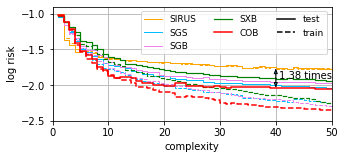

In [23]:
plt.figure(figsize=(5,2.1))
colours = {}
line_width = {}
width = [1,1, 1.2, 1.5]*4
i = 0
colors=['deepskyblue','violet','green','red','gold','blue','cyan','brown','deepskyblue','purple', 'lime',
        'slategray','magenta','pink','olive','khaki']
label_map={'gpe_boosting_':'SGB', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
           'orth_fc_Newton-CG': 'COB', 'xgb_keep_': 'SXB', 
          'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting','orth_fc_Newton-CG*':'COB Greedy',
          'mwg_boosting_': 'SGS'}
plt.step(np.array(range(1, 51)), sirus_test_log_pd.mean(axis=1)[1:], color='orange',label='SIRUS',linewidth=1, where='post')
plt.step(np.array(range(1, 51)), sirus_train_log_pd.mean(axis=1)[1:], '--',color='orange',linewidth=1,where='post')

for item in pd_train_log:
    color = colors[i]
    colours[item] = color
    line_width[item] = width[i]
    i+=1
    plt.step(np.array(range(1,51)), 
             np.array(pd_train_log[item])[1:], '--', color=colours[item],
             linewidth=line_width[item],where='post')
    plt.step(np.array(range(1,51)), 
             np.array(pd_test_log[item])[1:], color=colours[item],
             label=label_map[item],linewidth=line_width[item],where='post')
plt.plot([0],[0],'k', label='test')
plt.plot([0],[0],'k--', label='train')
# plt.title("log risks")
plt.xlabel('complexity')
plt.ylabel('log risk')
plt.xlim((0,50))
plt.ylim((-2.5, -0.9))
# plt.yscale('log')
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor')
# plt.gca().set_ylim(bottom=0)
plt.legend(fontsize=9,ncol=3)
plt.annotate('',(40,sirus_test_log_pd.mean(axis=1)[40]+0.03),
             (40,pd_test_log['orth_fc_Newton-CG'][40]-0.03),
             arrowprops=dict(arrowstyle="<|-|>,head_width=0.15,head_length=0.4"),
            color='k')
# plt.show()
plt.text(40.5, -1.9, '1.38 times')
plt.savefig('average_log_risks.pdf',  bbox_inches='tight',pad_inches=0.01)

In [24]:
np.exp(sirus_test_log_pd.mean(axis=1)[40]-pd_test_log['orth_fc_Newton-CG'][40])

1.3128649339147402

In [25]:
sirus_test_log_pd.mean(axis=1)[40]

-1.7654708347037185

In [26]:
# AUC train log
pd_train_log.mean()

mwg_boosting_       -1.931964
gpe_boosting_       -1.929179
xgb_keep_           -1.863594
orth_fc_Newton-CG   -2.022521
dtype: float64

In [27]:
# AUC train log
pd_test_log.mean()

mwg_boosting_       -1.804793
gpe_boosting_       -1.764775
xgb_keep_           -1.708742
orth_fc_Newton-CG   -1.866579
dtype: float64

In [28]:
sirus=[-0.112049504, -0.122167634, -0.294371061, -0.466808738, -0.476424197, -0.026343975, -0.056570351, -0.562118918, -0.15315118, -0.086647807, -0.102032726, -0.220646671, -1.339410775, -1.731605547, -1.801809805, -2.501036032, -2.385966702, -1.075872802, -1.565421027, -2.832026075, -0.850971266, -1.671313316, -2.253794929, -2.216407397, -2.207274914, -1.966112857, -0.665532014, -0.16251893, -2.617295838, ]

In [29]:
res_train_log_dataset = {}
res_train_log_dataset['dataset']=[]
res_test_log_dataset = {}
res_test_log_dataset['dataset']=[]
datasets_list=[]
for algo in algo_names:
    res_train_log_dataset[algo]=[]
    res_test_log_dataset[algo]=[]
    for i in range(len(trains_log)):
        if algo==algo_names[-1]:
            res_train_log_dataset['dataset'].append(dataset_names[i])
            res_test_log_dataset['dataset'].append(dataset_names[i])
            datasets_list.append(datasets[i])
        res_train_log_dataset[algo].append(trains_log[[algo+str(i) for i in range(1,50)]].mean(axis=1).iloc[i])
        res_test_log_dataset[algo].append(tests_log[[algo+str(i) for i in range(1,50)]].mean(axis=1).iloc[i])
res_train_log_dataset['sirus']=[]
res_test_log_dataset['sirus']=[]
for i in range(len(trains_normal)):
    if i>=29:
        res_train_log_dataset['sirus'].append(1000)
        res_test_log_dataset['sirus'].append(1000)
    else:
        res_train_log_dataset['sirus'].append(sirus[i])
        res_test_log_dataset['sirus'].append(sirus[i])
pd_train_log_dataset=pd.DataFrame.from_dict(res_train_log_dataset)
pd_test_log_dataset=pd.DataFrame.from_dict(res_test_log_dataset)
pd_train_log_dataset

dataset  mwg_boosting_  gpe_boosting_  xgb_keep_  orth_fc_Newton-CG  \
0        titanic      -0.432832      -0.449390  -0.454353          -0.498512   
1    tic-tac-toe      -0.636076      -0.463594  -0.595458          -0.806153   
2           iris      -1.582711      -1.568599  -1.372677          -1.538068   
3         breast      -1.426082      -1.287784  -1.302109          -1.238037   
4           wine      -1.978242      -1.638301  -2.302550          -1.535483   
5         IBM HR      -0.571121      -0.583041  -0.564082          -0.587078   
6          telco      -0.390780      -0.389207  -0.396354          -0.407533   
7         gender      -1.607654      -1.612146  -1.527319          -1.612080   
8       banknote      -1.360497      -1.534456  -1.442407          -1.819937   
9          liver      -0.208624      -0.181772  -0.210414          -0.184092   
10         magic      -0.335121      -0.348804  -0.346274          -0.339424   
11         adult      -0.526773      -0.523261  -0.543120          -0.528820   
12       digits5      -1.139625      -1.203421  -1.099399          -1.058871   
13     insurance      -2.262963      -2.271199  -2.248047          -2.371381   
14     friedman1      -2.964410      -2.880489  -2.988938          -2.995327   
15     friedman2      -3.064800      -2.878564  -2.954511          -3.352523   
16     friedman3      -3.650865      -3.752905  -3.784426          -3.845693   
17          wage      -1.014588      -1.039794  -1.047332          -1.068765   
18        demog.      -1.585646      -1.588968  -1.588976          -1.597945   
19           gdp      -5.280525      -5.302244  -5.315283          -5.359464   
20     used cars      -2.247278      -2.377800  -2.322959          -2.484523   
21      diabetes      -2.082747      -2.087601  -2.082135          -2.124422   
22        boston      -2.670409      -2.690502  -2.699607          -2.764157   
23     happiness      -4.557450      -4.599234  -4.586196          -4.861369   
24  life expect.      -5.079947      -5.051522  -5.056174          -5.189816   
25        mobile      -2.192841      -2.225188  -2.226769          -2.226720   
26       suicide      -0.617971      -0.633179  -0.632477          -0.639180   
27     videogame      -0.048090      -0.048090  -0.048090          -0.048091   
28      red wine      -4.138654      -4.115902  -4.146167          -4.166257   
29     covid vic      -2.559887      -2.652523  -2.649133          -2.821928   
30         covid      -1.139519      -1.090237  -0.666818          -1.196546   
31       bicycle      -1.305124      -1.308293  -1.244645          -1.412275   
32         ships      -2.009417      -2.162740  -0.572026          -2.083028   
33       smoking      -2.570422      -2.538121  -2.348723          -3.543996   

          sirus  
0     -0.112050  
1     -0.122168  
2     -0.294371  
3     -0.466809  
4     -0.476424  
5     -0.026344  
6     -0.056570  
7     -0.562119  
8     -0.153151  
9     -0.086648  
10    -0.102033  
11    -0.220647  
12    -1.339411  
13    -1.731606  
14    -1.801810  
15    -2.501036  
16    -2.385967  
17    -1.075873  
18    -1.565421  
19    -2.832026  
20    -0.850971  
21    -1.671313  
22    -2.253795  
23    -2.216407  
24    -2.207275  
25    -1.966113  
26    -0.665532  
27    -0.162519  
28    -2.617296  
29  1000.000000  
30  1000.000000  
31  1000.000000  
32  1000.000000  
33  1000.000000

In [30]:
res_train_normal_dataset = {}
res_train_normal_dataset['dataset']=[]
res_test_normal_dataset = {}
res_test_normal_dataset['dataset']=[]
for algo in algo_names:
    res_train_normal_dataset[algo]=[]
    res_test_normal_dataset[algo]=[]
    for i in range(len(trains_normal)):
        if algo==algo_names[-1]:
            res_train_normal_dataset['dataset'].append(dataset_names[i])
            res_test_normal_dataset['dataset'].append(dataset_names[i])
            datasets_list.append(datasets[i])
        res_train_normal_dataset[algo].append(trains_normal[[algo+str(i) for i in range(1,50)]].mean(axis=1).iloc[i])
        res_test_normal_dataset[algo].append(tests_normal[[algo+str(i) for i in range(1,50)]].mean(axis=1).iloc[i])

pd_train_normal_dataset=pd.DataFrame.from_dict(res_train_normal_dataset)
pd_test_normal_dataset=pd.DataFrame.from_dict(res_test_normal_dataset)
# res_train_normal_dataset

In [31]:
pd_train_normal_dataset

dataset  mwg_boosting_  gpe_boosting_  xgb_keep_  orth_fc_Newton-CG
0        titanic       0.654007       0.646961   0.644837           0.616074
1    tic-tac-toe       0.556432       0.642979   0.578525           0.492558
2           iris       0.262381       0.260846   0.330579           0.278147
3         breast       0.276749       0.311218   0.315834           0.351261
4           wine       0.216920       0.250793   0.194064           0.265586
5         IBM HR       0.567634       0.561143   0.571716           0.558956
6          telco       0.679915       0.679850   0.675252           0.668955
7         gender       0.231131       0.232246   0.249804           0.233483
8       banknote       0.308315       0.270856   0.292671           0.234294
9          liver       0.815638       0.837624   0.815867           0.834484
10         magic       0.717579       0.707958   0.709853           0.715640
11         adult       0.595053       0.596122   0.584859           0.595569
12       digits5       0.333954       0.313880   0.345183           0.356040
13     insurance       0.131594       0.132416   0.134392           0.123614
14     friedman1       0.069503       0.074286   0.068652           0.068087
15     friedman2       0.089921       0.095801   0.091956           0.075769
16     friedman3       0.045183       0.042874   0.042318           0.041146
17          wage       0.370576       0.363551   0.360759           0.354171
18        demog.       0.214767       0.214115   0.214114           0.212348
19           gdp       0.025015       0.024911   0.024890           0.024675
20     used cars       0.138888       0.123175   0.131664           0.121057
21      diabetes       0.138668       0.139119   0.139659           0.134131
22        boston       0.087125       0.087285   0.086256           0.082484
23     happiness       0.031534       0.031436   0.031235           0.029768
24  life expect.       0.026274       0.026657   0.026637           0.025741
25        mobile       0.132248       0.124870   0.124722           0.126790
26       suicide       0.543333       0.534559   0.534925           0.532226
27     videogame       0.953072       0.953072   0.953072           0.953070
28      red wine       0.034804       0.035140   0.034704           0.034415
29     covid vic       0.136014       0.102710   0.114491           0.086538
30         covid       0.330853       0.358117   0.888449           0.320988
31       bicycle       0.303138       0.309234   0.323283           0.275520
32         ships       0.156802       0.164171   1.945330           0.168924
33       smoking       0.108733       0.110491   0.146126           0.072247

In [32]:
df=pd_train_normal_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
df

dataset  mwg_boosting_  gpe_boosting_  xgb_keep_  orth_fc_Newton-CG
0            gdp       0.025015       0.024911   0.024890           0.024675
1   life expect.       0.026274       0.026657   0.026637           0.025741
2      happiness       0.031534       0.031436   0.031235           0.029768
3       red wine       0.034804       0.035140   0.034704           0.034415
4      friedman3       0.045183       0.042874   0.042318           0.041146
5      friedman1       0.069503       0.074286   0.068652           0.068087
6        smoking       0.108733       0.110491   0.146126           0.072247
7      friedman2       0.089921       0.095801   0.091956           0.075769
8         boston       0.087125       0.087285   0.086256           0.082484
9      covid vic       0.136014       0.102710   0.114491           0.086538
10     used cars       0.138888       0.123175   0.131664           0.121057
11     insurance       0.131594       0.132416   0.134392           0.123614
12        mobile       0.132248       0.124870   0.124722           0.126790
13      diabetes       0.138668       0.139119   0.139659           0.134131
14         ships       0.156802       0.164171   1.945330           0.168924
15        demog.       0.214767       0.214115   0.214114           0.212348
16        gender       0.231131       0.232246   0.249804           0.233483
17      banknote       0.308315       0.270856   0.292671           0.234294
18          wine       0.216920       0.250793   0.194064           0.265586
19       bicycle       0.303138       0.309234   0.323283           0.275520
20          iris       0.262381       0.260846   0.330579           0.278147
21         covid       0.330853       0.358117   0.888449           0.320988
22        breast       0.276749       0.311218   0.315834           0.351261
23          wage       0.370576       0.363551   0.360759           0.354171
24       digits5       0.333954       0.313880   0.345183           0.356040
25   tic-tac-toe       0.556432       0.642979   0.578525           0.492558
26       suicide       0.543333       0.534559   0.534925           0.532226
27        IBM HR       0.567634       0.561143   0.571716           0.558956
28         adult       0.595053       0.596122   0.584859           0.595569
29       titanic       0.654007       0.646961   0.644837           0.616074
30         telco       0.679915       0.679850   0.675252           0.668955
31         magic       0.717579       0.707958   0.709853           0.715640
32         liver       0.815638       0.837624   0.815867           0.834484
33     videogame       0.953072       0.953072   0.953072           0.953070

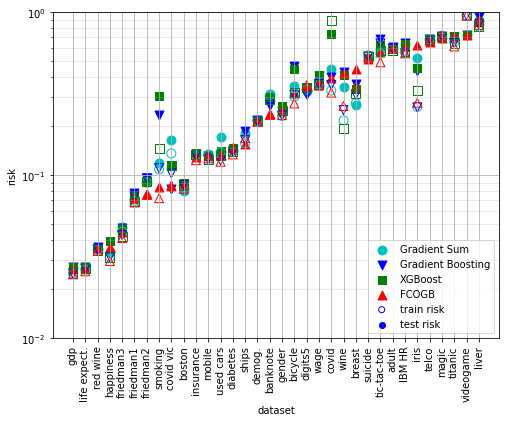

In [33]:
df0=pd_train_normal_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
df1=pd_test_normal_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
ax1=df1.plot.scatter(x='dataset', y='mwg_boosting_', marker='o', c='c',s=80,logy=True, grid=True, figsize=(8,6), 
                    label='Gradient Sum', legend=True, xlabel='dataset', ylabel='risk', rot=90, ylim=(0.01, 1))
ax2=df1.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax1, c='b', grid=True, label='Gradient Boosting',
                   xlabel='dataset', ylabel='risk', rot=90)
ax3=df1.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, c='g', grid=True, label='XGBoost',
                   xlabel='dataset', ylabel='risk', rot=90)
ax4=df1.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, c='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='risk', rot=90)
ax5=df0.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,c='none', edgecolors='c',  grid=True, ylabel='risk', ax=ax1,rot=90)
ax6=df0.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax1, c='none', edgecolors='b',ylabel='risk',  grid=True, rot=90)
ax7=df0.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, c='none', edgecolors='g',ylabel='risk',  grid=True,rot=90)
ax8=df0.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, c='none', edgecolors='r', ylabel='risk', grid=True,rot=90)
plt.scatter((1,2),(2,2), marker='o', c='none', edgecolors='b', label='train risk')
plt.scatter((1,2),(2,2), marker='o', c='blue', label='test risk')
plt.legend()
ax1.grid(which='minor', alpha=0.3)
plt.savefig('all_datasets_order_log.pdf', bbox_inches='tight',pad_inches=0.01)

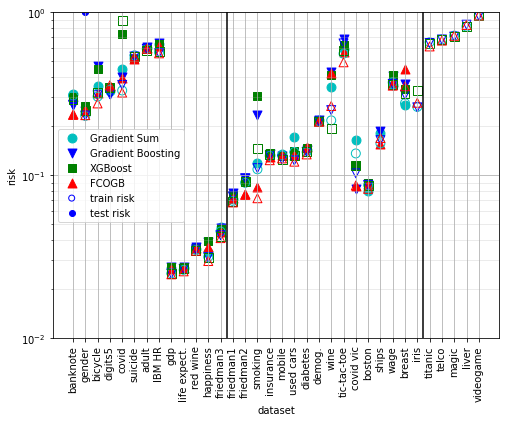

In [34]:
df6=df0
df7=df1.reindex([16,17,18,19,21,24,26,27,#28,29,30,31,33,
                0,1,2,3,4,5,6,7,10,11,12,13,15,22,25,#32,
                8,9,14,20,23])
# print(df7)
ax1=df7.plot.scatter(x='dataset', y='mwg_boosting_', marker='o', c='c',s=80,logy=True, grid=True, figsize=(8,6), 
                    label='Gradient Sum', legend=True, xlabel='dataset', ylabel='risk', rot=90, ylim=(0.01, 1))
ax2=df7.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax1, c='b', grid=True, label='Gradient Boosting',
                   xlabel='dataset', ylabel='risk', rot=90)
ax3=df7.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, c='g', grid=True, label='XGBoost',
                   xlabel='dataset', ylabel='risk', rot=90)
ax4=df7.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, c='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='risk', rot=90)
ax5=df6.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,c='none', edgecolors='c',  grid=True, ylabel='risk', ax=ax1,rot=90)
ax6=df6.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax1, c='none', edgecolors='b',ylabel='risk',  grid=True, rot=90)
ax7=df6.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, c='none', edgecolors='g',ylabel='risk',  grid=True,rot=90)
ax8=df6.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, c='none', edgecolors='r', ylabel='risk', grid=True,rot=90)
plt.scatter((1,2),(1,2), marker='o', c='none', edgecolors='b', label='train risk')
plt.scatter((1,2),(1,2), marker='o', c='blue', label='test risk')
plt.legend()
ax1.plot((12.5,12.5),(0.001, 1),c='k')
ax1.plot((28.5,28.5),(0.001,1),c='k')
ax1.grid(which='minor', alpha=0.3)
plt.savefig('all_datasets_order_log.pdf', bbox_inches='tight',pad_inches=0.01)

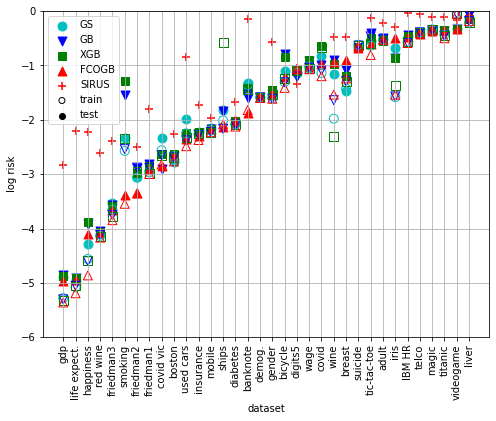

In [35]:
fig = plt.figure(figsize=(8,8))
gs = GridSpec(nrows=1, ncols=1)
ax0 = fig.add_subplot(gs[0, 0])
df2=pd_train_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
df3=pd_test_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
ax1=df3.plot.scatter(x='dataset', y='mwg_boosting_', marker='o', c='c',s=80,logy=False, ax=ax0, grid=True, figsize=(8,6), 
                    label='GS', legend=True, xlabel='dataset', ylabel='log risk', rot=90, ylim=(-6, 0))
ax2=df3.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,c='b', ax=ax0, grid=True, label='GB',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax3=df3.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,c='g', ax=ax0, grid=True, label='XGB',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax4=df3.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax0, c='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='log risk', rot=90)
df3.plot.scatter(x='dataset', y='sirus', marker='+',s=80, ax=ax0, c='r', grid=True, label='SIRUS',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax5=df2.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,c='none', edgecolors='c',  grid=True, ylabel='log risk', ax=ax1,rot=90)
ax6=df2.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax0, c='none', edgecolors='b',ylabel='log risk',  grid=True, rot=90)
ax7=df2.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax0, c='none', edgecolors='g',ylabel='log risk',  grid=True,rot=90)
ax8=df2.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax0, c='none', edgecolors='r', ylabel='log risk', grid=True,rot=90)
plt.scatter((1,2),(1,2), marker='o', c='none', edgecolors='k', label='train')
plt.scatter((1,2),(1,2), marker='o', c='k', label='test')
plt.legend()
ax1.grid(which='minor', alpha=0.3)
# plt.savefig('all_datasets_order_log.pdf', bbox_inches='tight',pad_inches=0.01)
# ax3 = fig.add_axes([0.55, 0.22, 0.3, 0.4])
# # plt.figure(figsize=(4,4))
# ax3.plot((0,3039),(0,3039))
# ax3.scatter(time_csv[['FCOGB']], time_csv[['XGBoost']], c='lightgreen', edgecolor='darkgreen', marker='s', label='XGB', alpha=0.7)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['GB']], c='violet', edgecolor='darkred', marker='o', label='GB', alpha=0.7)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['GS']], c='darkblue', marker='x', label='GS', alpha=0.7)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['SIRUS']], c='orange', edgecolor='red', marker='v', label='SIRUS', alpha=0.7)
# ax3.set_xscale('log')
# ax3.set_yscale('log')
# ax3.set_xlabel('$T_{FCOGB}$')
# ax3.set_ylabel('$T_{Other}$')
# ax3.legend()
# ax3.grid(which='minor', alpha=0.3)
# ax3.grid(which='major', alpha=1)

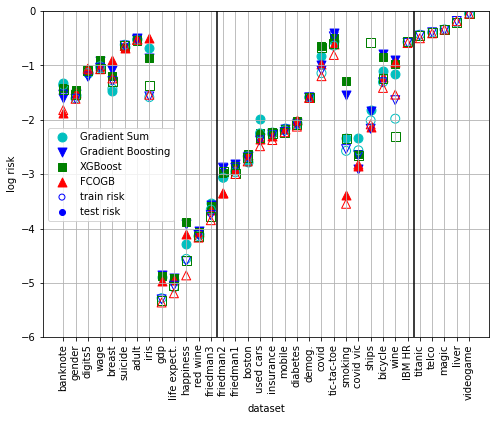

In [36]:
df4=df2#.reindex([15,16,18,19,21,24,26,27,28,29,30,31,33,
    #0,1,2,3,4,6,7,9,10,11,12,14,17,22,25,32,
#5,8,13,20,23])
df5=df3.reindex([15,17,19,20,23, 24,26,27,#28,29,30,31,33,
    0,1,2,3,4,6,7,9,10,11,12,14,16,21,25,#32,
5,8,13,18,22])
ax1=df5.plot.scatter(x='dataset', y='mwg_boosting_', marker='o', c='c',s=80,logy=False, grid=True, figsize=(8,6), 
                    label='Gradient Sum', legend=True, xlabel='dataset', ylabel='log risk', rot=90, ylim=(-6, 0))
ax2=df5.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax1, c='b', grid=True, label='Gradient Boosting',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax3=df5.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, c='g', grid=True, label='XGBoost',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax4=df5.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, c='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax5=df4.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,c='none', edgecolors='c',  grid=True, ylabel='log risk', ax=ax1,rot=90)
ax6=df4.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax1, c='none', edgecolors='b',ylabel='log risk',  grid=True, rot=90)
ax7=df4.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, c='none', edgecolors='g',ylabel='log risk',  grid=True,rot=90)
ax8=df4.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, c='none', edgecolors='r', ylabel='log risk', grid=True,rot=90)
plt.scatter((1,2),(1,2), marker='o', c='none', edgecolors='b', label='train risk')
plt.scatter((1,2),(1,2), marker='o', c='blue', label='test risk')
plt.legend()
ax1.plot((12.5,12.5),(-6, 2),c='k')
ax1.plot((28.5,28.5),(-6,2),c='k')
ax1.grid(which='minor', alpha=0.3)
plt.savefig('all_datasets_order_log.pdf', bbox_inches='tight',pad_inches=0.01)

### T Test
#### Normal scale, for complexity levels

In [37]:
delta = 0.05
noh = 6
delta_corr = delta/noh
margins = [0, 0.001, 0.01]

In [38]:
risk_avg_g=pd_train_normal['gpe_boosting_'].to_numpy()
risk_avg_x=pd_train_normal['xgb_keep_'].to_numpy()
risk_avg_s=pd_train_normal['mwg_boosting_'].to_numpy()
risk_avg_o=pd_train_normal['orth_fc_Newton-CG'].to_numpy()
# risk_avg_og=pd_train_normal['orth_fc_Newton-CG*'].to_numpy()
risk_avg_g_test=pd_test_normal['gpe_boosting_'].to_numpy()
risk_avg_x_test=pd_test_normal['xgb_keep_'].to_numpy()
risk_avg_s_test=pd_test_normal['mwg_boosting_'].to_numpy()
risk_avg_o_test=pd_test_normal['orth_fc_Newton-CG'].to_numpy()
# risk_avg_og_test=pd_test_normal['orth_fc_Newton-CG*'].to_numpy()

In [39]:
tests = [['R_O_avg < R_S_avg', risk_avg_o, risk_avg_s],
         ['R_O_avg < R_G_avg', risk_avg_o, risk_avg_g],
         ['R_O_avg < R_X_avg', risk_avg_o, risk_avg_x],
#          ['R_O_avg < R_X_avg', risk_avg_o, risk_avg_og],
         ['R_O_avg_test < R_S_avg_test', risk_avg_o_test, risk_avg_s_test],
         ['R_O_avg_test < R_G_avg_test', risk_avg_o_test, risk_avg_g_test],
         ['R_O_avg_test < R_X_avg_test', risk_avg_o_test, risk_avg_x_test],
#          ['R_O_avg_test < R_OG_avg_test', risk_avg_o_test, risk_avg_og_test],
        ]

for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
    print()

R_O_avg < R_S_avg
margin 0: 	1.7356482153691528e-07 	 True
margin 0.001: 	4.50156932215439e-06 	 True
margin 0.01: 	0.9993222381808354 	 False

R_O_avg < R_G_avg
margin 0: 	4.193475555061093e-09 	 True
margin 0.001: 	7.648066132935744e-08 	 True
margin 0.01: 	0.8747872852885696 	 False

R_O_avg < R_X_avg
margin 0: 	1.945845614305808e-23 	 True
margin 0.001: 	6.822499747075778e-23 	 True
margin 0.01: 	2.0118794290993742e-17 	 True

R_O_avg_test < R_S_avg_test
margin 0: 	0.7586044803783254 	 False
margin 0.001: 	0.9054438245834366 	 False
margin 0.01: 	0.9999999964028862 	 False

R_O_avg_test < R_G_avg_test
margin 0: 	1.0535525278466048e-07 	 True
margin 0.001: 	1.1681144851647238e-06 	 True
margin 0.01: 	0.7780402054969857 	 False

R_O_avg_test < R_X_avg_test
margin 0: 	8.255358251766467e-17 	 True
margin 0.001: 	3.4780212495116785e-16 	 True
margin 0.01: 	4.4877200408731107e-10 	 True



In [40]:
# # Greedy
# tests = [['R_O_avg < R_S_avg', risk_avg_og, risk_avg_s],
#          ['R_O_avg < R_G_avg', risk_avg_og, risk_avg_g],
#          ['R_O_avg < R_X_avg', risk_avg_og, risk_avg_x],
#          ['R_O_avg_test < R_S_avg_test', risk_avg_og_test, risk_avg_s_test],
#          ['R_O_avg_test < R_G_avg_test', risk_avg_og_test, risk_avg_g_test],
#          ['R_O_avg_test < R_X_avg_test', risk_avg_og_test, risk_avg_x_test],
#         ]

# for n, a, b in tests:
#     print(n)
#     alter = 'less'
#     for m in margins:
#         print('margin', m, end=': \t')
#         avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
#         print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
#     print()

In [41]:
# risk_avg_og_test, risk_avg_g_test

#### Compare min of other algorithms with FCOGB

In [42]:
risk_avg_orth=pd_train_normal['orth_fc_Newton-CG'].to_numpy()
risk_avg_other=pd_train_normal[['mwg_boosting_', 'gpe_boosting_', 'xgb_keep_']].to_numpy().min(axis=1)
tests = [['R_Orth_avg < Min_R_Other_avg', risk_avg_orth, risk_avg_other]]
for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
    print()

R_Orth_avg < Min_R_Other_avg
margin 0: 	1.5545215031161372e-05 	 True
margin 0.001: 	0.00022729009987910596 	 True
margin 0.01: 	0.9997193661987138 	 False



#### Normal scale, for datasets

In [43]:
risk_avg_g=pd_train_normal_dataset['gpe_boosting_'].to_numpy()
risk_avg_x=pd_train_normal_dataset['xgb_keep_'].to_numpy()
risk_avg_s=pd_train_normal_dataset['mwg_boosting_'].to_numpy()
risk_avg_o=pd_train_normal_dataset['orth_fc_Newton-CG'].to_numpy()
# risk_avg_og=pd_train_normal_dataset['orth_fc_Newton-CG*'].to_numpy()
risk_avg_g_test=pd_test_normal_dataset['gpe_boosting_'].to_numpy()
risk_avg_x_test=pd_test_normal_dataset['xgb_keep_'].to_numpy()
risk_avg_s_test=pd_test_normal_dataset['mwg_boosting_'].to_numpy()
risk_avg_o_test=pd_test_normal_dataset['orth_fc_Newton-CG'].to_numpy()
# risk_avg_og_test=pd_test_normal_dataset['orth_fc_Newton-CG*'].to_numpy()

In [44]:
tests = [['R_O_avg < R_S_avg', risk_avg_o, risk_avg_s],
         ['R_O_avg < R_G_avg', risk_avg_o, risk_avg_g],
         ['R_O_avg < R_X_avg', risk_avg_o[:-5], risk_avg_x[:-5]],
#          ['R_O_avg < R_OG_avg', risk_avg_o, risk_avg_og],
         ['R_O_avg_test < R_S_avg_test', risk_avg_o_test, risk_avg_s_test],
         ['R_O_avg_test < R_G_avg_test', risk_avg_o_test, risk_avg_g_test],
         ['R_O_avg_test < R_X_avg_test', risk_avg_o_test[:-5], risk_avg_x_test[:-5]],
#          ['R_O_avg_test < R_OG_avg_test', risk_avg_o_test, risk_avg_og_test],
        ]

for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
    print()

R_O_avg < R_S_avg
margin 0: 	0.08938585976923978 	 False
margin 0.001: 	0.12708768476292284 	 False
margin 0.01: 	0.7734011003942236 	 False

R_O_avg < R_G_avg
margin 0: 	0.054768186025530644 	 False
margin 0.001: 	0.07748236391073665 	 False
margin 0.01: 	0.5965238340801794 	 False

R_O_avg < R_X_avg
margin 0: 	0.13397128245667664 	 False
margin 0.001: 	0.1787114451384303 	 False
margin 0.01: 	0.7891727877287438 	 False

R_O_avg_test < R_S_avg_test
margin 0: 	0.5357602846554407 	 False
margin 0.001: 	0.585020406311766 	 False
margin 0.01: 	0.906996252650939 	 False

R_O_avg_test < R_G_avg_test
margin 0: 	0.18085741641935216 	 False
margin 0.001: 	0.2085569287117373 	 False
margin 0.01: 	0.5422232930962401 	 False

R_O_avg_test < R_X_avg_test
margin 0: 	0.6646628496541824 	 False
margin 0.001: 	0.708330067870796 	 False
margin 0.01: 	0.948133066809144 	 False



In [45]:
# # Greedy
# tests = [['R_O_avg < R_S_avg', risk_avg_og, risk_avg_s],
#          ['R_O_avg < R_G_avg', risk_avg_og, risk_avg_g],
#          ['R_O_avg < R_X_avg', risk_avg_og, risk_avg_x],
#          ['R_O_avg_test < R_S_avg_test', risk_avg_og_test, risk_avg_s_test],
#          ['R_O_avg_test < R_G_avg_test', risk_avg_og_test, risk_avg_g_test],
#          ['R_O_avg_test < R_X_avg_test', risk_avg_og_test, risk_avg_x_test],
#         ]

# for n, a, b in tests:
#     print(n)
#     alter = 'less'
#     for m in margins:
#         print('margin', m, end=': \t')
#         avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
#         print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
#     print()

#### log scale, for complexity levels

In [46]:
risk_avg_g=pd_train_log['gpe_boosting_'].to_numpy()
risk_avg_x=pd_train_log['xgb_keep_'].to_numpy()
risk_avg_s=pd_train_log['mwg_boosting_'].to_numpy()
risk_avg_o=pd_train_log['orth_fc_Newton-CG'].to_numpy()
# risk_avg_og=pd_train_log['orth_fc_Newton-CG*'].to_numpy()
risk_avg_g_test=pd_test_log['gpe_boosting_'].to_numpy()
risk_avg_x_test=pd_test_log['xgb_keep_'].to_numpy()
risk_avg_s_test=pd_test_log['mwg_boosting_'].to_numpy()
risk_avg_o_test=pd_test_log['orth_fc_Newton-CG'].to_numpy()
# risk_avg_og_test=pd_test_log['orth_fc_Newton-CG*'].to_numpy()

In [47]:
tests = [['R_O_avg < R_S_avg', risk_avg_o, risk_avg_s],
         ['R_O_avg < R_G_avg', risk_avg_o, risk_avg_g],
         ['R_O_avg < R_X_avg', risk_avg_o, risk_avg_x],
#          ['R_O_avg < R_OG_avg', risk_avg_o, risk_avg_og],
         ['R_O_avg_test < R_S_avg_test', risk_avg_o_test, risk_avg_s_test],
         ['R_O_avg_test < R_G_avg_test', risk_avg_o_test, risk_avg_g_test],
         ['R_O_avg_test < R_X_avg_test', risk_avg_o_test, risk_avg_x_test],
#          ['R_O_avg_test < R_OG_avg_test', risk_avg_o_test, risk_avg_og_test],
        ]

for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
    print()

R_O_avg < R_S_avg
margin 0: 	3.095049494391695e-24 	 True
margin 0.001: 	5.024931871190518e-24 	 True
margin 0.01: 	4.75366884908386e-22 	 True

R_O_avg < R_G_avg
margin 0: 	5.8617044047204236e-21 	 True
margin 0.001: 	9.157248450524335e-21 	 True
margin 0.01: 	5.87290246863518e-19 	 True

R_O_avg < R_X_avg
margin 0: 	5.275733782820314e-27 	 True
margin 0.001: 	7.01274150536538e-27 	 True
margin 0.01: 	9.712873953943303e-26 	 True

R_O_avg_test < R_S_avg_test
margin 0: 	1.2090589495293386e-12 	 True
margin 0.001: 	2.025027430934771e-12 	 True
margin 0.01: 	2.2974227992720753e-10 	 True

R_O_avg_test < R_G_avg_test
margin 0: 	8.227802953887943e-20 	 True
margin 0.001: 	1.226863811331074e-19 	 True
margin 0.01: 	5.001825110058915e-18 	 True

R_O_avg_test < R_X_avg_test
margin 0: 	7.070324706114654e-24 	 True
margin 0.001: 	9.31948841366879e-24 	 True
margin 0.01: 	1.1882302934804046e-22 	 True



In [48]:
# # Greedy
# tests = [['R_O_avg < R_S_avg', risk_avg_og, risk_avg_s],
#          ['R_O_avg < R_G_avg', risk_avg_og, risk_avg_g],
#          ['R_O_avg < R_X_avg', risk_avg_og, risk_avg_x],
#          ['R_O_avg_test < R_S_avg_test', risk_avg_og_test, risk_avg_s_test],
#          ['R_O_avg_test < R_G_avg_test', risk_avg_og_test, risk_avg_g_test],
#          ['R_O_avg_test < R_X_avg_test', risk_avg_og_test, risk_avg_x_test],
#         ]

# for n, a, b in tests:
#     print(n)
#     alter = 'less'
#     for m in margins:
#         print('margin', m, end=': \t')
#         avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
#         print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
#     print()

In [49]:
risk_avg_orth=pd_train_log['orth_fc_Newton-CG'].to_numpy()
risk_avg_other=pd_train_log[['mwg_boosting_', 'gpe_boosting_', 'xgb_keep_']].to_numpy().min(axis=1)
tests = [['R_Orth_avg < Min_R_Other_avg', risk_avg_orth, risk_avg_other]]
for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
    print()

R_Orth_avg < Min_R_Other_avg
margin 0: 	4.242514429795571e-20 	 True
margin 0.001: 	7.085730985330186e-20 	 True
margin 0.01: 	8.644693562715017e-18 	 True



#### Log scale for datasets

In [50]:
risk_avg_g=pd_train_log_dataset['gpe_boosting_'].to_numpy()
risk_avg_x=pd_train_log_dataset['xgb_keep_'].to_numpy()
risk_avg_s=pd_train_log_dataset['mwg_boosting_'].to_numpy()
risk_avg_o=pd_train_log_dataset['orth_fc_Newton-CG'].to_numpy()
# risk_avg_og=pd_train_log_dataset['orth_fc_Newton-CG*'].to_numpy()
risk_avg_g_test=pd_test_log_dataset['gpe_boosting_'].to_numpy()
risk_avg_x_test=pd_test_log_dataset['xgb_keep_'].to_numpy()
risk_avg_s_test=pd_test_log_dataset['mwg_boosting_'].to_numpy()
risk_avg_o_test=pd_test_log_dataset['orth_fc_Newton-CG'].to_numpy()
# risk_avg_og_test=pd_test_log_dataset['orth_fc_Newton-CG*'].to_numpy()

In [51]:
risk_avg_o_test

array([-0.33942034, -0.60378727, -0.49091987, -0.90246162, -0.93472378,
       -0.47876407, -0.42080998, -1.5149174 , -1.87148703, -0.11543603,
       -0.36781829, -0.50864752, -1.07216663, -2.28832738, -2.89687095,
       -3.33973937, -3.66184501, -1.00004235, -1.58492051, -4.96394706,
       -2.35049604, -1.99898371, -2.65510806, -4.10357844, -4.95393139,
       -2.1680175 , -0.67719394, -0.33024389, -4.06484897, -2.84314783,
       -0.97927052, -1.20652148, -2.12244473, -3.38912387])

In [52]:
tests = [['R_O_avg < R_S_avg', risk_avg_o, risk_avg_s],
         ['R_O_avg < R_G_avg', risk_avg_o, risk_avg_g],
         ['R_O_avg < R_X_avg', risk_avg_o, risk_avg_x],
#          ['R_O_avg < R_OG_avg', risk_avg_o, risk_avg_og],
         ['R_O_avg_test < R_S_avg_test', risk_avg_o_test, risk_avg_s_test],
         ['R_O_avg_test < R_G_avg_test', risk_avg_o_test, risk_avg_g_test],
         ['R_O_avg_test < R_X_avg_test', risk_avg_o_test, risk_avg_x_test],
#          ['R_O_avg_test < R_OG_avg_test', risk_avg_o_test, risk_avg_og_test],
        ]

for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
    print()

R_O_avg < R_S_avg
margin 0: 	0.010630918329103572 	 True
margin 0.001: 	0.011312291722120718 	 True
margin 0.01: 	0.01946808900251175 	 False

R_O_avg < R_G_avg
margin 0: 	0.005175134144612241 	 True
margin 0.001: 	0.00555189023177997 	 True
margin 0.01: 	0.010280656006528081 	 True

R_O_avg < R_X_avg
margin 0: 	0.01376898644383739 	 True
margin 0.001: 	0.014272684372319652 	 True
margin 0.01: 	0.019606504887630213 	 False

R_O_avg_test < R_S_avg_test
margin 0: 	0.08881478075330826 	 False
margin 0.001: 	0.09218781217407172 	 False
margin 0.01: 	0.1271256492552307 	 False

R_O_avg_test < R_G_avg_test
margin 0: 	0.04615251118562468 	 False
margin 0.001: 	0.047699554316227966 	 False
margin 0.01: 	0.06366674941824903 	 False

R_O_avg_test < R_X_avg_test
margin 0: 	0.029383513095228565 	 False
margin 0.001: 	0.0299847934577694 	 False
margin 0.01: 	0.035892742044289945 	 False



In [53]:
# # Greedy
# tests = [['R_O_avg < R_S_avg', risk_avg_og, risk_avg_s],
#          ['R_O_avg < R_G_avg', risk_avg_og, risk_avg_g],
#          ['R_O_avg < R_X_avg', risk_avg_og, risk_avg_x],
#          ['R_O_avg_test < R_S_avg_test', risk_avg_og_test, risk_avg_s_test],
#          ['R_O_avg_test < R_G_avg_test', risk_avg_og_test, risk_avg_g_test],
#          ['R_O_avg_test < R_X_avg_test', risk_avg_og_test, risk_avg_x_test],
#         ]

# for n, a, b in tests:
#     print(n)
#     alter = 'less'
#     for m in margins:
#         print('margin', m, end=': \t')
#         avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
#         print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
#     print()

In [54]:
pd_test_log_dataset

dataset  mwg_boosting_  gpe_boosting_  xgb_keep_  orth_fc_Newton-CG  \
0        titanic      -0.368528      -0.356358  -0.351873          -0.339420   
1    tic-tac-toe      -0.552668      -0.400001  -0.494969          -0.603787   
2           iris      -0.684011      -0.867700  -0.858955          -0.490920   
3         breast      -1.461250      -1.085979  -1.194259          -0.902462   
4           wine      -1.147656      -0.906210  -0.971270          -0.934724   
5         IBM HR      -0.449918      -0.440196  -0.455985          -0.478764   
6          telco      -0.415559      -0.398048  -0.416959          -0.420810   
7         gender      -1.542894      -1.522659  -1.456474          -1.514917   
8       banknote      -1.327024      -1.598039  -1.407063          -1.871487   
9          liver      -0.128332      -0.074235  -0.136455          -0.115436   
10         magic      -0.364798      -0.371365  -0.372177          -0.367818   
11         adult      -0.511822      -0.496255  -0.520514          -0.508648   
12       digits5      -1.144277      -1.189654  -1.101879          -1.072167   
13     insurance      -2.230114      -2.237111  -2.216883          -2.288327   
14     friedman1      -2.920302      -2.806295  -2.856778          -2.896871   
15     friedman2      -3.054238      -2.882875  -2.968417          -3.339739   
16     friedman3      -3.523526      -3.566484  -3.586507          -3.661845   
17          wage      -1.048344      -0.917260  -0.900185          -1.000042   
18        demog.      -1.576221      -1.573676  -1.571530          -1.584921   
19           gdp      -4.894788      -4.862185  -4.869652          -4.963947   
20     used cars      -1.977412      -2.327205  -2.240019          -2.350496   
21      diabetes      -2.059599      -2.059770  -2.026731          -1.998984   
22        boston      -2.782149      -2.673565  -2.633707          -2.655108   
23     happiness      -4.278758      -3.907322  -3.886020          -4.103578   
24  life expect.      -4.938185      -4.909596  -4.914450          -4.953931   
25        mobile      -2.158912      -2.174157  -2.173911          -2.168018   
26       suicide      -0.658835      -0.671453  -0.670253          -0.677194   
27     videogame      -0.330252      -0.330249  -0.330254          -0.330244   
28      red wine      -4.101025      -4.047965  -4.056310          -4.064849   
29     covid vic      -2.334992      -2.911011  -2.631060          -2.843148   
30         covid      -0.831750      -0.989803  -0.635816          -0.979271   
31       bicycle      -1.093605      -0.790252  -0.844036          -1.206521   
32         ships      -1.825235      -1.831925   0.666305          -2.122445   
33       smoking      -2.326639      -1.547617  -1.285437          -3.389124   

          sirus  
0     -0.112050  
1     -0.122168  
2     -0.294371  
3     -0.466809  
4     -0.476424  
5     -0.026344  
6     -0.056570  
7     -0.562119  
8     -0.153151  
9     -0.086648  
10    -0.102033  
11    -0.220647  
12    -1.339411  
13    -1.731606  
14    -1.801810  
15    -2.501036  
16    -2.385967  
17    -1.075873  
18    -1.565421  
19    -2.832026  
20    -0.850971  
21    -1.671313  
22    -2.253795  
23    -2.216407  
24    -2.207275  
25    -1.966113  
26    -0.665532  
27    -0.162519  
28    -2.617296  
29  1000.000000  
30  1000.000000  
31  1000.000000  
32  1000.000000  
33  1000.000000

In [55]:
risk_avg_o

array([-0.498512  , -0.80615307, -1.53806841, -1.23803652, -1.53548259,
       -0.58707792, -0.40753291, -1.61207991, -1.81993687, -0.18409159,
       -0.3394243 , -0.52882048, -1.05887136, -2.37138078, -2.99532678,
       -3.35252277, -3.84569329, -1.0687652 , -1.59794478, -5.35946405,
       -2.48452264, -2.12442243, -2.76415687, -4.86136911, -5.18981597,
       -2.22672018, -0.63918047, -0.04809142, -4.16625667, -2.82192837,
       -1.19654595, -1.41227522, -2.08302835, -3.5439965 ])

In [56]:
risk_avg_x

array([-0.4543526 , -0.59545849, -1.37267722, -1.30210933, -2.30255049,
       -0.56408219, -0.39635448, -1.52731936, -1.44240677, -0.21041367,
       -0.34627448, -0.54312019, -1.09939947, -2.24804712, -2.98893769,
       -2.95451086, -3.78442602, -1.04733211, -1.58897572, -5.31528296,
       -2.32295923, -2.08213475, -2.6996074 , -4.58619564, -5.05617375,
       -2.22676856, -0.63247692, -0.04808978, -4.14616695, -2.64913263,
       -0.66681791, -1.24464543, -0.57202628, -2.3487227 ])

In [57]:
trains_normal

dataset  mwg_boosting_1  mwg_boosting_2  mwg_boosting_3  \
0                     titanic             1.0        0.966067        0.820431   
1                 tic-tac-toe             1.0        0.930454        0.853816   
2                        iris             1.0        0.910153        0.791164   
3               breast_cancer             1.0        0.946641        0.573033   
4                   load_wine             1.0        0.958921        0.671198   
5                      IBM_HR             1.0        0.617448        0.617448   
6                 telco_churn             1.0        0.834035        0.834035   
7           GenderRecognition             1.0        0.999820        0.618670   
8                    banknote             1.0        0.993383        0.805219   
9                       liver             1.0        0.984867        0.966966   
10                      magic             1.0        0.935202        0.804558   
11                      adult             1.0        0.809681        0.809681   
12                    digits5             1.0        0.474192        0.474192   
13                  insurance             1.0        0.460388        0.460388   
14             make_friedman1             1.0        0.100860        0.100860   
15             make_friedman2             1.0        0.376654        0.376654   
16             make_friedman3             1.0        0.051412        0.051412   
17                       wage             1.0        0.486353        0.486353   
18               Demographics             1.0        0.242670        0.242670   
19                        gdp             1.0        0.011941        0.011941   
20                  used_cars             1.0        0.448655        0.448655   
21              load_diabetes             1.0        0.199131        0.199131   
22                     boston             1.0        0.146664        0.146664   
23  world_happiness_indicator             1.0        0.041066        0.041066   
24        who_life_expectancy             1.0        0.015813        0.015813   
25              mobile_prices             1.0        0.358466        0.358466   
26      suicide_rates_cleaned             1.0        0.691383        0.691383   
27             videogamesales             1.0        0.953213        0.953213   
28           red_wine_quality             1.0        0.019963        0.019963   
29                  covid_vic             1.0        1.000000        1.000000   
30                      covid             1.0        0.502013        0.502013   
31                    bicycle             1.0        1.000000        0.697616   
32                      ships             1.0        0.395777        0.395777   
33                    smoking             1.0        0.332525        0.332525   

    mwg_boosting_4  mwg_boosting_5  mwg_boosting_6  mwg_boosting_7  \
0         0.820431        0.820431        0.726574        0.726574   
1         0.853816        0.835272        0.835272        0.835272   
2         0.791164        0.791164        0.441721        0.377648   
3         0.573033        0.573033        0.573033        0.573033   
4         0.671198        0.671198        0.406043        0.406043   
5         0.599924        0.594705        0.594705        0.590632   
6         0.834035        0.783547        0.783547        0.783547   
7         0.618670        0.271551        0.271551        0.239502   
8         0.805219        0.805219        0.471263        0.471263   
9         0.966966        0.966966        0.915838        0.915838   
10        0.804558        0.773718        0.773718        0.773718   
11        0.722676        0.722676        0.630945        0.630945   
12        0.446002        0.438307        0.438307        0.414037   
13        0.228716        0.228716        0.159996        0.159996   
14        0.089756        0.089756        0.068793        0.068793   
15        0.376654        0.235146        0.235146        0.148927

In [58]:
train_datasets={}
test_datasets={}
j=-1
for dataset in datasets:
    j+=1
    train_datasets[dataset]={}
    test_datasets[dataset]={}
    for algo in algo_names:
#         print(algo)
        if j==j:
            train_datasets[dataset][algo]=[(trains_normal[[algo+str(i) for i in range(1, 50)]].iloc[j])]
            test_datasets[dataset][algo]=[(tests_normal[[algo+str(i) for i in range(1, 50)]].iloc[j])]
        else:
            train_datasets[dataset][algo].append(trains_normal[[algo+str(i) for i in range(1, 50)]].iloc[j])
            test_datasets[dataset][algo].append(tests_normal[[algo+str(i) for i in range(1, 50)]].iloc[j])

titanic mwg_boosting_ 0.6540074387876957 0.6959256744766569
titanic gpe_boosting_ 0.6469608404097955 0.7059439244445501
titanic xgb_keep_ 0.6448367722088684 0.7089972184662248
titanic orth_fc_Newton-CG 0.6160743071356216 0.7168305514759218


/tmp/ipykernel_1019/1577431049.py:32: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.gca().set_ylim(bottom=0)


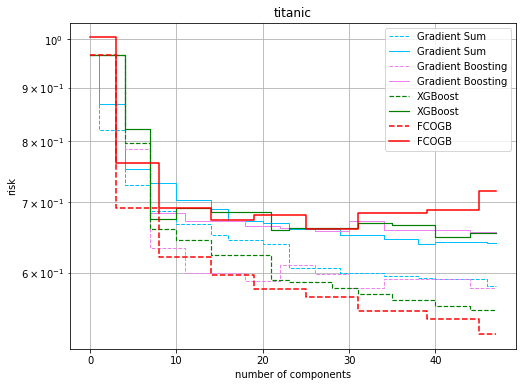

tic-tac-toe mwg_boosting_ 0.5564322789594874 0.5979644979950707
tic-tac-toe gpe_boosting_ 0.6429790974321232 0.6836318575066926
tic-tac-toe xgb_keep_ 0.5785245343665387 0.6294592037129099
tic-tac-toe orth_fc_Newton-CG 0.492558367589728 0.5657371931857984


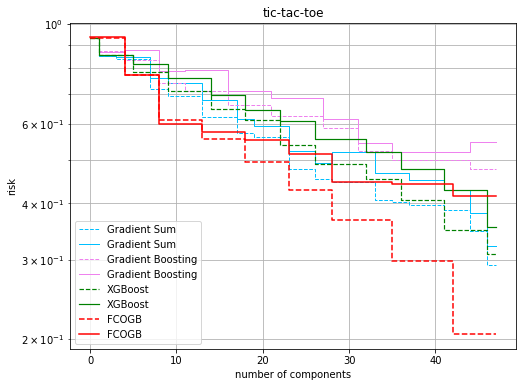

iris mwg_boosting_ 0.2623809625156815 0.5222212394100594
iris gpe_boosting_ 0.26084588796643265 0.43812641130343133
iris xgb_keep_ 0.33057874269500986 0.4552369146431709
iris orth_fc_Newton-CG 0.27814674373146675 0.6274054246585601


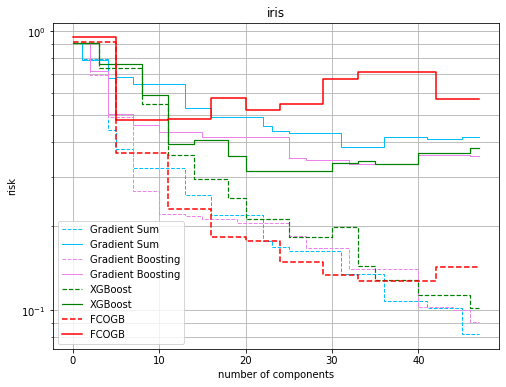

breast_cancer mwg_boosting_ 0.27674925085086877 0.2686573251648128
breast_cancer gpe_boosting_ 0.3112177931385476 0.36231425107762116
breast_cancer xgb_keep_ 0.31583380569836805 0.3399844323837123
breast_cancer orth_fc_Newton-CG 0.3512613960656178 0.4459434996953847


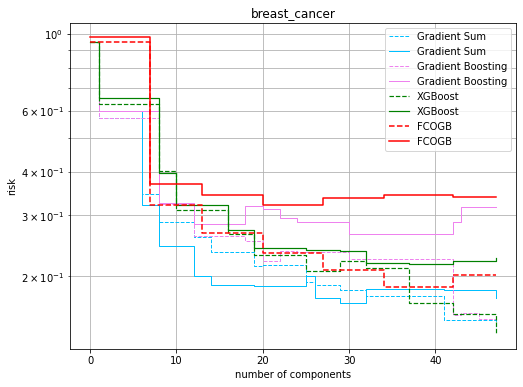

load_wine mwg_boosting_ 0.216919952791529 0.34750561057425317
load_wine gpe_boosting_ 0.2507927706663135 0.43095111197354685
load_wine xgb_keep_ 0.19406362241615804 0.40917938078245963
load_wine orth_fc_Newton-CG 0.26558576031224246 0.421694472164332


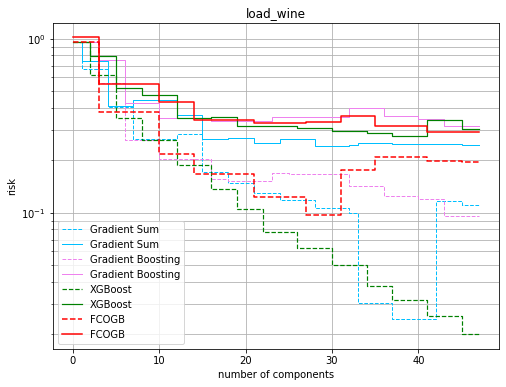

IBM_HR mwg_boosting_ 0.5676340538751103 0.639843344794221
IBM_HR gpe_boosting_ 0.5611428049871149 0.6459004248736104
IBM_HR xgb_keep_ 0.571716082251292 0.6360760294526152
IBM_HR orth_fc_Newton-CG 0.5589564283063193 0.6219014459611015


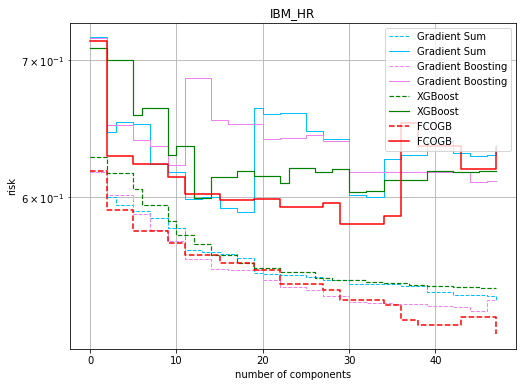

telco_churn mwg_boosting_ 0.679914584350224 0.6640181101295962
telco_churn gpe_boosting_ 0.6798499207480001 0.6742658198240101
telco_churn xgb_keep_ 0.675252494592053 0.662199328423434
telco_churn orth_fc_Newton-CG 0.6689553834212763 0.6604415639673861


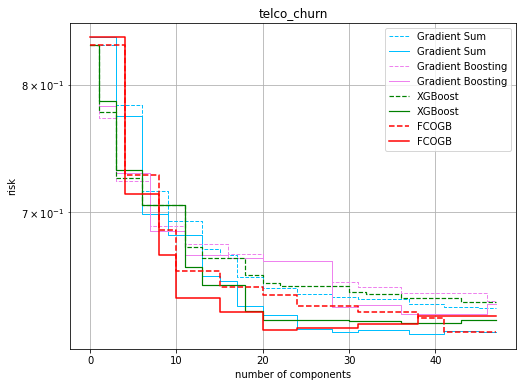

GenderRecognition mwg_boosting_ 0.2311306000208204 0.24449968531294952
GenderRecognition gpe_boosting_ 0.23224615183022346 0.24929497432406794
GenderRecognition xgb_keep_ 0.24980435234385104 0.26480113540169253
GenderRecognition orth_fc_Newton-CG 0.23348334117439498 0.25097251323957465


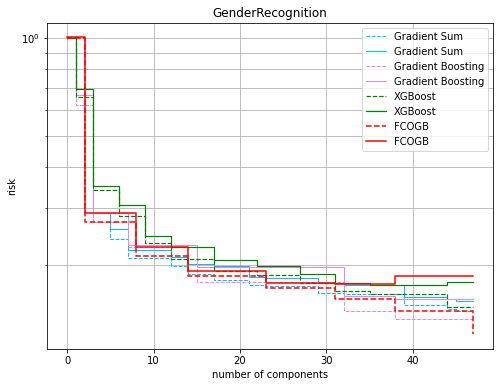

banknote mwg_boosting_ 0.3083147700842195 0.31581690072314983
banknote gpe_boosting_ 0.27085575904189735 0.2690569869903471
banknote xgb_keep_ 0.29267068352389153 0.30160342975806287
banknote orth_fc_Newton-CG 0.23429399466964634 0.23572366657697794


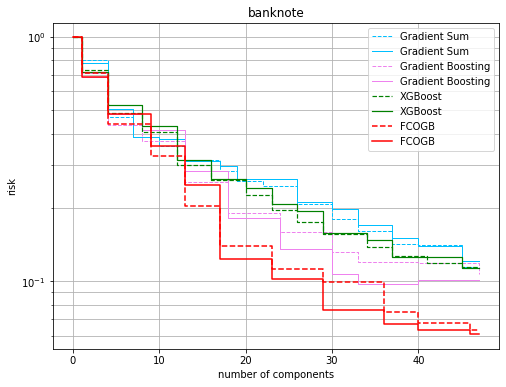

liver mwg_boosting_ 0.8156376212854214 0.8808830988722808
liver gpe_boosting_ 0.8376242002219352 0.9289031305403399
liver xgb_keep_ 0.8158669433255749 0.8734327370188053
liver orth_fc_Newton-CG 0.8344839647236229 0.8915543879373801


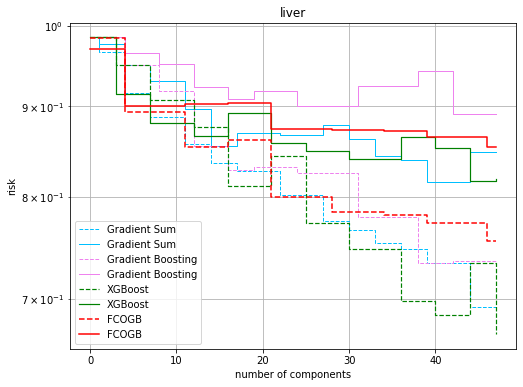

magic mwg_boosting_ 0.7175791573123519 0.6970869455255949
magic gpe_boosting_ 0.7079579078499189 0.692424696120177
magic xgb_keep_ 0.7098529830239434 0.6920338262167623
magic orth_fc_Newton-CG 0.7156400942873521 0.6960661674648937


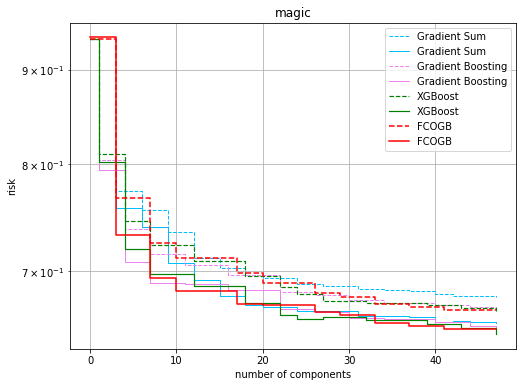

adult mwg_boosting_ 0.5950532806815508 0.6035974284510861
adult gpe_boosting_ 0.5961221456032794 0.6118709609989529
adult xgb_keep_ 0.5848586220656137 0.5977075657153444
adult orth_fc_Newton-CG 0.5955689758730255 0.6069342800135558


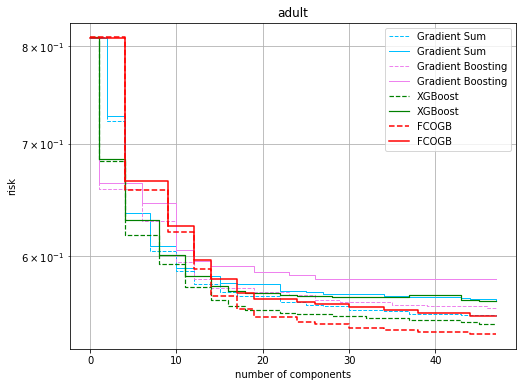

digits5 mwg_boosting_ 0.33395377657281694 0.33015546476154467
digits5 gpe_boosting_ 0.3138803557685353 0.3151392384913183
digits5 xgb_keep_ 0.3451828732583778 0.34253232129437056
digits5 orth_fc_Newton-CG 0.35603964190957316 0.35025794734808574


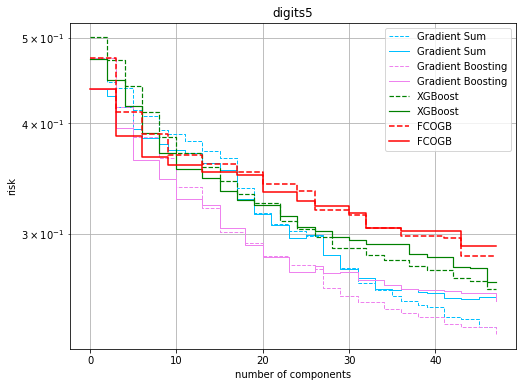

insurance mwg_boosting_ 0.13159353547908348 0.1329514113957213
insurance gpe_boosting_ 0.13241571470977034 0.13588934009278833
insurance xgb_keep_ 0.1343922145666202 0.1378119959769766
insurance orth_fc_Newton-CG 0.12361429177385745 0.1287377369235675


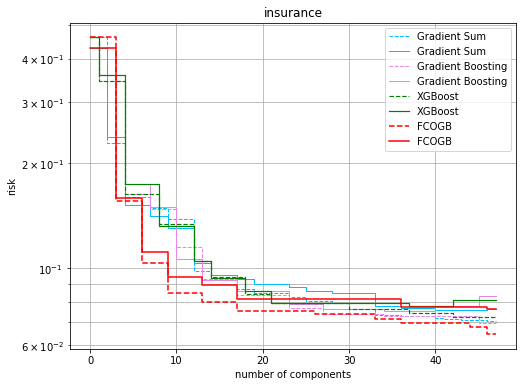

make_friedman1 mwg_boosting_ 0.06950340555672366 0.07165956283587895
make_friedman1 gpe_boosting_ 0.0742855127773344 0.07781423870978621
make_friedman1 xgb_keep_ 0.06865182545131598 0.07511565683648701
make_friedman1 orth_fc_Newton-CG 0.06808655125237095 0.07292244263371836


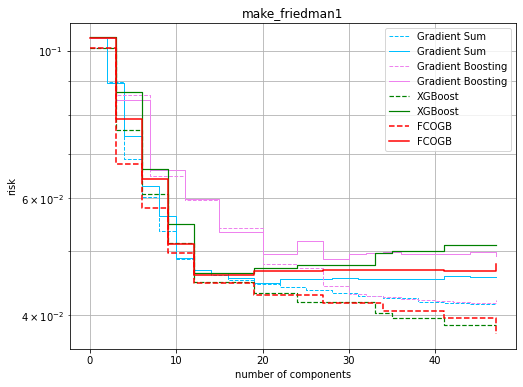

make_friedman2 mwg_boosting_ 0.08992136896853356 0.09112331555720685
make_friedman2 gpe_boosting_ 0.09580077443025545 0.09630027325363621
make_friedman2 xgb_keep_ 0.09195555070758085 0.09189048503349301
make_friedman2 orth_fc_Newton-CG 0.07576939299005052 0.07705579456746485


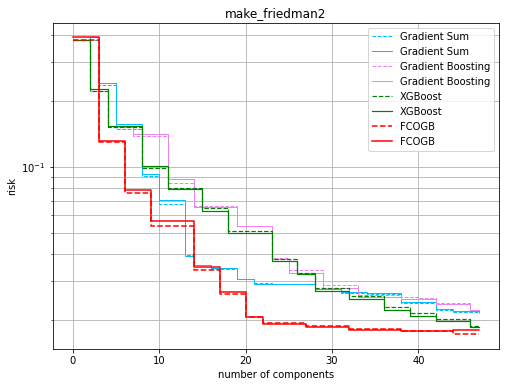

make_friedman3 mwg_boosting_ 0.04518347962039011 0.04835729175264942
make_friedman3 gpe_boosting_ 0.04287387575837981 0.04715447963614283
make_friedman3 xgb_keep_ 0.042317654484164684 0.046704021263669515
make_friedman3 orth_fc_Newton-CG 0.04114630266839799 0.044952018793311566


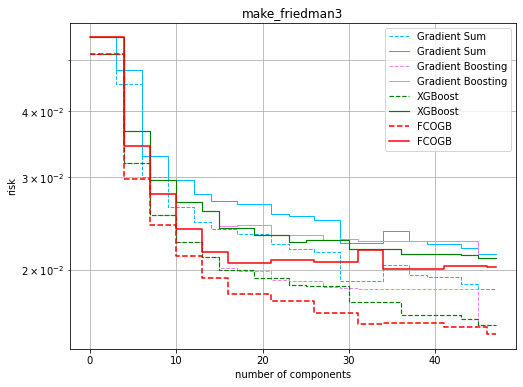

wage mwg_boosting_ 0.3705758523046164 0.3582117201513419
wage gpe_boosting_ 0.3635514093736229 0.4058889159273451
wage xgb_keep_ 0.3607589207246878 0.4122525750204168
wage orth_fc_Newton-CG 0.3541711780693189 0.3752931390445657


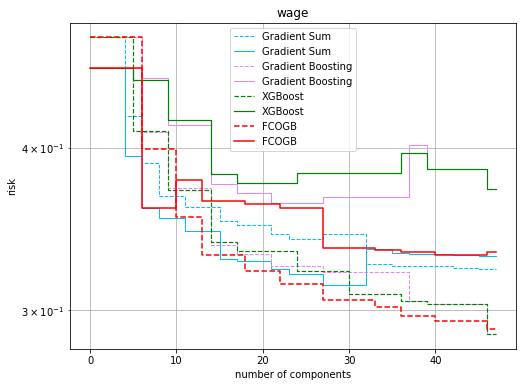

Demographics mwg_boosting_ 0.21476723610567633 0.21662435830936752
Demographics gpe_boosting_ 0.21411544695031698 0.2171213889470489
Demographics xgb_keep_ 0.21411400431017533 0.2175444576811382
Demographics orth_fc_Newton-CG 0.21234756068557714 0.21488559777809352


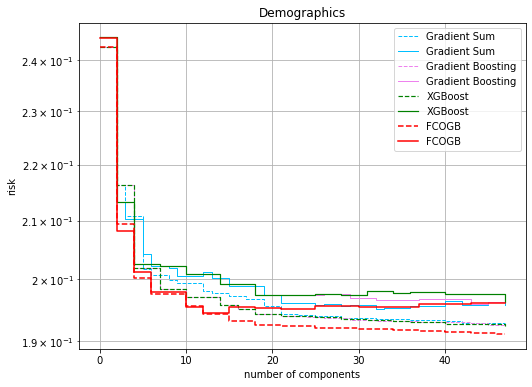

gdp mwg_boosting_ 0.02501466097492185 0.02715608494647196
gdp gpe_boosting_ 0.024911237612302604 0.02736000857977059
gdp xgb_keep_ 0.02489023599215447 0.027298688914962385
gdp orth_fc_Newton-CG 0.02467542565983355 0.026706628304690616


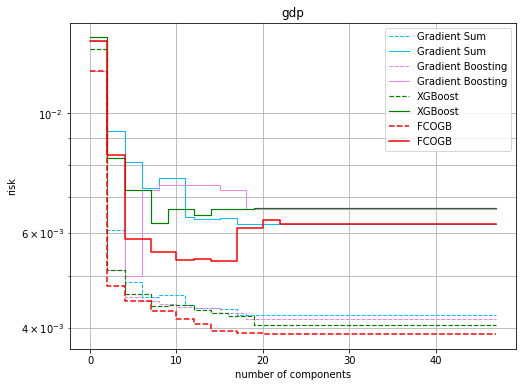

used_cars mwg_boosting_ 0.1388882972949428 0.1711898010327117
used_cars gpe_boosting_ 0.12317528651152418 0.13134574906870394
used_cars xgb_keep_ 0.13166417136483194 0.14134773490828298
used_cars orth_fc_Newton-CG 0.12105675812390657 0.13397896228395048


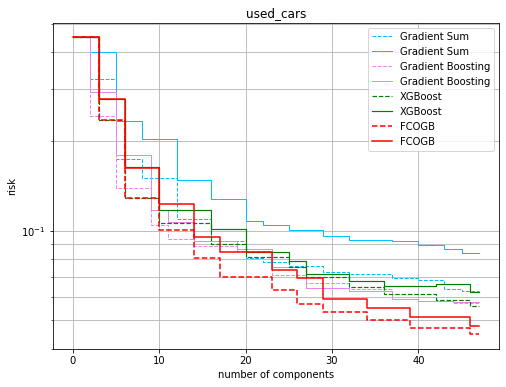

load_diabetes mwg_boosting_ 0.13866829249093623 0.14192458165663338
load_diabetes gpe_boosting_ 0.13911900792507892 0.14303998060160902
load_diabetes xgb_keep_ 0.13965909727582246 0.14680539878459223
load_diabetes orth_fc_Newton-CG 0.13413055911745447 0.14926170574579023


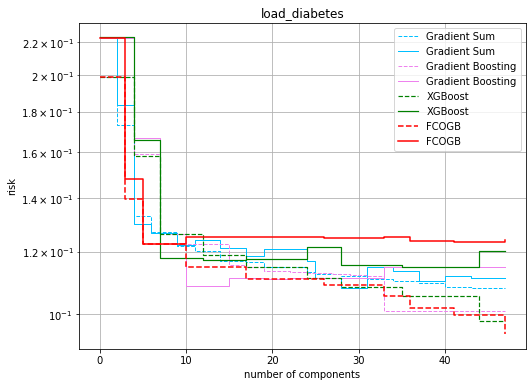

boston mwg_boosting_ 0.08712451648443213 0.07966039893309908
boston gpe_boosting_ 0.0872853094165602 0.08731182845181945
boston xgb_keep_ 0.08625583504263368 0.08924260010024171
boston orth_fc_Newton-CG 0.08248363474302034 0.08787741309197554


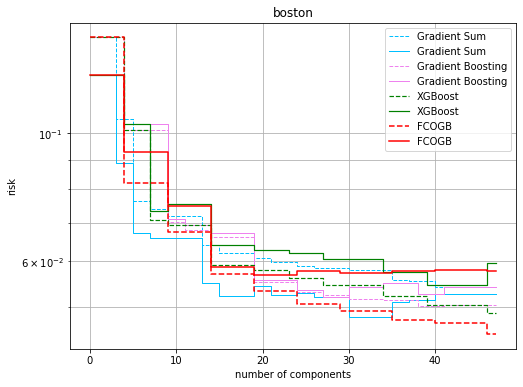

world_happiness_indicator mwg_boosting_ 0.031533590127909066 0.03374990601224066
world_happiness_indicator gpe_boosting_ 0.03143627998699086 0.039185353760150796
world_happiness_indicator xgb_keep_ 0.031235159998186005 0.0393943066138324
world_happiness_indicator orth_fc_Newton-CG 0.029768411954199648 0.03632589035892532


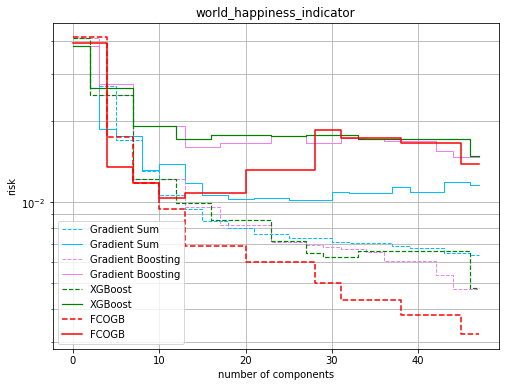

who_life_expectancy mwg_boosting_ 0.026273536737545546 0.02701792161961453
who_life_expectancy gpe_boosting_ 0.02665727567411293 0.027393395694629535
who_life_expectancy xgb_keep_ 0.026637465296390387 0.027368379522668535
who_life_expectancy orth_fc_Newton-CG 0.025740989822884083 0.026908119449251738


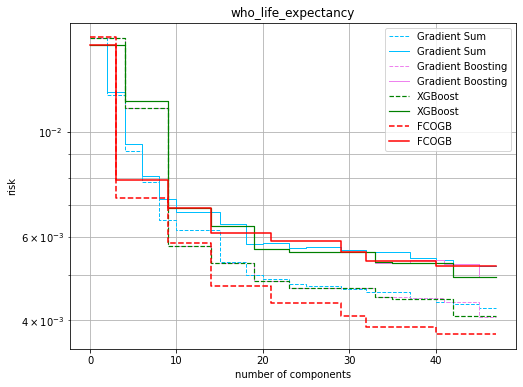

mobile_prices mwg_boosting_ 0.13224780591194507 0.13501670113580533
mobile_prices gpe_boosting_ 0.12486964887803664 0.13038957243507832
mobile_prices xgb_keep_ 0.12472154065882647 0.1304142552539717
mobile_prices orth_fc_Newton-CG 0.12679000747858066 0.13253261433908467


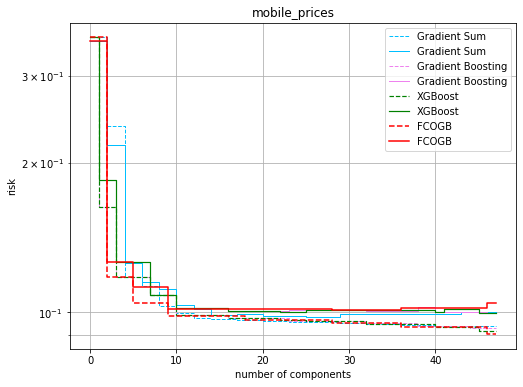

suicide_rates_cleaned mwg_boosting_ 0.543333255227174 0.521954953228882
suicide_rates_cleaned gpe_boosting_ 0.5345586594974714 0.5149652761117097
suicide_rates_cleaned xgb_keep_ 0.5349245940409568 0.5155672735429073
suicide_rates_cleaned orth_fc_Newton-CG 0.5322259025590228 0.5127671428564637


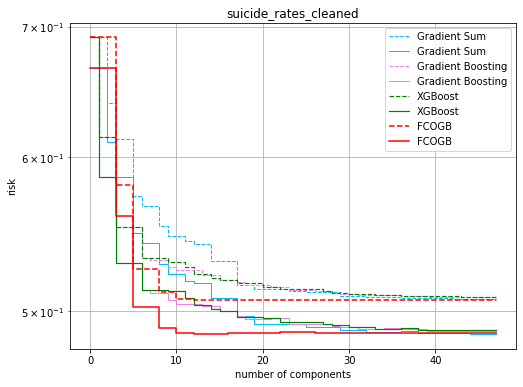

videogamesales mwg_boosting_ 0.953071690812994 0.7196552072460123
videogamesales gpe_boosting_ 0.9530715938143014 0.7196573403689005
videogamesales xgb_keep_ 0.9530715657986802 0.7196537172190225
videogamesales orth_fc_Newton-CG 0.9530700087242574 0.7196608161799911


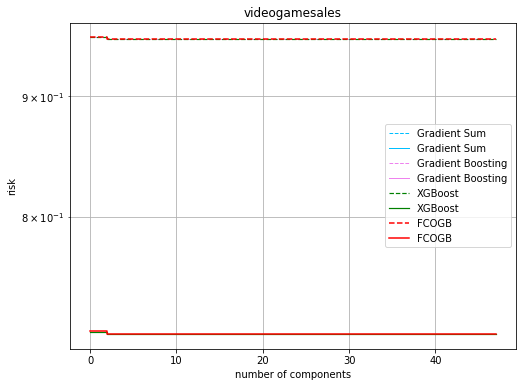

red_wine_quality mwg_boosting_ 0.03480408063816065 0.03536153682283055
red_wine_quality gpe_boosting_ 0.035139668033675735 0.03617419884792539
red_wine_quality xgb_keep_ 0.03470404587798885 0.03603954012604917
red_wine_quality orth_fc_Newton-CG 0.03441505389534101 0.03590269419016985


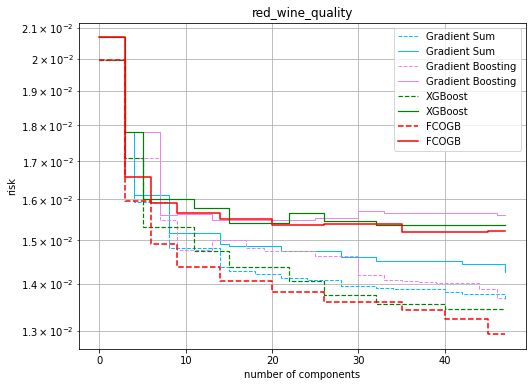

covid_vic mwg_boosting_ 0.13601351655365318 0.1650898497431194
covid_vic gpe_boosting_ 0.10271048745338379 0.08182150122814841
covid_vic xgb_keep_ 0.11449110279936453 0.115486701437201
covid_vic orth_fc_Newton-CG 0.08653760367085947 0.08610425208933482


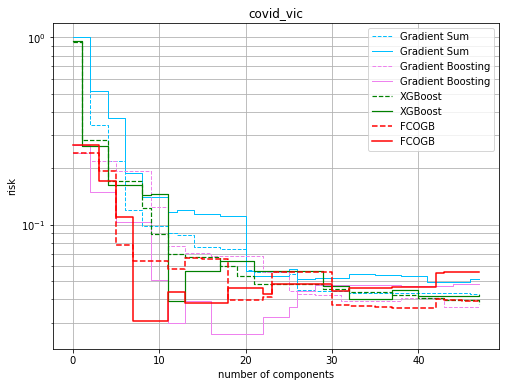

covid mwg_boosting_ 0.3308531575405966 0.44596913207345773
covid gpe_boosting_ 0.3581170847722873 0.3984703289497655
covid xgb_keep_ 0.8884486430417278 0.7356287379855454
covid orth_fc_Newton-CG 0.32098760802215337 0.39537477319316344


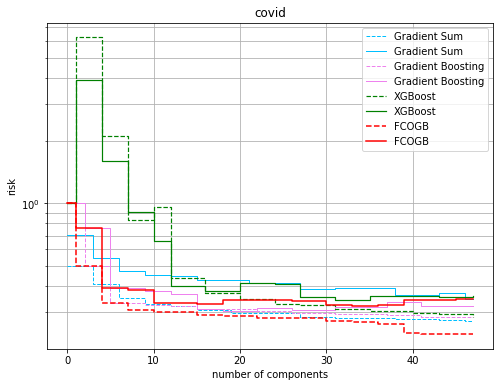

bicycle mwg_boosting_ 0.3031382147392713 0.35348595540375904
bicycle gpe_boosting_ 0.3092339690320938 0.46717564376454324
bicycle xgb_keep_ 0.3232833312649893 0.4458210475527549
bicycle orth_fc_Newton-CG 0.2755197801269648 0.31992746891058843


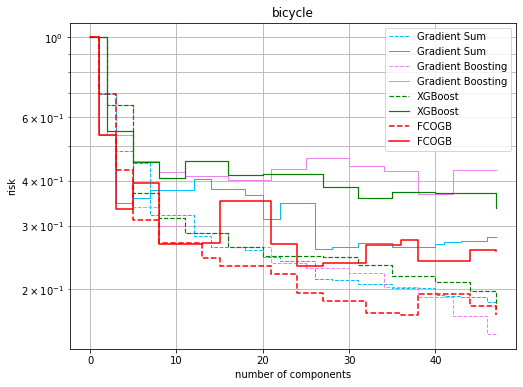

ships mwg_boosting_ 0.15680179240413422 0.18143223034765477
ships gpe_boosting_ 0.16417053332309217 0.18638530597912548
ships xgb_keep_ 1.9453304596803578 4.220828467410165
ships orth_fc_Newton-CG 0.16892416248159875 0.15532160299384065


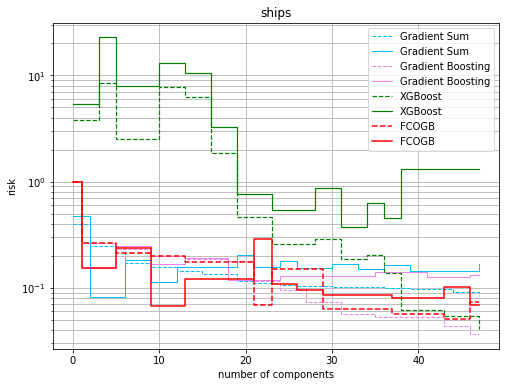

smoking mwg_boosting_ 0.10873251933887586 0.1183542573132161
smoking gpe_boosting_ 0.11049123788585592 0.2346459274326126
smoking xgb_keep_ 0.14612643292845767 0.3081054453865639
smoking orth_fc_Newton-CG 0.07224650748231075 0.08456435984199688


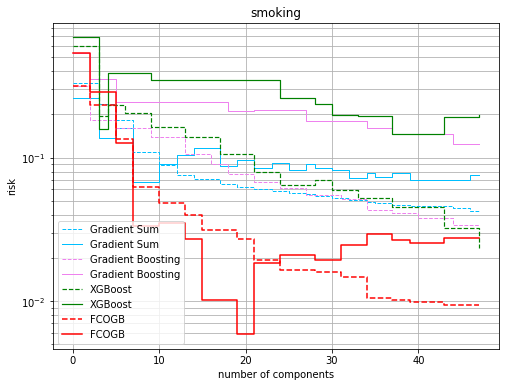

In [59]:
colours = {}
line_width = {}
width = [1,1, 1.2, 1.5]*4
i = 0
colors=['deepskyblue','violet','green','red','gold','blue','cyan','brown','deepskyblue','purple', 'lime',
        'slategray','magenta','pink','olive','khaki']
label_map={'gpe_boosting_':'Gradient Boosting', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
           'orth_fc_Newton-CG': 'FCOGB', 'xgb_keep_': 'XGBoost', 
          'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting','orth_fc_Newton-CG*':'FCOGB Greedy',
          'mwg_boosting_': 'Gradient Sum'}
for dataset in datasets:
    plt.figure(figsize=(8,6))
    j=0
    for item in algo_names:
        color = colors[j]
        colours[item] = color
        line_width[item] = width[j]
        j+=1
        print(dataset, item, train_datasets[dataset][item][0].mean(), test_datasets[dataset][item][0].mean())
        plt.step(np.array(range(0,48)), 
                 np.array(train_datasets[dataset][item][0])[1:], '--', color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
        plt.step(np.array(range(0,48)), 
                 np.array(test_datasets[dataset][item][0])[1:], color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.title(dataset)
    plt.xlabel('number of components')
    plt.ylabel('risk')
    plt.yscale('log')
    plt.grid(visible=True, which='major')
    plt.grid(visible=True, which='minor')
    plt.gca().set_ylim(bottom=0)
    plt.legend()
    plt.savefig('figures/'+dataset+'.png', bbox_inches='tight', pad_inches=0)
    plt.show()

In [60]:
train_datasets_log={}
test_datasets_log={}
j=-1
for dataset in datasets:
    j+=1
    train_datasets_log[dataset]={}
    test_datasets_log[dataset]={}
    for algo in algo_names:
#         print(algo)
        if j==j:
            train_datasets_log[dataset][algo]=[(trains_log[[algo+str(i) for i in range(1, 50)]].iloc[j])]
            test_datasets_log[dataset][algo]=[(tests_log[[algo+str(i) for i in range(1, 50)]].iloc[j])]
        else:
            train_datasets_log[dataset][algo].append(trains_log[[algo+str(i) for i in range(1, 50)]].iloc[j])
            test_datasets_log[dataset][algo].append(tests_log[[algo+str(i) for i in range(1, 50)]].iloc[j])

titanic mwg_boosting_ -0.4328324005217929 -0.3685280165884655
titanic gpe_boosting_ -0.44939041412436814 -0.35635758950087115
titanic xgb_keep_ -0.45435260401878896 -0.35187270806489573
titanic orth_fc_Newton-CG -0.498512001405895 -0.3394203386991859


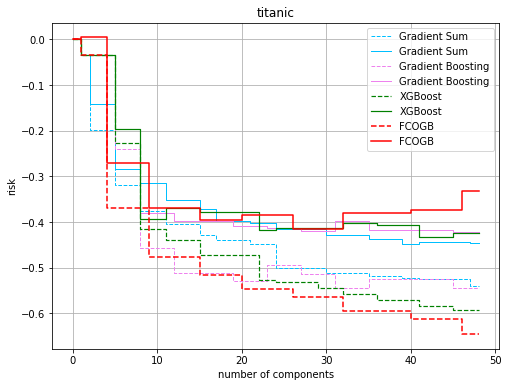

tic-tac-toe mwg_boosting_ -0.6360761736591269 -0.5526675438081751
tic-tac-toe gpe_boosting_ -0.46359432295469855 -0.4000009553456777
tic-tac-toe xgb_keep_ -0.5954584948406949 -0.4949687533652565
tic-tac-toe orth_fc_Newton-CG -0.806153066774904 -0.6037872650108419


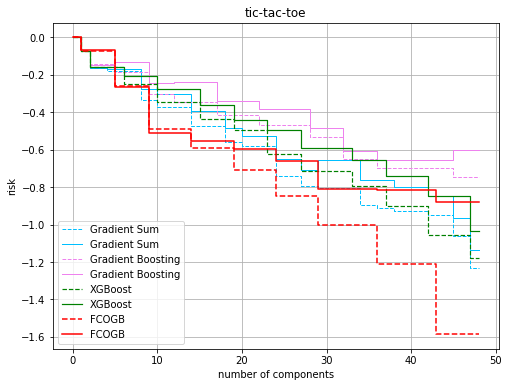

iris mwg_boosting_ -1.5827112576520592 -0.6840109715298923
iris gpe_boosting_ -1.5685991192754745 -0.8676997538040109
iris xgb_keep_ -1.372677222083799 -0.8589546002017068
iris orth_fc_Newton-CG -1.538068411014129 -0.49091987235358286


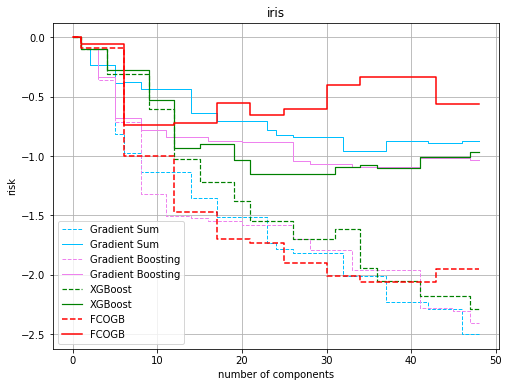

breast_cancer mwg_boosting_ -1.4260816704311228 -1.4612502915026597
breast_cancer gpe_boosting_ -1.2877838114909803 -1.0859789812818565
breast_cancer xgb_keep_ -1.302109331159667 -1.1942590628053926
breast_cancer orth_fc_Newton-CG -1.2380365221936214 -0.9024616197171894


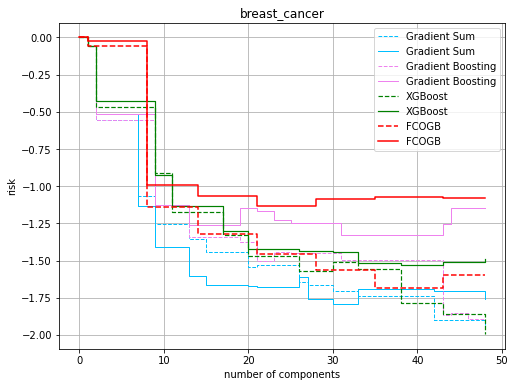

load_wine mwg_boosting_ -1.9782419258036994 -1.1476562882378623
load_wine gpe_boosting_ -1.6383008995346784 -0.9062095401673805
load_wine xgb_keep_ -2.3025504867390274 -0.9712702054591396
load_wine orth_fc_Newton-CG -1.5354825897995823 -0.9347237766334491


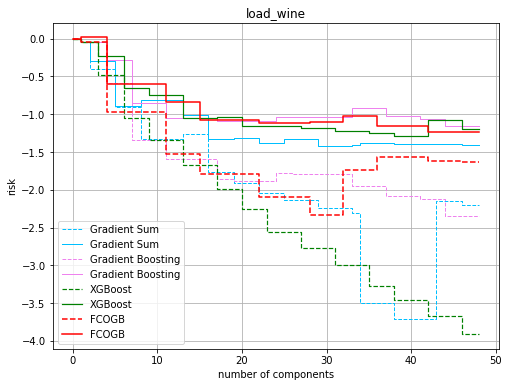

IBM_HR mwg_boosting_ -0.5711208842709857 -0.4499180744949188
IBM_HR gpe_boosting_ -0.5830409318778642 -0.4401964760661358
IBM_HR xgb_keep_ -0.5640821893811536 -0.45598469611421566
IBM_HR orth_fc_Newton-CG -0.587077921944335 -0.47876407128526444


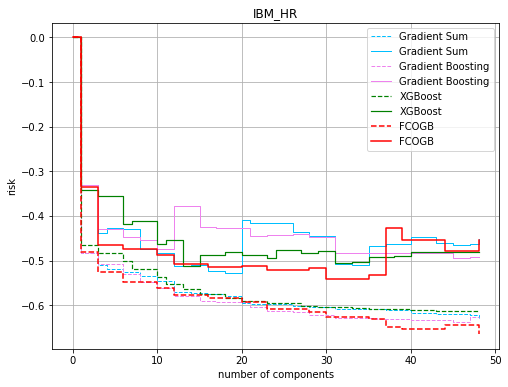

telco_churn mwg_boosting_ -0.39077986915506024 -0.41555864182955937
telco_churn gpe_boosting_ -0.38920677812489834 -0.3980475589418113
telco_churn xgb_keep_ -0.3963544762264797 -0.4169586138019608
telco_churn orth_fc_Newton-CG -0.40753290843926393 -0.42080998456594504


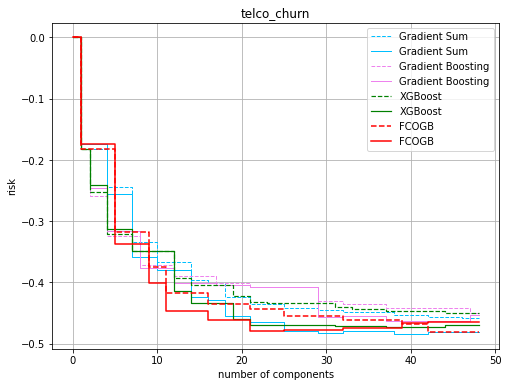

GenderRecognition mwg_boosting_ -1.6076541700217588 -1.5428944585948792
GenderRecognition gpe_boosting_ -1.6121459317796276 -1.522659341187703
GenderRecognition xgb_keep_ -1.5273193576705368 -1.4564740408807968
GenderRecognition orth_fc_Newton-CG -1.6120799064805578 -1.5149173985914395


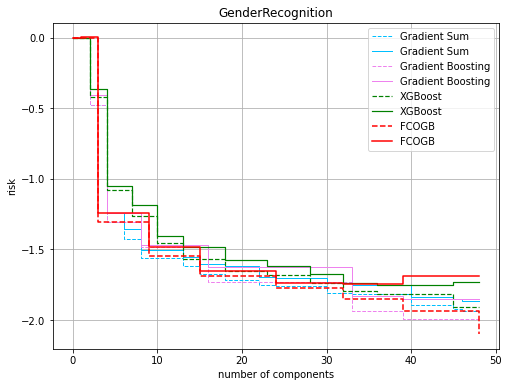

banknote mwg_boosting_ -1.3604965006403082 -1.3270235459165431
banknote gpe_boosting_ -1.5344562718158672 -1.5980388219279897
banknote xgb_keep_ -1.4424067737519672 -1.407062788871477
banknote orth_fc_Newton-CG -1.8199368656665948 -1.8714870345639583


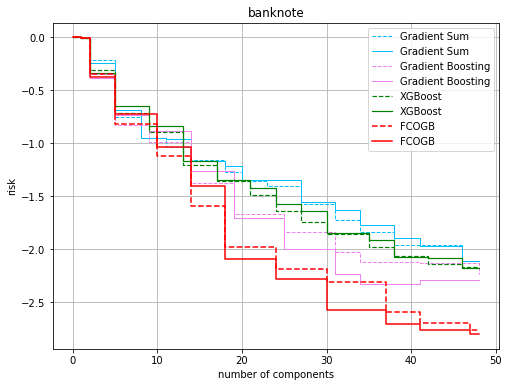

liver mwg_boosting_ -0.20862350771214602 -0.1283323137436203
liver gpe_boosting_ -0.18177201080630973 -0.07423488839514654
liver xgb_keep_ -0.21041366756925348 -0.1364553850908174
liver orth_fc_Newton-CG -0.184091591133042 -0.1154360271520666


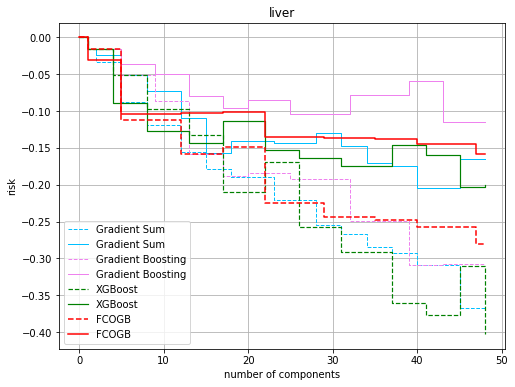

magic mwg_boosting_ -0.3351206830218504 -0.3647982961244518
magic gpe_boosting_ -0.34880447238192075 -0.3713647118125389
magic xgb_keep_ -0.3462744824300319 -0.37217652046984473
magic orth_fc_Newton-CG -0.33942430473951346 -0.3678182873757851


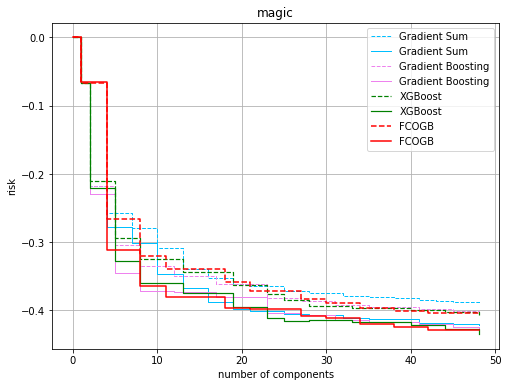

adult mwg_boosting_ -0.5267732147614645 -0.5118216128418315
adult gpe_boosting_ -0.5232610545560882 -0.49625462408292237
adult xgb_keep_ -0.5431201885714456 -0.5205140553487253
adult orth_fc_Newton-CG -0.5288204811189522 -0.5086475220504185


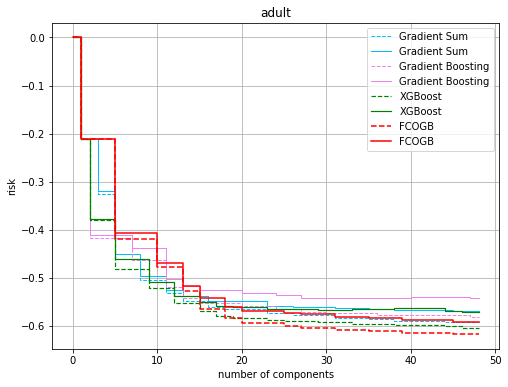

digits5 mwg_boosting_ -1.1396252189467049 -1.1442772980013076
digits5 gpe_boosting_ -1.2034211096668777 -1.1896538330474098
digits5 xgb_keep_ -1.0993994742901978 -1.1018785883929303
digits5 orth_fc_Newton-CG -1.058871363661693 -1.07216663314177


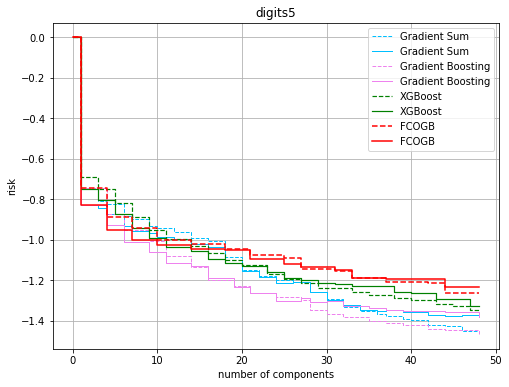

insurance mwg_boosting_ -2.262962665106514 -2.230114023965483
insurance gpe_boosting_ -2.2711990283676116 -2.237111289152454
insurance xgb_keep_ -2.2480471160142876 -2.216882621351783
insurance orth_fc_Newton-CG -2.371380782964769 -2.2883273775639488


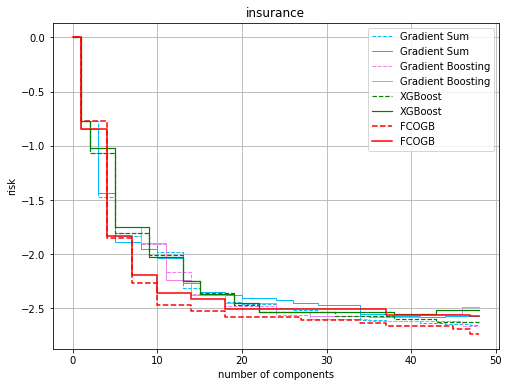

make_friedman1 mwg_boosting_ -2.964410309260807 -2.920301869872663
make_friedman1 gpe_boosting_ -2.880489407260865 -2.8062952961469474
make_friedman1 xgb_keep_ -2.988937690998666 -2.8567775785586607
make_friedman1 orth_fc_Newton-CG -2.9953267775389545 -2.896870954193823


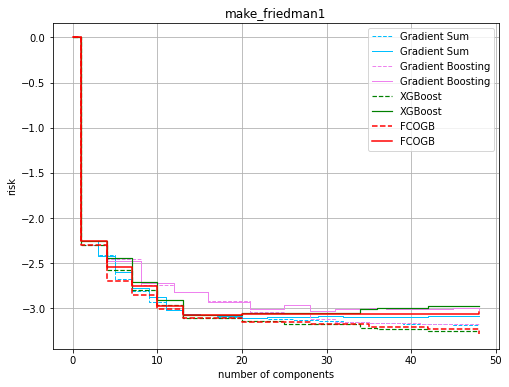

make_friedman2 mwg_boosting_ -3.0647995296330803 -3.054238112147969
make_friedman2 gpe_boosting_ -2.878564308291078 -2.8828750325784864
make_friedman2 xgb_keep_ -2.9545108607603177 -2.9684170411763495
make_friedman2 orth_fc_Newton-CG -3.352522774444068 -3.3397393732408864


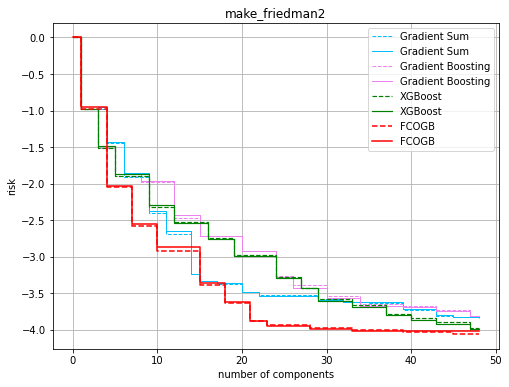

make_friedman3 mwg_boosting_ -3.6508645580000687 -3.5235259836731467
make_friedman3 gpe_boosting_ -3.7529052698885734 -3.5664839291960733
make_friedman3 xgb_keep_ -3.784426021714738 -3.5865065436973325
make_friedman3 orth_fc_Newton-CG -3.8456932866121534 -3.6618450113132615


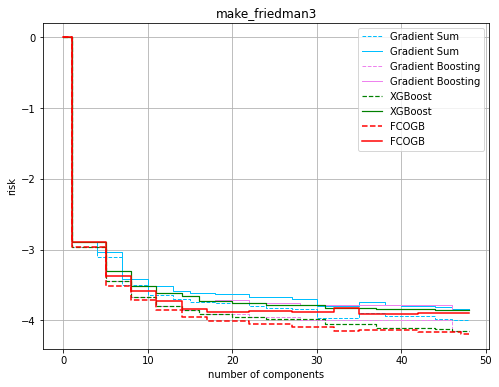

wage mwg_boosting_ -1.0145883185582465 -1.0483436482845612
wage gpe_boosting_ -1.0397938542820087 -0.9172598798755105
wage xgb_keep_ -1.0473321058088847 -0.9001848531247958
wage orth_fc_Newton-CG -1.068765202594225 -1.000042346471811


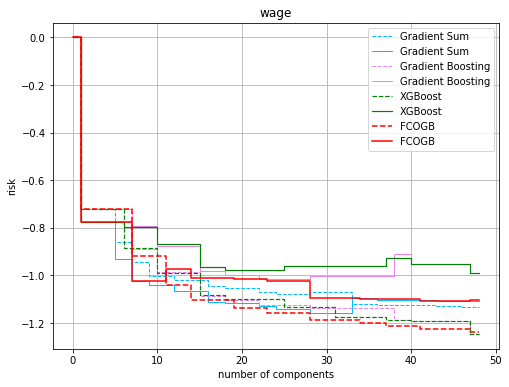

Demographics mwg_boosting_ -1.5856460231031086 -1.576221357889355
Demographics gpe_boosting_ -1.5889677778271072 -1.573676022681236
Demographics xgb_keep_ -1.5889757211140447 -1.5715303225014914
Demographics orth_fc_Newton-CG -1.5979447839712502 -1.5849205140119131


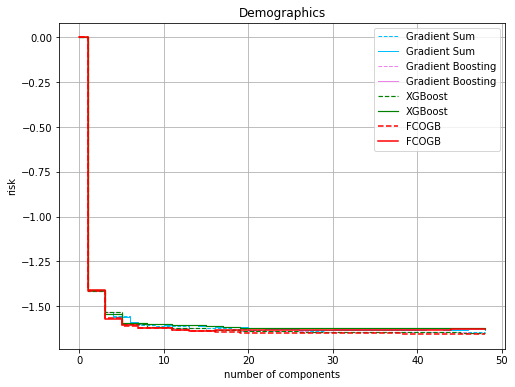

gdp mwg_boosting_ -5.280525097339517 -4.894788324959403
gdp gpe_boosting_ -5.302243936369934 -4.862185030322618
gdp xgb_keep_ -5.315282958477246 -4.869652458181939
gdp orth_fc_Newton-CG -5.359464049449188 -4.963947062223362


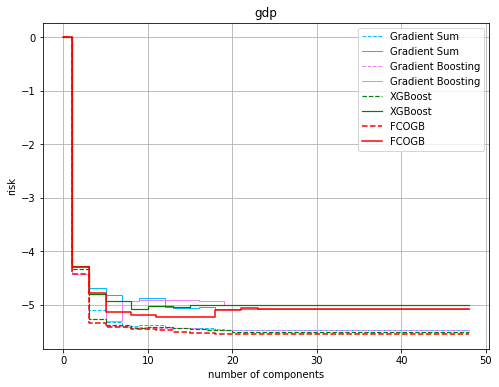

used_cars mwg_boosting_ -2.2472775248009627 -1.977411600620603
used_cars gpe_boosting_ -2.3778004320828203 -2.327204652590549
used_cars xgb_keep_ -2.322959228203719 -2.2400192864582817
used_cars orth_fc_Newton-CG -2.4845226445774276 -2.35049603952987


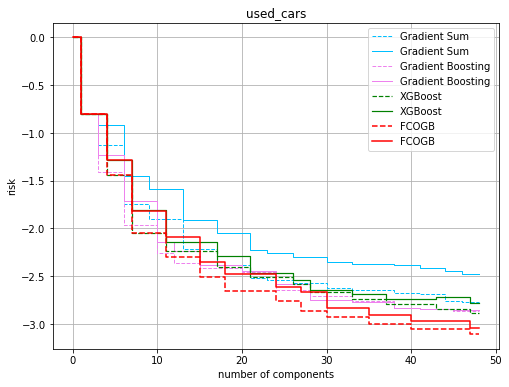

load_diabetes mwg_boosting_ -2.0827465978088378 -2.0595985863451993
load_diabetes gpe_boosting_ -2.0876010628254615 -2.0597696630581823
load_diabetes xgb_keep_ -2.0821347467770943 -2.0267306337094144
load_diabetes orth_fc_Newton-CG -2.124422425821646 -1.9989837135974806


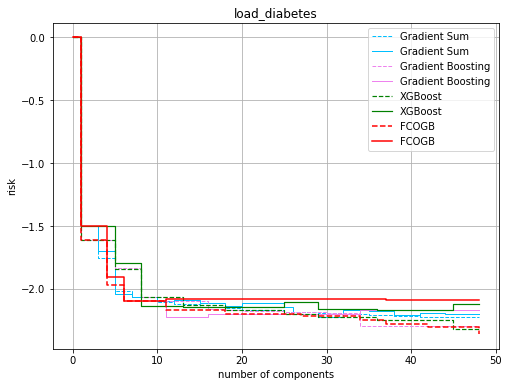

boston mwg_boosting_ -2.670408593542569 -2.782149340015828
boston gpe_boosting_ -2.6905021566100387 -2.673564955960676
boston xgb_keep_ -2.699607398229051 -2.6337065639218187
boston orth_fc_Newton-CG -2.7641568691394904 -2.6551080621206764


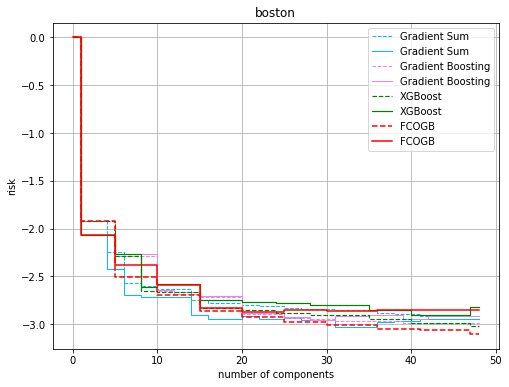

world_happiness_indicator mwg_boosting_ -4.55745040582457 -4.278758212877737
world_happiness_indicator gpe_boosting_ -4.599233703516282 -3.9073221702022427
world_happiness_indicator xgb_keep_ -4.586195638659177 -3.8860201623079296
world_happiness_indicator orth_fc_Newton-CG -4.861369112772657 -4.10357844260473


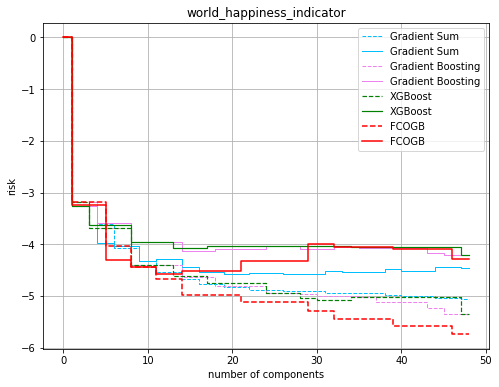

who_life_expectancy mwg_boosting_ -5.079947114734931 -4.938185425905637
who_life_expectancy gpe_boosting_ -5.0515219452760025 -4.909595765786552
who_life_expectancy xgb_keep_ -5.056173751463168 -4.914450037886782
who_life_expectancy orth_fc_Newton-CG -5.189815966505698 -4.953931390694472


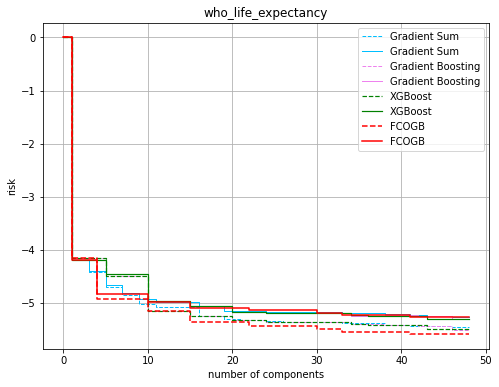

mobile_prices mwg_boosting_ -2.19284059337986 -2.1589120029769764
mobile_prices gpe_boosting_ -2.2251875548680466 -2.1741568849195385
mobile_prices xgb_keep_ -2.226768564332088 -2.1739107005278995
mobile_prices orth_fc_Newton-CG -2.226720179904326 -2.168017501228689


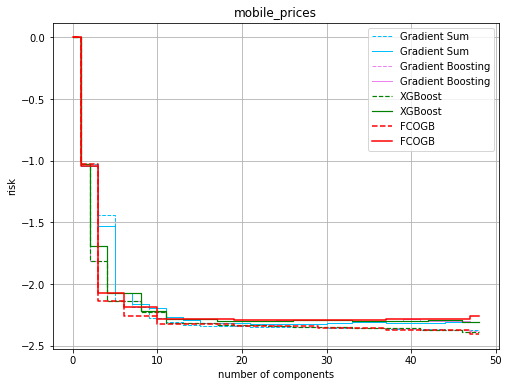

suicide_rates_cleaned mwg_boosting_ -0.6179707792331329 -0.6588349302104519
suicide_rates_cleaned gpe_boosting_ -0.633178690762791 -0.6714527390176906
suicide_rates_cleaned xgb_keep_ -0.6324769165553505 -0.6702534437775873
suicide_rates_cleaned orth_fc_Newton-CG -0.6391804722450697 -0.6771939371421515


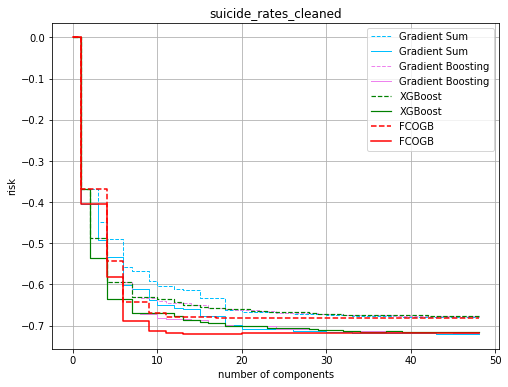

videogamesales mwg_boosting_ -0.04808965321568959 -0.3302517464094305
videogamesales gpe_boosting_ -0.048089755100284425 -0.3302487577952607
videogamesales xgb_keep_ -0.04808978452703456 -0.33025383402923486
videogamesales orth_fc_Newton-CG -0.04809142000322967 -0.33024388799171556


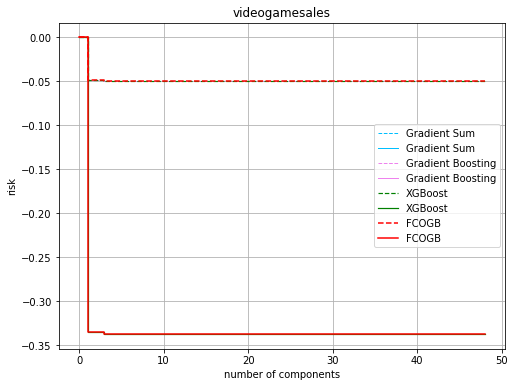

red_wine_quality mwg_boosting_ -4.138653666001705 -4.101024700270738
red_wine_quality gpe_boosting_ -4.115901642872536 -4.0479653371454
red_wine_quality xgb_keep_ -4.1461669531553875 -4.0563096623220405
red_wine_quality orth_fc_Newton-CG -4.166256666980235 -4.06484896715285


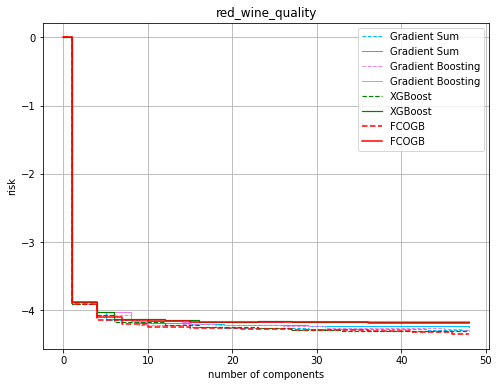

covid_vic mwg_boosting_ -2.5598868427454633 -2.334991634777023
covid_vic gpe_boosting_ -2.652523371227894 -2.9110108732933972
covid_vic xgb_keep_ -2.6491326314403203 -2.6310598223686945
covid_vic orth_fc_Newton-CG -2.821928370712995 -2.84314782709204


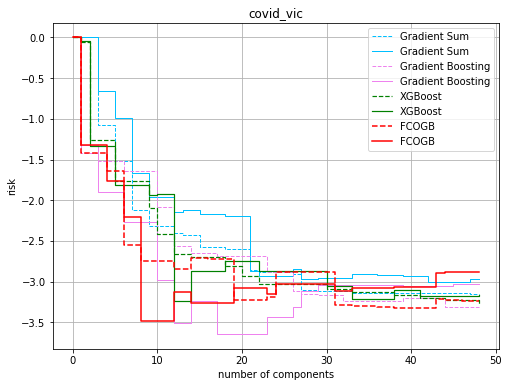

covid mwg_boosting_ -1.1395185389342717 -0.8317496306781326
covid gpe_boosting_ -1.0902370005736635 -0.9898029321301266
covid xgb_keep_ -0.6668179100115537 -0.6358162206876723
covid orth_fc_Newton-CG -1.1965459458967609 -0.9792705206446521


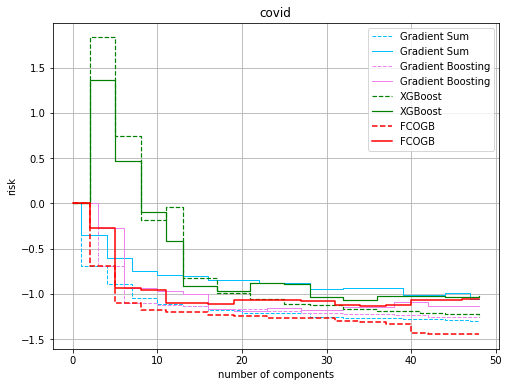

bicycle mwg_boosting_ -1.305124387676484 -1.0936048428049392
bicycle gpe_boosting_ -1.3082930269975641 -0.7902519919326789
bicycle xgb_keep_ -1.2446454304546282 -0.8440355575292517
bicycle orth_fc_Newton-CG -1.4122752232383806 -1.2065214781218598


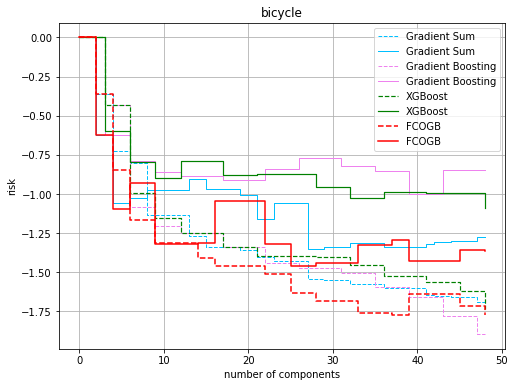

ships mwg_boosting_ -2.009416777291978 -1.8252350662512975
ships gpe_boosting_ -2.1627401767359786 -1.831924558175974
ships xgb_keep_ -0.5720262819858031 0.6663049326547963
ships orth_fc_Newton-CG -2.0830283515383825 -2.122444729248033


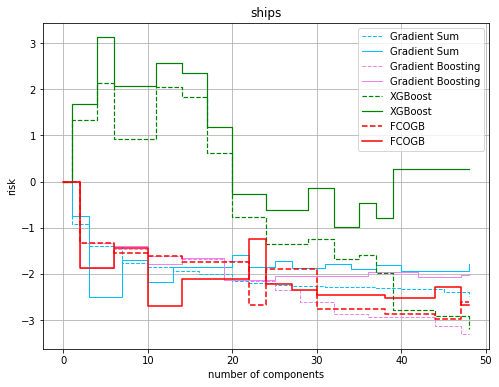

smoking mwg_boosting_ -2.570422124898169 -2.326638776646171
smoking gpe_boosting_ -2.538120846470374 -1.547617017187241
smoking xgb_keep_ -2.348722697658438 -1.2854366577279903
smoking orth_fc_Newton-CG -3.543996495211818 -3.389123870116007


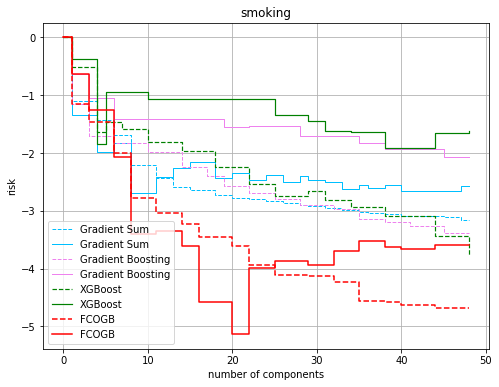

In [61]:
colours = {}
line_width = {}
width = [1,1, 1.2, 1.5]*4
i = 0
colors=['deepskyblue','violet','green','red','gold','blue','cyan','brown','deepskyblue','purple', 'lime',
        'slategray','magenta','pink','olive','khaki']
label_map={'gpe_boosting_':'Gradient Boosting', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
           'orth_fc_Newton-CG': 'FCOGB', 'xgb_keep_': 'XGBoost', 
          'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting','orth_fc_Newton-CG*':'FCOGB Greedy',
          'mwg_boosting_': 'Gradient Sum'}
for dataset in datasets:
    plt.figure(figsize=(8,6))
    j=0
    for item in algo_names:
        color = colors[j]
        colours[item] = color
        line_width[item] = width[j]
        j+=1
        print(dataset, item, train_datasets_log[dataset][item][0].mean(), test_datasets_log[dataset][item][0].mean())
        plt.step(np.array(range(0,49)), 
                 np.array(train_datasets_log[dataset][item][0]), '--', color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
        plt.step(np.array(range(0,49)), 
                 np.array(test_datasets_log[dataset][item][0]), color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.title(dataset)
    plt.xlabel('number of components')
    plt.ylabel('risk')
#     plt.yscale('log')
    plt.grid(visible=True, which='major')
    plt.grid(visible=True, which='minor')
#     plt.gca().set_ylim(bottom=0)
    plt.legend()
    plt.show()

#### Compare Running Time

In [62]:
time_csv = pd.read_csv('./RunningTime.csv')
time_csv

dataset   SIRUS       GS        GB   XGBoost     FCOGB         Naive
0        titanic   7.077    2.624     9.858    10.210    25.710     70.916894
1    tic-tac-toe  12.590    3.971    10.340     6.090    13.990     46.035966
2           iris  11.020    0.775     1.099     1.453     2.487      3.506688
3         breast  11.480    6.744    74.430    74.830   239.200    610.282377
4           wine   9.456    1.530     4.432     2.154    55.183    222.606525
5         ibm hr  11.150   17.240    10.990    12.920    12.030     16.550572
6          telco  50.830   40.010  1883.000  1485.000  3039.000  71225.133640
7         gender  22.420   22.730    25.490    24.270    32.950   3412.051806
8       banknote   8.933    6.298     5.648     7.060     8.444     53.555622
9          liver   9.734    1.997    99.720   124.100   193.900    537.034664
10         magic   1.364   75.140    89.180   101.900   352.200  22196.714970
11         adult   2.169  121.000   136.700   146.000   728.300  14148.872530
12       digits5  52.600  110.800    72.740   101.500    97.400    121.721445
13     insurance  14.060    7.507    15.940    12.980    39.530    339.411161
14     friedman1  16.790    2.514     4.302     3.171     6.915     16.779693
15     friedman2  47.330   11.790    17.560    13.180    28.400    158.082666
16     friedman3  29.860    6.243    10.610     8.559    17.650    117.283024
17          wage  14.180    5.605    12.120    13.170    25.190    220.150439
18        demog.  38.240   36.800    29.400    33.040    72.420    117.448048
19           gdp   7.974    0.261     0.351     0.282     0.488      0.894726
20     used cars  15.000    8.371    12.100     9.484    20.270     56.298375
21      diabetes  10.500    2.204     3.574     3.920     7.591     59.947144
22        boston  10.960    3.055     6.731     5.285    10.440     31.671676
23     happiness   6.344    1.160    11.370    11.310    26.430     54.499622
24  life expect.  21.440   16.160    58.430    63.820   131.200    258.704603
25        mobile  33.810   15.030   367.700   442.500   815.400  10773.172710
26       suicide  52.350  109.600   117.100   139.600   644.600    724.666663
27     videogame   1.171   41.910    34.380    45.900   119.100    187.046666
28      red wine  19.940    9.149    15.320    21.990    35.340    100.741312
29     covid vic     NaN    0.523     0.600     0.628     0.854      1.116649
30         covid     NaN    0.701     0.690     0.682     1.143      1.501184
31       bicycle     NaN    0.695     1.103     1.105     2.124      6.052261
32         ships     NaN    0.235     0.296     0.311     0.448      0.575193
33       smoking     NaN    0.266     0.256     0.208     0.301      0.659415

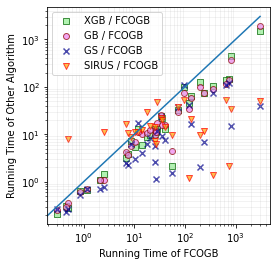

In [63]:
plt.figure(figsize=(4,4))
plt.plot((0,3039),(0,3039))
plt.scatter(time_csv[['FCOGB']], time_csv[['XGBoost']], c='lightgreen', edgecolor='darkgreen', marker='s', label='XGB / FCOGB', alpha=0.7)
plt.scatter(time_csv[['FCOGB']], time_csv[['GB']], c='violet', edgecolor='darkred', marker='o', label='GB / FCOGB', alpha=0.7)
plt.scatter(time_csv[['FCOGB']], time_csv[['GS']], c='darkblue', marker='x', label='GS / FCOGB', alpha=0.7)
plt.scatter(time_csv[['FCOGB']], time_csv[['SIRUS']], c='orange', edgecolor='red', marker='v', label='SIRUS / FCOGB', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Running Time of FCOGB')
plt.ylabel('Running Time of Other Algorithm')
plt.legend()
plt.grid(which='minor', alpha=0.2)
# plt.show()
plt.savefig('running time.pdf', bbox_inches='tight',pad_inches=0.01)

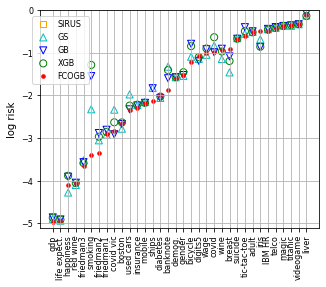

In [64]:
fig = plt.figure(figsize=(4,4))
gs = GridSpec(nrows=1, ncols=1)
ax0 = fig.add_subplot(gs[0, 0])
rot_angle = 90
df2=pd_train_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
df3=pd_test_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
plt.scatter([0],[1],c='none', edgecolors='orange', label='SIRUS', marker='s')
ax1=df3.plot.scatter(x='dataset', y='mwg_boosting_', marker='^', c='none', edgecolors='c',s=50,logy=False, ax=ax0, grid=True, 
                     figsize=(5,4), 
                    label='GS', legend=True, xlabel='', ylabel='log risk', rot=rot_angle, ylim=(-5.1, 0))
ax2=df3.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=50,c='none', edgecolors='b', ax=ax0, grid=True, label='GB',
                   xlabel='', ylabel='log risk', rot=rot_angle)
ax3=df3.plot.scatter(x='dataset', y='xgb_keep_', marker='o',s=50,c='none', edgecolors='g', ax=ax0, grid=True, label='XGB',
                   xlabel='', ylabel='log risk', rot=rot_angle)
ax4=df3.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='.',s=50, ax=ax0, c='r', grid=True, label='FCOGB',
                   xlabel='', ylabel='log risk', rot=rot_angle)

# ax5=df2.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,c='none', edgecolors='c',  grid=True, ylabel='log risk', ax=ax1,rot=90)
# ax6=df2.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax0, c='none', edgecolors='b',ylabel='log risk',  grid=True, rot=90)
# ax7=df2.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax0, c='none', edgecolors='g',ylabel='log risk',  grid=True,rot=90)
# ax8=df2.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax0, c='none', edgecolors='r', ylabel='log risk', grid=True,rot=90)
# plt.scatter((1,2),(1,2), marker='o', c='none', edgecolors='k', label='train')
# plt.scatter((1,2),(1,2), marker='o', c='k', label='test')
ax1.legend(bbox_to_anchor=(0.19,0.99), prop = { "size": 8 })
ax1.grid(which='minor', alpha=0.3)
ax1.tick_params(labelsize=8)
# ax3 = fig.add_axes([0.55, 0.22, 0.32, 0.4])
# # plt.figure(figsize=(4,4))
# # ax3.plot((0,3039),(0,3039),'k')
# ax3.scatter(time_csv[['FCOGB']], time_csv[['XGBoost']], c='none', edgecolors='g', marker='o', label='XGB', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['GB']], c='none', edgecolors='b', marker='v', label='GB', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['GS']], c='none', edgecolors='c', marker='^', label='GS', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['SIRUS']], c='none', edgecolors='orange', marker='s', label='SIRUS', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['FCOGB']], c='r', marker='.')
# ax3.xaxis.set_label_coords(.5,.1)
# ax3.yaxis.set_label_coords(.1,.5)
# ax3.set_xscale('log')
# ax3.set_yscale('log')
# ax3.set_xlabel('$T_{FCOGB}$')
# ax3.set_ylabel('$T_{Other}$')
# # ax3.legend()
# ax3.grid(which='minor', alpha=0.3)
# ax3.grid(which='major', alpha=1)
plt.savefig('all_datasets_order_log.pdf', bbox_inches='tight',pad_inches=0.01)

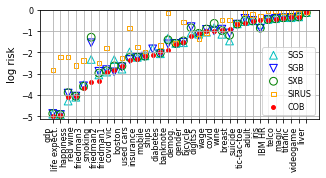

In [65]:
fig = plt.figure(figsize=(5,2))
gs = GridSpec(nrows=1, ncols=1)
ax0 = fig.add_subplot(gs[0, 0])
rot_angle = 90
df2=pd_train_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
df3=pd_test_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
ax1=df3.plot.scatter(x='dataset', y='mwg_boosting_', marker='^', c='none', edgecolors='c',s=60,logy=False, ax=ax0, 
                     grid=True, 
                     figsize=(5,2), 
                    label='SGS', legend=True, xlabel='', ylabel='log risk', rot=rot_angle, ylim=(-5.1, 0))
ax2=df3.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=60,c='none', edgecolors='b', ax=ax0, 
                     grid=True, label='SGB',
                   xlabel='', ylabel='log risk', rot=rot_angle)
ax3=df3.plot.scatter(x='dataset', y='xgb_keep_', marker='o',s=60,c='none', edgecolors='g', ax=ax0, 
                     grid=True, label='SXB',
                   xlabel='', ylabel='log risk', rot=rot_angle)
df3.plot.scatter(x='dataset', y='sirus', c='none', edgecolors='orange', label='SIRUS', grid=True, marker='s',
                 ax=ax0, xlabel='', ylabel='log risk', rot=rot_angle)
ax4=df3.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='.',s=60, ax=ax0, c='r', 
                     grid=True, label='COB',
                   xlabel='', ylabel='log risk', rot=rot_angle)

plt.xticks(rotation=90, ha='right', fontsize=8)
# ax5=df2.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,c='none', edgecolors='c',  grid=True, ylabel='log risk', ax=ax1,rot=90)
# ax6=df2.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax0, c='none', edgecolors='b',ylabel='log risk',  grid=True, rot=90)
# ax7=df2.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax0, c='none', edgecolors='g',ylabel='log risk',  grid=True,rot=90)
# ax8=df2.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax0, c='none', edgecolors='r', ylabel='log risk', grid=True,rot=90)
# plt.scatter((1,2),(1,2), marker='o', c='none', edgecolors='k', label='train')
# plt.scatter((1,2),(1,2), marker='o', c='k', label='test')
ax1.legend(prop = { "size": 8 })
ax1.grid(which='minor', alpha=0.3)
ax1.tick_params(labelsize=8)
# ax3 = fig.add_axes([0.55, 0.22, 0.32, 0.4])
# # plt.figure(figsize=(4,4))
# # ax3.plot((0,3039),(0,3039),'k')
# ax3.scatter(time_csv[['FCOGB']], time_csv[['XGBoost']], c='none', edgecolors='g', marker='o', label='XGB', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['GB']], c='none', edgecolors='b', marker='v', label='GB', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['GS']], c='none', edgecolors='c', marker='^', label='GS', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['SIRUS']], c='none', edgecolors='orange', marker='s', label='SIRUS', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['FCOGB']], c='r', marker='.')
# ax3.xaxis.set_label_coords(.5,.1)
# ax3.yaxis.set_label_coords(.1,.5)
# ax3.set_xscale('log')
# ax3.set_yscale('log')
# ax3.set_xlabel('$T_{FCOGB}$')
# ax3.set_ylabel('$T_{Other}$')
# # ax3.legend()
# ax3.grid(which='minor', alpha=0.3)
# ax3.grid(which='major', alpha=1)
plt.savefig('all_datasets_order_log.pdf', bbox_inches='tight',pad_inches=0.01)

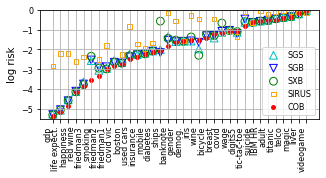

In [66]:
fig = plt.figure(figsize=(5,2))
gs = GridSpec(nrows=1, ncols=1)
ax0 = fig.add_subplot(gs[0, 0])
rot_angle = 90
df2=pd_train_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
df3=pd_test_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
ax1=df2.plot.scatter(x='dataset', y='mwg_boosting_', marker='^', c='none', edgecolors='c',s=60,logy=False, ax=ax0, 
                     grid=True, 
                     figsize=(5,2), 
                    label='SGS', legend=True, xlabel='', ylabel='log risk', rot=rot_angle, ylim=(-5.5, 0))
ax2=df2.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=60,c='none', edgecolors='b', ax=ax0, 
                     grid=True, label='SGB',
                   xlabel='', ylabel='log risk', rot=rot_angle)
ax3=df2.plot.scatter(x='dataset', y='xgb_keep_', marker='o',s=60,c='none', edgecolors='g', ax=ax0, 
                     grid=True, label='SXB',
                   xlabel='', ylabel='log risk', rot=rot_angle)
df2.plot.scatter(x='dataset', y='sirus', c='none', edgecolors='orange', label='SIRUS', grid=True, marker='s',
                 ax=ax0, xlabel='', ylabel='log risk', rot=rot_angle)
ax4=df2.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='.',s=60, ax=ax0, c='r', 
                     grid=True, label='COB',
                   xlabel='', ylabel='log risk', rot=rot_angle)

plt.xticks(rotation=90, ha='right', fontsize=8)
# ax5=df2.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,c='none', edgecolors='c',  grid=True, ylabel='log risk', ax=ax1,rot=90)
# ax6=df2.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax0, c='none', edgecolors='b',ylabel='log risk',  grid=True, rot=90)
# ax7=df2.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax0, c='none', edgecolors='g',ylabel='log risk',  grid=True,rot=90)
# ax8=df2.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax0, c='none', edgecolors='r', ylabel='log risk', grid=True,rot=90)
# plt.scatter((1,2),(1,2), marker='o', c='none', edgecolors='k', label='train')
# plt.scatter((1,2),(1,2), marker='o', c='k', label='test')
ax1.legend(prop = { "size": 8 })
ax1.grid(which='minor', alpha=0.3)
ax1.tick_params(labelsize=8)
# ax3 = fig.add_axes([0.55, 0.22, 0.32, 0.4])
# # plt.figure(figsize=(4,4))
# # ax3.plot((0,3039),(0,3039),'k')
# ax3.scatter(time_csv[['FCOGB']], time_csv[['XGBoost']], c='none', edgecolors='g', marker='o', label='XGB', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['GB']], c='none', edgecolors='b', marker='v', label='GB', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['GS']], c='none', edgecolors='c', marker='^', label='GS', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['SIRUS']], c='none', edgecolors='orange', marker='s', label='SIRUS', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['FCOGB']], c='r', marker='.')
# ax3.xaxis.set_label_coords(.5,.1)
# ax3.yaxis.set_label_coords(.1,.5)
# ax3.set_xscale('log')
# ax3.set_yscale('log')
# ax3.set_xlabel('$T_{FCOGB}$')
# ax3.set_ylabel('$T_{Other}$')
# # ax3.legend()
# ax3.grid(which='minor', alpha=0.3)
# ax3.grid(which='major', alpha=1)
plt.savefig('all_datasets_order_log_train.pdf', bbox_inches='tight',pad_inches=0.01)

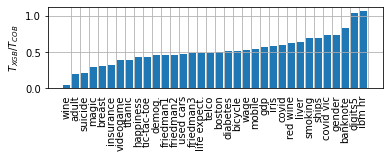

In [67]:
plt.figure(figsize=(6,1.5))
f=time_csv[['FCOGB']].to_numpy()
x=time_csv[['XGBoost']].to_numpy()
s=time_csv[['GS']].to_numpy()
g=time_csv[['GB']].to_numpy()
si=time_csv[['SIRUS']].to_numpy()
order = np.argsort((x/f).T[0])
x_values=np.arange(0,34,1)
x_ticks=time_csv[['dataset']].to_numpy().T[0][order]
plt.bar(x_values,(x/f).T[0][order])
plt.ylabel('$T_{XGB}/T_{COB}$')
plt.xticks(x_values+0.5, x_ticks)
plt.grid()
plt.tick_params(bottom=False)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.savefig('time_xgb_fcogb.pdf', bbox_inches='tight',pad_inches=0.01)

# plt.bar(time_csv[['dataset']].to_numpy().T[0],(s/f).T[0])
# ax3.scatter(time_csv[['FCOGB']], time_csv[['GB']], c='none', edgecolors='b', marker='v', label='GB', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['GS']], c='none', edgecolors='c', marker='^', label='GS', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['SIRUS']], c='none', edgecolors='orange', marker='s', label='SIRUS', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['FCOGB']], c='r', marker='.')
# ax3.xaxis.set_label_coords(.5,.1)
# ax3.yaxis.set_label_coords(.1,.5)
# ax3.set_xscale('log')
# ax3.set_yscale('log')
# ax3.set_xlabel('$T_{FCOGB}$')
# ax3.set_ylabel('$T_{Other}$')
# # ax3.legend()
# ax3.grid(which='minor', alpha=0.3)
# ax3.grid(which='major', alpha=1)

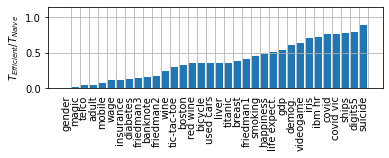

In [68]:
plt.figure(figsize=(6,1.5))
f=time_csv[['FCOGB']].to_numpy()
n=time_csv[['Naive']].to_numpy()
order = np.argsort((f/n).T[0])
x_values=np.arange(0,34,1)
x_ticks=time_csv[['dataset']].to_numpy().T[0][order]
plt.bar(x_values,(f/n).T[0][order])
plt.xticks(x_values+0.5, x_ticks)
plt.tick_params(bottom=False)
plt.ylabel('$T_{Efficient}/T_{Naive}$')
plt.grid()
plt.xticks(rotation=90, ha='right', fontsize=10)

plt.ylim(0,1.15)
# plt.yscale('log')
plt.savefig('time_fcogb_naive.pdf', bbox_inches='tight',pad_inches=0.01)

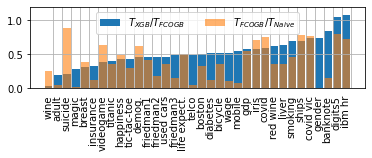

In [69]:
plt.figure(figsize=(6,1.5))
f=time_csv[['FCOGB']].to_numpy()
x=time_csv[['XGBoost']].to_numpy()
n=time_csv[['Naive']].to_numpy()
s=time_csv[['GS']].to_numpy()
g=time_csv[['GB']].to_numpy()
si=time_csv[['SIRUS']].to_numpy()
order = np.argsort((x/f).T[0])
x_values=np.arange(0,34,1)
x_ticks=time_csv[['dataset']].to_numpy().T[0][order]
plt.bar(x_values,(x/f).T[0][order], label='$T_{XGB}/T_{FCOGB}$')
plt.bar(x_values,(f/n).T[0][order], label='$T_{FCOGB}/T_{Naive}$', alpha=0.6)
# plt.ylabel('$T_{XGB}/T_{FCOGB}$')
plt.legend(ncol=2)
plt.xticks(x_values+0.5, x_ticks)
plt.grid()
plt.ylim([0,1.2])
plt.tick_params(bottom=False)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.savefig('time_xgb_fcogb_naive.pdf', bbox_inches='tight',pad_inches=0.01)

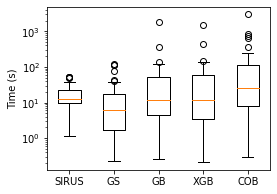

In [70]:
plt.figure(figsize=(4,3))
plt.boxplot([si.T[0][:-5], s.T[0], g.T[0], x.T[0], f.T[0]])
plt.yscale('log')
plt.ylabel('Time (s)')
plt.xticks([1,2,3,4,5],['SIRUS', 'GS', 'GB', 'XGB', 'COB']) 
plt.savefig('running_time_box.pdf', bbox_inches='tight',pad_inches=0.01)

[array([113.31586504, 107.15278974,  84.54599708,  99.9161615 ,
       106.21335974,  92.79914439, 102.65511586, 101.08548526,
       100.04291431,  98.25399789, 104.3302619 , 112.03037374,
        90.34934329, 110.28274078, 102.2863013 , 104.45137613,
        88.63397788, 101.35136878, 114.84537002,  89.20195114,
        80.22271719,  82.56627704, 102.66070164, 123.84967331,
       111.23691253, 116.72622213, 100.99149216, 113.97996377,
        97.28752012, 106.13204185,  97.32682811,  94.50690986,
       101.32708296,  95.23857985, 113.08473081, 101.95013279,
       104.00209988,  96.62367663, 112.56472264,  92.68030498,
       106.60231551,  96.49128109,  90.6056664 ,  95.10662783,
        91.95408858,  97.87302361,  96.60859754, 103.12169936,
       105.6515267 ,  98.52579742,  99.74094663, 102.89094204,
        94.60120929, 107.0816002 , 108.42224738, 102.03580797,
       123.94703665, 109.17458938,  98.87727529,  96.37819553,
        97.67817744,  94.982711  , 111.28785153,  93.0

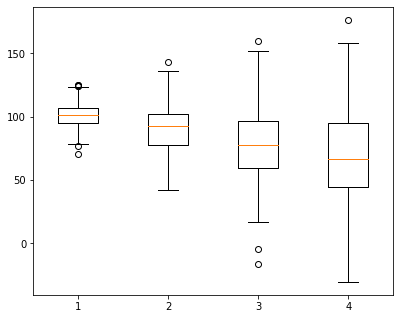

In [71]:
np.random.seed(10)
 
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]
print(data)
fig = plt.figure(figsize =(5, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot

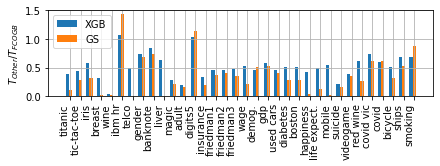

In [72]:
species = time_csv[['dataset']].to_numpy().T[0]
f=time_csv[['FCOGB']].to_numpy()
x=time_csv[['XGBoost']].to_numpy()
s=time_csv[['GS']].to_numpy()
g=time_csv[['GB']].to_numpy()
si=time_csv[['SIRUS']].to_numpy()
penguin_means = {
#     'SIRUS': (si/f).T[0],
#     'GS': (s/f).T[0],
    
    'XGB': (x/f).T[0],
#     'GB': (g/f).T[0],
    'GS': (s/f).T[0],
#     'FCOGB':f
}

x = np.arange(len(species))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained', figsize=(6,2.2))

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
#     ax.bar_label(rects, padding=3)
    multiplier += 1
plt.xticks(rotation=90, ha='right', fontsize=10)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('$T_{Other}/T_{FCOGB}$')
# ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
# ax.set_yscale('log')
ax.grid()
ax.legend()
# ax.set_ylim(0, 250)

plt.show()

In [73]:
time_csv[['dataset']].to_numpy().T[0],f.T[0]

(array(['titanic', 'tic-tac-toe', 'iris', 'breast', 'wine', 'ibm hr',
        'telco', 'gender', 'banknote', 'liver', 'magic', 'adult',
        'digits5', 'insurance', 'friedman1', 'friedman2', 'friedman3',
        'wage', 'demog.', 'gdp', 'used cars', 'diabetes', 'boston',
        'happiness', 'life expect.', 'mobile', 'suicide', 'videogame',
        'red wine', 'covid vic', 'covid', 'bicycle', 'ships', 'smoking'],
       dtype=object),
 array([2.5710e+01, 1.3990e+01, 2.4870e+00, 2.3920e+02, 5.5183e+01,
        1.2030e+01, 3.0390e+03, 3.2950e+01, 8.4440e+00, 1.9390e+02,
        3.5220e+02, 7.2830e+02, 9.7400e+01, 3.9530e+01, 6.9150e+00,
        2.8400e+01, 1.7650e+01, 2.5190e+01, 7.2420e+01, 4.8800e-01,
        2.0270e+01, 7.5910e+00, 1.0440e+01, 2.6430e+01, 1.3120e+02,
        8.1540e+02, 6.4460e+02, 1.1910e+02, 3.5340e+01, 8.5400e-01,
        1.1430e+00, 2.1240e+00, 4.4800e-01, 3.0100e-01]))

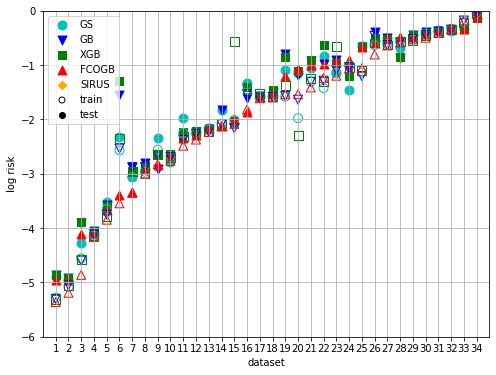

In [74]:
from matplotlib.ticker import FixedLocator
fig = plt.figure(figsize=(8,8))
gs = GridSpec(nrows=1, ncols=1)
ax0 = fig.add_subplot(gs[0, 0])
df2=pd_train_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1).reset_index()
df2['index']+=1
df3=pd_test_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1).reset_index()
df3['index']+=1
ax1=df3.plot.scatter(x='index', y='mwg_boosting_', marker='o', c='c',s=80,logy=False, ax=ax0, grid=True, figsize=(8,6), 
                    label='GS', legend=True, xlabel='dataset', ylabel='log risk', ylim=(-6, 0))
ax2=df3.plot.scatter(x='index', y='gpe_boosting_', marker='v',s=80,c='b', ax=ax0, grid=True, label='GB',
                   xlabel='dataset', ylabel='log risk')
ax3=df3.plot.scatter(x='index', y='xgb_keep_', marker='s',s=80,c='g', ax=ax0, grid=True, label='XGB',
                   xlabel='dataset', ylabel='log risk')
ax4=df3.plot.scatter(x='index', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax0, c='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='log risk')
plt.scatter([0],[1],c='orange', label='SIRUS', marker='D')
ax5=df2.plot.scatter(x='index', y='mwg_boosting_', marker='o',s=80,c='none', edgecolors='c',  grid=True, ylabel='log risk', ax=ax1)
ax6=df2.plot.scatter(x='index', y='gpe_boosting_', marker='v',s=80,ax=ax0, c='none', edgecolors='b',ylabel='log risk',  grid=True)
ax7=df2.plot.scatter(x='index', y='xgb_keep_', marker='s',s=80,ax=ax0, c='none', edgecolors='g',ylabel='log risk',  grid=True)
ax8=df2.plot.scatter(x='index', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax0, c='none',  xlabel='dataset',edgecolors='r', ylabel='log risk', grid=True)
plt.scatter((1,2),(1,2), marker='o', c='none', edgecolors='k', label='train')
plt.scatter((1,2),(1,2), marker='o', c='k', label='test')
plt.legend()
# plt.xticks(minor=True)
ax1.xaxis.set_major_locator(FixedLocator(list(range(1,35))))
# ax1.xaxis.set_data_interval(1,34)
ax1.grid(which='minor', alpha=0.3)
plt.xlim(0,35)
# ax3 = fig.add_axes([0.55, 0.22, 0.3, 0.4])
# # plt.figure(figsize=(4,4))
# ax3.plot((0,3039),(0,3039))
# ax3.scatter(time_csv[['FCOGB']], time_csv[['XGBoost']], c='g', marker='s', label='XGB', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['GB']], c='b', marker='v', label='GB', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['GS']], c='c', marker='o', label='GS', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['SIRUS']], c='orange', marker='D', label='SIRUS', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['FCOGB']], c='r', marker='^')
# ax3.xaxis.set_label_coords(.5,.1)
# ax3.yaxis.set_label_coords(.1,.5)
# ax3.set_xscale('log')
# ax3.set_yscale('log')
# ax3.set_xlabel('$T_{FCOGB}$')
# ax3.set_ylabel('$T_{Other}$')
# # ax3.legend()
# ax3.grid(which='minor', alpha=0.3)
# ax3.grid(which='major', alpha=1)
plt.savefig('all_datasets_order_log0.pdf', bbox_inches='tight',pad_inches=0.01)

In [75]:
df2

index       dataset  mwg_boosting_  gpe_boosting_  xgb_keep_  \
0       1           gdp      -5.280525      -5.302244  -5.315283   
1       2  life expect.      -5.079947      -5.051522  -5.056174   
2       3     happiness      -4.557450      -4.599234  -4.586196   
3       4      red wine      -4.138654      -4.115902  -4.146167   
4       5     friedman3      -3.650865      -3.752905  -3.784426   
5       6       smoking      -2.570422      -2.538121  -2.348723   
6       7     friedman2      -3.064800      -2.878564  -2.954511   
7       8     friedman1      -2.964410      -2.880489  -2.988938   
8       9     covid vic      -2.559887      -2.652523  -2.649133   
9      10        boston      -2.670409      -2.690502  -2.699607   
10     11     used cars      -2.247278      -2.377800  -2.322959   
11     12     insurance      -2.262963      -2.271199  -2.248047   
12     13        mobile      -2.192841      -2.225188  -2.226769   
13     14      diabetes      -2.082747      -2.087601  -2.082135   
14     15         ships      -2.009417      -2.162740  -0.572026   
15     16      banknote      -1.360497      -1.534456  -1.442407   
16     17        gender      -1.607654      -1.612146  -1.527319   
17     18        demog.      -1.585646      -1.588968  -1.588976   
18     19          iris      -1.582711      -1.568599  -1.372677   
19     20          wine      -1.978242      -1.638301  -2.302550   
20     21       bicycle      -1.305124      -1.308293  -1.244645   
21     22        breast      -1.426082      -1.287784  -1.302109   
22     23         covid      -1.139519      -1.090237  -0.666818   
23     24          wage      -1.014588      -1.039794  -1.047332   
24     25       digits5      -1.139625      -1.203421  -1.099399   
25     26   tic-tac-toe      -0.636076      -0.463594  -0.595458   
26     27       suicide      -0.617971      -0.633179  -0.632477   
27     28        IBM HR      -0.571121      -0.583041  -0.564082   
28     29         adult      -0.526773      -0.523261  -0.543120   
29     30       titanic      -0.432832      -0.449390  -0.454353   
30     31         telco      -0.390780      -0.389207  -0.396354   
31     32         magic      -0.335121      -0.348804  -0.346274   
32     33         liver      -0.208624      -0.181772  -0.210414   
33     34     videogame      -0.048090      -0.048090  -0.048090   

    orth_fc_Newton-CG        sirus  
0           -5.359464    -2.832026  
1           -5.189816    -2.207275  
2           -4.861369    -2.216407  
3           -4.166257    -2.617296  
4           -3.845693    -2.385967  
5           -3.543996  1000.000000  
6           -3.352523    -2.501036  
7           -2.995327    -1.801810  
8           -2.821928  1000.000000  
9           -2.764157    -2.253795  
10          -2.484523    -0.850971  
11          -2.371381    -1.731606  
12          -2.226720    -1.966113  
13          -2.124422    -1.671313  
14          -2.083028  1000.000000  
15          -1.819937    -0.153151  
16          -1.612080    -0.562119  
17          -1.597945    -1.565421  
18          -1.538068    -0.294371  
19          -1.535483    -0.476424  
20          -1.412275  1000.000000  
21          -1.238037    -0.466809  
22          -1.196546  1000.000000  
23          -1.068765    -1.075873  
24          -1.058871    -1.339411  
25          -0.806153    -0.122168  
26          -0.639180    -0.665532  
27          -0.587078    -0.026344  
28          -0.528820    -0.220647  
29          -0.498512    -0.112050  
30          -0.407533    -0.056570  
31          -0.339424    -0.102033  
32          -0.184092    -0.086648  
33          -0.048091    -0.162519

#### Ablation Study

In [76]:
def all_risks2(datasets, algo_names):
    train_risks={}
    test_risks={}
    for i in range(len(datasets)):
        train_risks[datasets[i]]={}
        test_risks[datasets[i]]={}
        for algo in algo_names:
            try:
                location='../experiment_output_20240218varreg_cgs_greedy' if algo=='mwg_fc_Newton-CG' \
                        else '../experiment_output_greedy' if algo=='orth_fc_Newton-CG*' \
                        else '../experiment_output_20230816varreg_new'
                print(datasets[i], algo)
                train, test,_=get_all_risks(datasets[i], algo, col=cols[i], location=location)
                train_risks[datasets[i]][algo]=train/get_max_risk(datasets[i])
                test_risks[datasets[i]][algo]=test/get_max_risk(datasets[i])
            except Exception as e:
                if algo=='orths_fc_Newton-CG':
                    location='../experiment_output_20240218varreg_cgs_greedy' if algo=='mwg_fc_Newton-CG' \
                        else '../experiment_output_greedy' if algo=='orth_fc_Newton-CG*' \
                        else '../experiment_output_20230816varreg_new'
                    train, test,_=get_all_risks(datasets[i], algo.replace('s',''), col=cols[i], location=location)
                    train_risks[datasets[i]][algo]=train/get_max_risk(datasets[i])
                    test_risks[datasets[i]][algo]=test/get_max_risk(datasets[i])
#                 print(e)
                continue
    return train_risks, test_risks

In [77]:
algo_names2=['mwg_boosting_',
             'mwg_fc_Newton-CG',
    'gpe_boosting_', 
    'gpe_fc_Newton-CG',
    'xgb_keep_', 
    'orths_fc_Newton-CG',
    'orth_fc_Newton-CG*']
trains, tests = all_risks2(datasets, algo_names2)
today = date.today()
compare_test_file_a="../analysis_results/compare_test"+str(today)+"normal_ablation.csv"
compare_train_file_a="../analysis_results/compare_train"+str(today)+"normal_ablation.csv"
compare_test_log_file_a="../analysis_results/compare_test"+str(today)+"log_ablation.csv"
compare_train_log_file_a="../analysis_results/compare_train"+str(today)+"log_ablation.csv"
f = open(compare_test_file_a, 'w')
f2 = open(compare_train_file_a, 'w')
f3 = open(compare_test_log_file_a, 'w')
f4 = open(compare_train_log_file_a, 'w')
f.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,52)]) for algo in algo_names2])+'\n')
f2.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,52)]) for algo in algo_names2])+'\n')
f3.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,52)]) for algo in algo_names2])+'\n')
f4.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,52)]) for algo in algo_names2])+'\n')
for dataset in datasets:
#     print(dataset)
    f.write(dataset+',')
    f2.write(dataset+',')
    f3.write(dataset+',')
    f4.write(dataset+',')
    for algo in algo_names2:
        try:
            f.write(','.join([str(x) for x in tests[dataset][algo][0]])+',')
            f2.write(','.join([str(x) for x in trains[dataset][algo][0]])+',')
            f3.write(','.join([str(x) for x in np.log(tests[dataset][algo][0])])+',')
            f4.write(','.join([str(x) for x in np.log(trains[dataset][algo][0])])+',')
        except Exception as e:
#             print(e)
            continue
    f.write('\n')
    f2.write('\n')
    f3.write('\n')
    f4.write('\n')
f.close()
f2.close()
f3.close()
f4.close()
print('done')

titanic mwg_boosting_
[0.86566976 0.74073902 0.71416297 0.69800292 0.67570574 0.6604938
 0.65003958 0.64563488 0.63654137 0.60867434 0.6035785  0.60172356
 0.59502246 0.59250562 0.59107591] [0.96304763 0.77652225 0.74263924 0.75488166 0.74199965 0.71520948
 0.71025413 0.69848044 0.70554351 0.69819317 0.69703636 0.69416164
 0.68831266 0.68522731 0.6849477 ] [ 4.  6.  9. 12. 16. 19. 23. 26. 30. 33. 36. 39. 44. 48.]
[0.86566976 0.74073902 0.71416297 0.69800292 0.67570574 0.6604938
 0.65003958 0.64563488 0.63654137 0.60867434 0.6035785  0.60172356
 0.59502246 0.59250562 0.59107591]
[0.96304763 0.77652225 0.74263924 0.75488166 0.74199965 0.71520948
 0.71025413 0.69848044 0.70554351 0.69819317 0.69703636 0.69416164
 0.68831266 0.68522731 0.6849477 ]
titanic mwg_fc_Newton-CG
[0.82128741 0.68749477 0.67167532 0.6334101  0.62430083 0.60640429
 0.60238774 0.58927626 0.57098879 0.5640754  0.52415086 0.51608071
 0.5113915 ] [0.86524587 0.72537163 0.71013742 0.66169779 0.64552722 0.63985099
 0.6395

[0.79456625 0.70839599 0.6831385  0.68302388 0.67820643 0.66921129
 0.65864442 0.65626767 0.65476022 0.65263356]
adult mwg_boosting_
[0.7226757  0.63094503 0.60423579 0.58805158 0.57793621 0.57127204
 0.56835979 0.56399596 0.56129358 0.56079691 0.55786299 0.55685257
 0.55475213 0.55433615 0.55372239 0.55340768 0.55317024 0.55291427] [0.72680516 0.63687228 0.60851888 0.59073195 0.58454407 0.57835675
 0.57758878 0.57222833 0.57121866 0.57019775 0.56961179 0.56814052
 0.56738411 0.56749455 0.56682004 0.5663474  0.5660755  0.56544612] [ 3.  5.  8. 11. 13. 16. 18. 23. 26. 28. 31. 35. 38. 41. 44. 45. 48.]
[0.7226757  0.63094503 0.60423579 0.58805158 0.57793621 0.57127204
 0.56835979 0.56399596 0.56129358 0.56079691 0.55786299 0.55685257
 0.55475213 0.55433615 0.55372239 0.55340768 0.55317024 0.55291427]
[0.72680516 0.63687228 0.60851888 0.59073195 0.58454407 0.57835675
 0.57758878 0.57222833 0.57121866 0.57019775 0.56961179 0.56814052
 0.56738411 0.56749455 0.56682004 0.5663474  0.5660755  0

load_diabetes mwg_boosting_
[5035.40036771 3868.31546581 3697.17168065 3540.82426797 3495.5646809
 3392.49612233 3383.54525718 3332.32740466 3284.44937971 3267.0803261
 3252.79772389 3223.20011554 3201.89151048 3182.23820708 3151.24010661
 3141.33502139 3083.80864989 3061.91474117] [5337.48116674 3775.38236741 3685.42071036 3559.79677558 3603.75752188
 3524.06151471 3440.76298241 3517.36820443 3398.56719011 3231.50281257
 3134.47099368 3332.0069794  3302.05143005 3198.85984539 3247.15216735
 3231.13599112 3180.33802703 3147.95939635] [ 3.  5.  7. 10. 12. 15. 18. 20. 25. 26. 29. 32. 35. 38. 41. 44. 49.]
[5035.40036771 3868.31546581 3697.17168065 3540.82426797 3495.5646809
 3392.49612233 3383.54525718 3332.32740466 3284.44937971 3267.0803261
 3252.79772389 3223.20011554 3201.89151048 3182.23820708 3151.24010661
 3141.33502139 3083.80864989 3061.91474117]
[5337.48116674 3775.38236741 3685.42071036 3559.79677558 3603.75752188
 3524.06151471 3440.76298241 3517.36820443 3398.56719011 3231.50

../experiment_output_20230816varreg_new/covid/covid_orths_fc_Newton-CG_realkd_col_10_rep0.txt does not exist
[] [] []
[]
[542.54002737 360.66738823 333.68033426 324.08660885 313.45478479
 310.35974622 305.70664631 304.12779052 295.58560693 289.99835318
 284.38767623 257.02531074 255.84419426 255.50848598 255.25263483] [826.62505992 423.83560115 414.10895583 357.86169895 357.29324267
 369.99553122 372.89190049 367.8909627  353.44928386 346.67498993
 350.29323643 372.906115   372.92146871 375.2288916  375.13770042] [ 3.  6.  9. 12. 17. 20. 24. 28. 32. 35. 38. 41. 43. 47.]
[542.54002737 360.66738823 333.68033426 324.08660885 313.45478479
 310.35974622 305.70664631 304.12779052 295.58560693 289.99835318
 284.38767623 257.02531074 255.84419426 255.50848598 255.25263483]
[826.62505992 423.83560115 414.10895583 357.86169895 357.29324267
 369.99553122 372.89190049 367.8909627  353.44928386 346.67498993
 350.29323643 372.906115   372.92146871 375.2288916  375.13770042]
covid orth_fc_Newton-CG*


In [78]:
# datasets2=['covid_vic','covid', 'bicycle','ships','smoking']
# algo_names3=[
#     'xgb_boosting_']
# trains, tests = all_risks2(datasets2, algo_names3)
# today = date.today()
# compare_test_file_a="../analysis_results/compare_test"+str(today)+"normal_ablation1.csv"
# compare_train_file_a="../analysis_results/compare_train"+str(today)+"normal_ablation1.csv"
# compare_test_log_file_a="../analysis_results/compare_test"+str(today)+"log_ablation1.csv"
# compare_train_log_file_a="../analysis_results/compare_train"+str(today)+"log_ablation1.csv"
# f = open(compare_test_file_a, 'w')
# f2 = open(compare_train_file_a, 'w')
# f3 = open(compare_test_log_file_a, 'w')
# f4 = open(compare_train_log_file_a, 'w')
# f.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,51)]) for algo in algo_names2])+'\n')
# f2.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,51)]) for algo in algo_names2])+'\n')
# f3.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,51)]) for algo in algo_names2])+'\n')
# f4.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,51)]) for algo in algo_names2])+'\n')
# for dataset in datasets2:
#     print(dataset)
#     f.write(dataset+',')
#     f2.write(dataset+',')
#     f3.write(dataset+',')
#     f4.write(dataset+',')
#     for algo in algo_names3:
#         try:
#             f.write(','.join([str(x) for x in tests[dataset][algo][0]])+',')
#             f2.write(','.join([str(x) for x in trains[dataset][algo][0]])+',')
#             f3.write(','.join([str(x) for x in np.log(tests[dataset][algo][0])])+',')
#             f4.write(','.join([str(x) for x in np.log(trains[dataset][algo][0])])+',')
#         except Exception as e:
# #             print(e)
#             continue
#     f.write('\n')
#     f2.write('\n')
#     f3.write('\n')
#     f4.write('\n')
# f.close()
# f2.close()
# f3.close()
# f4.close()
# print('done')

In [79]:
path = '../analysis_results/'
today=str(date.today())
# tests_normal1=pd.read_csv(path+'compare_test'+today+'normal_ablation1.csv',index_col=False)#.drop(index=[33,32,31,30,29], axis=0)
# trains_normal1=pd.read_csv(path+'compare_train'+today+'normal_ablation1.csv',index_col=False)#.drop(index=[33,32,31,30,29], axis=0)
# trains_log1 = pd.read_csv(path+'compare_train'+today+'log_ablation1.csv',index_col=False)#.drop(index=[33,32,31,30,29], axis=0)
# tests_log1=pd.read_csv(path+'compare_test'+today+'log_ablation1.csv',index_col=False)#.drop(index=[33,32,31,30,29], axis=0)

In [80]:
tests_normal=pd.read_csv(path+'compare_test'+today+'normal_ablation.csv',index_col=False).drop(index=[33,32,31,30,29], axis=0)
trains_normal=pd.read_csv(path+'compare_train'+today+'normal_ablation.csv',index_col=False).drop(index=[33,32,31,30,29], axis=0)
trains_log = pd.read_csv(path+'compare_train'+today+'log_ablation.csv',index_col=False).drop(index=[33,32,31,30,29], axis=0)
tests_log=pd.read_csv(path+'compare_test'+today+'log_ablation.csv',index_col=False).drop(index=[33,32,31,30,29], axis=0)

In [81]:
trains_normal

dataset  mwg_boosting_1  mwg_boosting_2  mwg_boosting_3  \
0                     titanic             1.0        0.966067        0.966067   
1                 tic-tac-toe             1.0        0.930454        0.853816   
2                        iris             1.0        0.910153        0.910153   
3               breast_cancer             1.0        0.946641        0.946641   
4                   load_wine             1.0        0.958921        0.958921   
5                      IBM_HR             1.0        0.617451        0.617451   
6                 telco_churn             1.0        0.834035        0.834035   
7           GenderRecognition             1.0        0.999820        0.999820   
8                    banknote             1.0        0.993383        0.993383   
9                       liver             1.0        0.984867        0.984867   
10                      magic             1.0        0.935202        0.935202   
11                      adult             1.0        0.809681        0.809681   
12                    digits5             1.0        0.474192        0.474192   
13                  insurance             1.0        0.460388        0.460388   
14             make_friedman1             1.0        0.100826        0.100826   
15             make_friedman2             1.0        0.376654        0.376654   
16             make_friedman3             1.0        0.051412        0.051412   
17                       wage             1.0        0.486353        0.486353   
18               Demographics             1.0        0.242670        0.242670   
19                        gdp             1.0        0.011941        0.011941   
20                  used_cars             1.0        0.448655        0.448655   
21              load_diabetes             1.0        0.199131        0.199131   
22                     boston             1.0        0.146664        0.146664   
23  world_happiness_indicator             1.0        0.041066        0.041066   
24        who_life_expectancy             1.0        0.015813        0.015813   
25              mobile_prices             1.0        0.358464        0.358464   
26      suicide_rates_cleaned             1.0        0.691383        0.691383   
27             videogamesales             1.0        0.953213        0.953213   
28           red_wine_quality             1.0        0.019963        0.019963   

    mwg_boosting_4  mwg_boosting_5  mwg_boosting_6  mwg_boosting_7  \
0         0.966067        0.865670        0.865670        0.740739   
1         0.853816        0.835272        0.835272        0.835272   
2         0.910153        0.730930        0.730930        0.730930   
3         0.684733        0.684733        0.684733        0.346561   
4         0.628882        0.628882        0.628882        0.245190   
5         0.599924        0.594705        0.594705        0.590736   
6         0.834035        0.783547        0.783547        0.783547   
7         0.628326        0.628326        0.270613        0.270613   
8         0.847716        0.847716        0.847716        0.470952   
9         0.984867        0.937936        0.937936        0.937936   
10        0.861263        0.861263        0.800523        0.800523   
11        0.722676        0.722676        0.630945        0.630945   
12        0.446002        0.438307        0.438307        0.414037   
13        0.228716        0.228716        0.159996        0.159996   
14        0.090572        0.090572        0.068793        0.068793   
15        0.376654        0.235146        0.235146        0.148934   
16        0.051412        0.045006        0.045006        0.045006   
17        0.486353        0.486353        0.422987        0.422987   
18        0.216343        0.210921        0.210921        0.201817   
19        0.008367        0.008367        0.005687        0.005687   
20        0.448655        0.272320        0.272320        0.272320   
21        0.173190        0.173190        0.133048 

In [82]:
name_map={'mwg_boosting_':'SGS',
          'mwg_fc_Newton-CG':'CGS',
         'gpe_boosting_':'SGB',
          'gpe_fc_Newton-CG':'CGB',
         'xgb_keep_':'SXB',
         'orth_fc_Newton-CG*':'COB Greedy',
         'orths_fc_Newton-CG': 'COB B&B'}
def compare_two_algos(ax, algo1, algo2, data, color_bar=False, show_y=True, size=10):
    data1=np.array([])
    data2=np.array([])
    colors=np.array([])
#     print(type(ax[0]))
    for i in range(1, 52,10):
        data1=np.append(data1,data[[algo1+str(i)]])
        data2=np.append(data2, data[[algo2+str(i)]])
        colors=np.append(colors, [i]*len(data[[algo1+str(i)]]))
    ax.plot((0.003, 1), (0.003, 1))
    im=ax.scatter(data2, data1, c=colors, cmap='seismic', alpha=0.5, s=size)
    ax.set_xlim(0.003, 1)
    ax.set_ylim(0.003, 1)
    ax.set_xlabel(name_map[algo2])
    if show_y:
        ax.set_ylabel(name_map[algo1])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(which='major', alpha=0.4)
    if color_bar:
        plt.colorbar(im,ax=ax)

In [83]:
trains_normal.to_csv('temp.csv')

In [84]:
gb_dataset=trains_normal[['gpe_boosting_'+str(i) for i in range(1,51)]].drop(index=[1]).mean(axis=1)
gb_complexity=trains_normal[['gpe_boosting_'+str(i) for i in range(1,51)]].drop(index=[1]).mean(axis=0)
cgb_dataset=trains_normal[['gpe_fc_Newton-CG'+str(i) for i in range(1,51)]].drop(index=[1]).mean(axis=1)
cgb_complexity=trains_normal[['gpe_fc_Newton-CG'+str(i) for i in range(1,51)]].drop(index=[1]).mean(axis=0)
cgb_dataset1=trains_normal[['gpe_fc_Newton-CG'+str(i) for i in range(1,51)]].drop(index=[]).mean(axis=1)
cgb_complexity1=trains_normal[['gpe_fc_Newton-CG'+str(i) for i in range(1,51)]].drop(index=[]).mean(axis=0)
orthg_dataset=trains_normal[['orth_fc_Newton-CG*'+str(i) for i in range(1,51)]].drop(index=[]).mean(axis=1)
orthg_complexity=trains_normal[['orth_fc_Newton-CG*'+str(i) for i in range(1,51)]].drop(index=[]).mean(axis=0)
orth_dataset=trains_normal[['orths_fc_Newton-CG'+str(i) for i in range(1,51)]].drop(index=[]).mean(axis=1)
orth_complexity=trains_normal[['orths_fc_Newton-CG'+str(i) for i in range(1,51)]].drop(index=[]).mean(axis=0)
tests = [
#          ['R_gb_data < R_cgb_dataset', gb_train_dataset, cgb_train_dataset],
#          ['R_gb_comp < R_cgb_comp', gb_train_complexity, cgb_train_complexity],
         ['R_cgb_comp < R_gb_comp', cgb_complexity, gb_complexity],
        ['R_orthg_data < R_cgb_data', orthg_complexity, cgb_complexity1],
        ['R_orth_data < R_orthg_data', orth_complexity, orthg_complexity],
        ]

for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= 0.05)
    print()

R_cgb_comp < R_gb_comp
margin 0: 	0.3728042662283041 	 False
margin 0.001: 	0.5921745838853578 	 False
margin 0.01: 	0.9999985314332029 	 False

R_orthg_data < R_cgb_data
margin 0: 	2.285577548352779e-06 	 True
margin 0.001: 	0.0003027757372877322 	 True
margin 0.01: 	0.9999999999997391 	 False

R_orth_data < R_orthg_data
margin 0: 	0.0002789127601311948 	 True
margin 0.001: 	0.0027841068631399377 	 True
margin 0.01: 	0.9999495701822826 	 False



In [85]:
gb_test_dataset=tests_normal[['gpe_boosting_'+str(i) for i in range(1,51)]].drop(index=[1]).mean(axis=1)
gb_test_complexity=tests_normal[['gpe_boosting_'+str(i) for i in range(1,51)]].drop(index=[1]).mean(axis=0)
cgb_test_dataset=tests_normal[['gpe_fc_Newton-CG'+str(i) for i in range(1,51)]].drop(index=[1]).mean(axis=1)
cgb_test_complexity=tests_normal[['gpe_fc_Newton-CG'+str(i) for i in range(1,51)]].drop(index=[1]).mean(axis=0)
tests = [
#          ['R_gb_data_test < R_cgb_dataset_test', gb_test_dataset, cgb_test_dataset],
#          ['R_gb_comp_test < R_cgb_comp_test', gb_test_complexity, cgb_test_complexity],
         ['R_cgb_data_test < R_gb_data_test', cgb_test_dataset, gb_test_dataset],
         ['R_cgb_comp_test < R_gb_comp_test', cgb_test_complexity, gb_test_complexity],
        ]

for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= 0.05)
    print()

R_cgb_data_test < R_gb_data_test
margin 0: 	0.06702970884844095 	 False
margin 0.001: 	0.1044489519350774 	 False
margin 0.01: 	0.8436497757582507 	 False

R_cgb_comp_test < R_gb_comp_test
margin 0: 	0.000412351936404972 	 True
margin 0.001: 	0.0022965889281320127 	 True
margin 0.01: 	0.9892212142884003 	 False



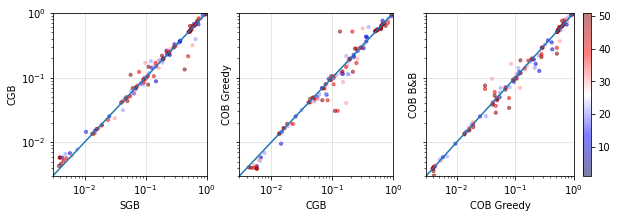

In [86]:
# plt.figure(figsize=(12,2))
import matplotlib.gridspec as gridspec
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(10, 3), gridspec_kw={'width_ratios': [1, 1, 1.2]})
# compare_two_algos(ax[0], 'orths_fc_Newton-CG', 'mwg_boosting_', trains_normal)
# compare_two_algos(ax[1], 'orths_fc_Newton-CG', 'xgb_keep_', trains_normal, show_y=False)
# compare_two_algos(ax[2], 'orths_fc_Newton-CG', 'gpe_boosting_', trains_normal, show_y=False)
compare_two_algos(ax[0], 'gpe_fc_Newton-CG', 'gpe_boosting_', trains_normal)
compare_two_algos(ax[1], 'orth_fc_Newton-CG*', 'gpe_fc_Newton-CG', trains_normal)
compare_two_algos(ax[2], 'orths_fc_Newton-CG', 'orth_fc_Newton-CG*', trains_normal, color_bar=True)

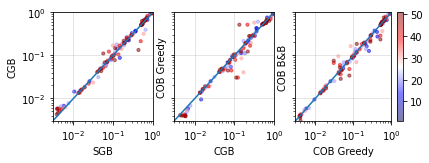

In [87]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(6.5, 2), gridspec_kw={'width_ratios': [1, 1, 1.2]})
# compare_two_algos(ax[0], 'orth_fc_Newton-CG', 'mwg_boosting_', trains_normal)
# compare_two_algos(ax[1], 'orth_fc_Newton-CG', 'xgb_keep_', trains_normal, show_y=False)
# compare_two_algos(ax[2], 'orth_fc_Newton-CG', 'gpe_boosting_', trains_normal, show_y=False)
compare_two_algos(ax[0], 'gpe_fc_Newton-CG', 'gpe_boosting_', trains_normal)
compare_two_algos(ax[1], 'orth_fc_Newton-CG*', 'gpe_fc_Newton-CG', trains_normal)
compare_two_algos(ax[2], 'orths_fc_Newton-CG', 'orth_fc_Newton-CG*', trains_normal, color_bar=True)
plt.savefig('ablation.pdf', dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)

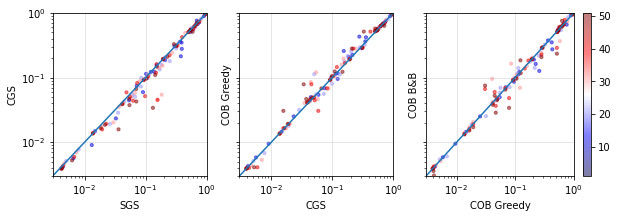

In [88]:
import matplotlib.gridspec as gridspec
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(10, 3), gridspec_kw={'width_ratios': [1, 1, 1.2]})
# compare_two_algos(ax[0], 'orths_fc_Newton-CG', 'mwg_boosting_', trains_normal)
# compare_two_algos(ax[1], 'orths_fc_Newton-CG', 'xgb_keep_', trains_normal, show_y=False)
# compare_two_algos(ax[2], 'orths_fc_Newton-CG', 'gpe_boosting_', trains_normal, show_y=False)
compare_two_algos(ax[0], 'mwg_fc_Newton-CG', 'mwg_boosting_', trains_normal)
compare_two_algos(ax[1], 'orth_fc_Newton-CG*', 'mwg_fc_Newton-CG', trains_normal)
compare_two_algos(ax[2], 'orths_fc_Newton-CG', 'orth_fc_Newton-CG*', trains_normal, color_bar=True)

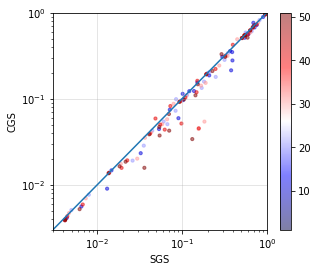

In [89]:
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(4.8, 4), gridspec_kw={'width_ratios': [1]})
compare_two_algos(ax, 'mwg_fc_Newton-CG', 'mwg_boosting_', trains_normal, color_bar=True)

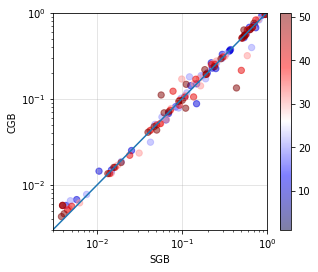

In [90]:
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(4.8, 4), gridspec_kw={'width_ratios': [1]})
compare_two_algos(ax, 'gpe_fc_Newton-CG', 'gpe_boosting_', trains_normal, color_bar=True, size=40)
plt.savefig('fc_gb.pdf', dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)

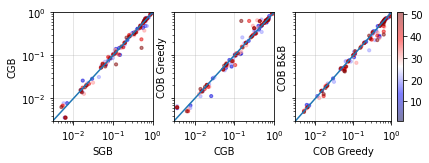

In [92]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(6.5, 2), gridspec_kw={'width_ratios': [1, 1, 1.2]})
# compare_two_algos(ax[0], 'orth_fc_Newton-CG', 'mwg_boosting_', trains_normal)
# compare_two_algos(ax[1], 'orth_fc_Newton-CG', 'xgb_keep_', trains_normal, show_y=False)
# compare_two_algos(ax[2], 'orth_fc_Newton-CG', 'gpe_boosting_', trains_normal, show_y=False)
compare_two_algos(ax[0], 'gpe_fc_Newton-CG', 'gpe_boosting_', tests_normal)
compare_two_algos(ax[1], 'orth_fc_Newton-CG*', 'gpe_fc_Newton-CG', tests_normal)
compare_two_algos(ax[2], 'orths_fc_Newton-CG', 'orth_fc_Newton-CG*', tests_normal, color_bar=True)
plt.savefig('ablation_test.pdf', dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)

In [93]:
name_map={'mwg_boosting_':'GS',
         'gpe_boosting_':'GB',
          'gpe_fc_Newton-CG':'GB FC',
         'xgb_keep_':'XGBoost',
         'orth_fc_Newton-CG*':'FCOGB Greedy',
         'orths_fc_Newton-CG': 'FCOGB B&B'}
def compare_two_algos(algo1, algo2, data):
    data1=np.array([])
    data2=np.array([])
    colors=np.array([])
#     print(type(ax[0]))
    for i in range(1, 51,1):
        data1=np.append(data1,data[[algo1+str(i)]])
        data2=np.append(data2, data[[algo2+str(i)]])
        colors=np.append(colors, [i]*len(data[[algo1+str(i)]]))
    s1=sum(data1>data2*1.00001)
    s2=sum(data1<=data2*1.00001)
    print(s1, s2, s2/(s1+s2))
compare_two_algos('gpe_fc_Newton-CG', 'gpe_boosting_', trains_normal)
compare_two_algos('orth_fc_Newton-CG*', 'gpe_fc_Newton-CG', trains_normal)
compare_two_algos('orths_fc_Newton-CG', 'orth_fc_Newton-CG*', trains_normal)

614 836 0.576551724137931
304 1146 0.7903448275862069
534 916 0.6317241379310344


In [94]:
(583+867)/50

29.0

In [95]:
1/0

ZeroDivisionError: division by zero

In [ ]:
name_map={'mwg_boosting_':'GS',
         'gpe_boosting_':'GB',
          'gpe_fc_Newton-CG':'GB FC',
         'xgb_keep_':'XGBoost',
         'orth_fc_Newton-CG*':'FCOGB Greedy',
         'orth_fc_Newton-CG': 'FCOGB B&B'}
import matplotlib.colors as cls
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


def compare_two_algos(ax, algo1, algo2, data, color_bar=False, show_y=True):
    data1=np.array([])
    data2=np.array([])
    colors=np.array([])
#     print(type(ax[0]))
    norm = cls.Normalize(1,50)
    for i in range(1, 51):
        data1=np.append(data1,data[[algo1+str(i)]])
        data2=np.append(data2, data[[algo2+str(i)]])
        colors=np.append(colors, [i]*len(data[[algo1+str(i)]]))
    ax.plot((min(data1), max(data1)), (min(data2), max(data2)))
    cmap = discrete_cmap(50, 'cubehelix')
    edgecols = cmap(norm(colors))
#     im.set_facecolor('none')
    im=ax.scatter(data2, data1, edgecolors=edgecols, c='none',alpha=0.3)
    ax.set_xlim(min(data2), 1)
    ax.set_ylim(min(data1), 1)
    ax.set_xlabel(name_map[algo2])
    if show_y:
        ax.set_ylabel(name_map[algo1])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(which='minor', alpha=0.4)
    if color_bar:
        plt.colorbar(im,ax=ax)

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(6.5, 2), gridspec_kw={'width_ratios': [1, 1, 1.2]})
compare_two_algos(ax[0], 'gpe_fc_Newton-CG', 'gpe_boosting_', trains_normal)
compare_two_algos(ax[1], 'orth_fc_Newton-CG*', 'gpe_fc_Newton-CG', trains_normal)
compare_two_algos(ax[2], 'orth_fc_Newton-CG', 'orth_fc_Newton-CG*', trains_normal, color_bar=True)
plt.savefig('ablation20230905.pdf', dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

# def discrete_cmap() is omitted here...
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)
# some sample data
x = np.linspace(0,10,11)
y = np.linspace(0,10,11)
z = x+y

# setup a Normalization instance
norm = colors.Normalize(z.min(),z.max())

# define the colormap
cmap = discrete_cmap(20, 'cubehelix')

# Use the norm and cmap to define the edge colours
edgecols = cmap(norm(z))

# Use that with the `edgecolors` argument. Set c='None' to turn off the facecolor
im=plt.scatter(x,y, edgecolors=edgecols, c = 'None', marker='o', s=40 )
plt.colorbar(im)
plt.show()

In [ ]:
ax1=df.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,color='c', logy=True, grid=True, figsize=(8,6), 
                    label='Gradient Sum', legend=True, xlabel='dataset', ylabel='risk', rot=90, ylim=(0.01, 1))
ax2=df.plot.scatter(x='dataset', y='gpe_boosting_', marker='x',s=80,ax=ax1, color='b', grid=True, label='Gradient Boosting',
                   xlabel='dataset', ylabel='risk', rot=90)
ax3=df.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, color='g', grid=True, label='XGBoost',
                   xlabel='dataset', ylabel='risk', rot=90)
ax4=df.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, color='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='risk', rot=90)
ax1.grid(which='minor', alpha=0.3)
plt.savefig('all_datasets_order.pdf', dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)

In [ ]:
pd_train_log_dataset

In [ ]:
df2=pd_train_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
ax1=df2.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,color='c', logy=False, grid=True, figsize=(8,6), 
                    label='Gradient Sum', legend=True, xlabel='dataset', ylabel='log risk', rot=90, ylim=(-6, 0))
ax2=df2.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax1, color='b', grid=True, label='Gradient Boosting',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax3=df2.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, color='g', grid=True, label='XGBoost',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax4=df2.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, color='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax1.grid(which='minor', alpha=0.3)
plt.savefig('all_datasets_order_log.pdf', dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)

In [ ]:
df3=pd_test_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
ax1=df3.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,color='c', logy=False, grid=True, figsize=(8,6), 
                    label='Gradient Sum', legend=True, xlabel='dataset', ylabel='log risk', rot=90, ylim=(-6, 0))
ax2=df3.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax1, color='b', grid=True, label='Gradient Boosting',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax3=df3.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, color='g', grid=True, label='XGBoost',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax4=df3.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, color='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax1.grid(which='minor', alpha=0.3)
plt.savefig('all_datasets_order_log.pdf', dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)

In [ ]:
df2=df.reindex([16,17,18,19,21,22,25,27,28,29,30,31,32,
    0,1,2,3,4,5,6,8,10,11,12,13,15, 24,26,33,
           7,9, 14, 20,23])
ax1=df2.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,color='c', logy=True, grid=True, figsize=(8,6), 
                    label='Gradient Sum', legend=True, xlabel='dataset', ylabel='risk', rot=90, ylim=(0.01, 1))
ax2=df2.plot.scatter(x='dataset', y='gpe_boosting_', marker='x',s=80,ax=ax1, color='b', grid=True, label='Gradient Boosting',
                   xlabel='dataset', ylabel='risk', rot=90)
ax3=df2.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, color='g', grid=True, label='XGBoost',
                   xlabel='dataset', ylabel='risk', rot=90)
ax4=df2.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, color='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='risk', rot=90)
ax1.grid(which='minor', alpha=0.3)
ax1.plot((12.5,12.5),(0.01, 1),c='k')
ax1.plot((28.5,28.5),(0.01, 1),c='k')
plt.savefig('all_datasets_order_problems.pdf', dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)